## Obtención de Datos
Para la obtencion de datos usar script donde se hace uso de la API de Kaggle y por medio de esta se descarga y descomprime el .zip que contiene el dataset. Luego se guarda en un directorio que se llama "data-starbucks"

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import os
import zipfile

# Define la información de la clave de la API de Kaggle -- //Perfil kaaggle
kaggle_info = {
    "username": "angelasiles08",
    "key": "ecd6dc80251fb89239fd191ab50df1bd"
}

# Guarda la información de la clave de la API en un archivo
with open('/content/kaggle.json', 'w') as file:
    json.dump(kaggle_info, file)

# Crea la carpeta ~/.kaggle y copia el archivo kaggle.json
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Descarga el archivo ZIP del conjunto de datos de Starbucks desde Kaggle
!kaggle datasets download -d starbucks/starbucks-menu

# Ruta del archivo ZIP descargado
zip_file_path = '/content/starbucks-menu.zip'

# Ruta del directorio de extracción
extracted_directory = '/content/data-starbucks'

# Crea la carpeta paraa la extracción si no existe,
os.makedirs(extracted_directory, exist_ok=True)

# Descomprime el archivo ZIP en la carpeta de extracción
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_directory)

# Obtiene los nombres de los archivos extraídos
extracted_files = zip_ref.namelist()

#extracted_files


  0% 0.00/9.43k [00:00<?, ?B/s]
100% 9.43k/9.43k [00:00<00:00, 27.0MB/s]


In [ ]:
#extracted_files
!ls $extracted_directory

starbucks_drinkMenu_expanded.csv     starbucks-menu-nutrition-food.csv
starbucks-menu-nutrition-drinks.csv


In [ ]:
!head $extracted_directory/starbucks-menu-nutrition-drinks.csv

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
Ombré Pink Drink,-,-,-,-,-,-
Pink Drink,-,-,-,-,-,-
Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
Very Berry Hibiscus Starbucks Refreshers™ Beverage,60,0,14,1,0,10
Violet Drink,-,-,-,-,-,-
Evolution Fresh™ Cold-Pressed Apple Berry Juice,-,-,-,-,-,-
Evolution Fresh™ Defense Up,-,-,-,-,-,-
Evolution Fresh™ Organic Ginger Limeade,110,0,28,0,0,5


In [ ]:
!head $extracted_directory/starbucks_drinkMenu_expanded.csv

Beverage_category,Beverage,Beverage_prep,Calories, Total Fat (g),Trans Fat (g) ,Saturated Fat (g), Sodium (mg), Total Carbohydrates (g) ,Cholesterol (mg), Dietary Fibre (g), Sugars (g), Protein (g) ,Vitamin A (% DV) ,Vitamin C (% DV), Calcium (% DV) ,Iron (% DV) ,Caffeine (mg)
Coffee,Brewed Coffee,Short,3,0.1,0,0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Coffee,Brewed Coffee,Tall,4,0.1,0,0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Coffee,Brewed Coffee,Grande,5,0.1,0,0,0,10,0,0,0,1,0%,0%,0%,0%,330
Coffee,Brewed Coffee,Venti,5,0.1,0,0,0,10,0,0,0,1,0%,0%,2%,0%,410
Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0,5,75,10,0,9,6,10%,0%,20%,0%,75
Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2,0.1,15,85,10,0,9,6,10%,0%,20%,0%,75
Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0,0,65,6,1,4,5,6%,0%,20%,8%,75
Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0,5,120,15,0,14,10,15%,0%,30%,0%,75
Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3,0.2,25,135,15,0,14,10,15%,0%

## EDA

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


In [ ]:
# Cargar los archivos CSV en DataFrames
df_drink_menu = pd.read_csv(os.path.join(extracted_directory, extracted_files[0]))
df_food_menu = pd.read_csv(os.path.join(extracted_directory, extracted_files[1]), encoding='utf-16')
df_drink_Expanded_menu = pd.read_csv(os.path.join(extracted_directory, extracted_files[2]))

**Observación  de los datos**

**Dataset : Drink Menu**

In [ ]:
#Showing first 10 observations
df_drink_menu.head(10)

Unnamed: 0 Calories Fat (g)  \
0           Cool Lime Starbucks Refreshers™ Beverage       45       0   
1                                   Ombré Pink Drink        -       -   
2                                         Pink Drink        -       -   
3     Strawberry Acai Starbucks Refreshers™ Beverage       80       0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...       60       0   
5                                       Violet Drink        -       -   
6    Evolution Fresh™ Cold-Pressed Apple Berry Juice        -       -   
7                        Evolution Fresh™ Defense Up        -       -   
8            Evolution Fresh™ Organic Ginger Limeade      110       0   
9                                        Iced Coffee        0       0   

  Carb. (g) Fiber (g) Protein Sodium  
0        11         0       0     10  
1         -         -       -      -  
2         -         -       -      -  
3        18         1       0     10  
4        14         1       0     10  
5         -         -       -      -  
6         -         -       -      -  
7         -         -       -      -  
8        28         0       0      5  
9         0         0       0      0

**Dataset : Food Menu**

In [ ]:
#Showing first 10 observations
df_food_menu.head(10)

Unnamed: 0   Calories   Fat (g)   Carb. (g)  \
0                            Chonga Bagel        300       5.0          50   
1                            8-Grain Roll        380       6.0          70   
2                        Almond Croissant        410      22.0          45   
3                           Apple Fritter        460      23.0          56   
4                        Banana Nut Bread        420      22.0          52   
5  Blueberry Muffin with Yogurt and Honey        380      16.0          53   
6                         Blueberry Scone        420      17.0          61   
7                        Butter Croissant        240      12.0          28   
8                        Butterfly Cookie        350      22.0          38   
9                           Cheese Danish        320      16.0          36   

    Fiber (g)   Protein (g)  
0           3            12  
1           7            10  
2           3            10  
3           2             7  
4           2             6  
5           1             6  
6           2             5  
7           1             5  
8           0             2  
9           1             8

**Dataset : Drink expanded menu**

In [ ]:
df_drink_Expanded_menu.head(10)

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   
5  Classic Espresso Drinks    Caffè Latte            2% Milk       100   
6  Classic Espresso Drinks    Caffè Latte            Soymilk        70   
7  Classic Espresso Drinks    Caffè Latte   Tall Nonfat Milk       100   
8  Classic Espresso Drinks    Caffè Latte            2% Milk       150   
9  Classic Espresso Drinks    Caffè Latte            Soymilk       110   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   
5            3.5             2.0                0.1            15   
6            2.5             0.4                0.0             0   
7            0.2             0.2                0.0             5   
8              6             3.0                0.2            25   
9            4.5             0.5                0.0             0   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   
5                         85                10                   0   
6                         65                 6                   1   
7                        120                15                   0   
8                        135                15                   0   
9                        105                10                   1   

    Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0            0            0.3                0%               0%   
1            0            0.5                0%               0%   
2            0            1.0                0%               0%   
3            0            1.0                0%               0%   
4            9            6.0               10%               0%   
5            9            6.0               10%               0%   
6            4            5.0                6%               0%   
7           14           10.0               15%               0%   
8           14           10.0               15%               0%   
9            6            8.0               10%               0%   

   Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
0               0%           0%           175  
1               0%           0%           260  
2               0%           0%           330  
3               2%           0%           410  
4              20%           0%            75  
5              20%           0%            75  
6              20%           8%            75  
7              30%           0%            75  
8              30%           0%            75  
9              30%          15%            75

Según la información proporcionada por el dataset Starbucks todos los "Missing values" estan representados con "-". Por lo tanto, en las primeras 10 observaciones que tenemos en el dataset "starbucks-menu-nutrition-drinks.csv" (df_menu) ya se observan alguno de estos datos faltantes.

Ahora observaremos los nombres de las columnas.

In [ ]:
column_names_food = df_food_menu.columns.tolist()
column_names_drink = df_drink_menu.columns.tolist()
column_names_drink_expanded = df_drink_Expanded_menu.columns.tolist()

# Crear los encabezados para cada conjunto de datos
header_food = ['Dataset: Food Menu'] + ['Column Names']
header_drink = ['Dataset: Drink Menu'] + ['Column Names']
header_drink_expanded = ['Dataset: Drink Expanded Menu'] + ['Column Names']

# Crear los índices numéricos para cada conjunto de datos
index_food = list(range(len(column_names_food)))
index_drink = list(range(len(column_names_drink)))
index_drink_expanded = list(range(len(column_names_drink_expanded)))

# Crear los DataFrames para cada conjunto de datos
table_food = pd.DataFrame({'Column Names': column_names_food}, index=index_food)
table_drink = pd.DataFrame({'Column Names': column_names_drink}, index=index_drink)
table_drink_expanded = pd.DataFrame({'Column Names': column_names_drink_expanded}, index=index_drink_expanded)

In [ ]:
print(tabulate(table_drink, headers=header_drink, tablefmt='psql'))
print()
print(tabulate(table_food, headers=header_food, tablefmt='psql'))
print()
print(tabulate(table_drink_expanded, headers=header_drink_expanded, tablefmt='psql'))

+-----------------------+----------------+
|   Dataset: Drink Menu | Column Names   |
|-----------------------+----------------|
|                     0 | Unnamed: 0     |
|                     1 | Calories       |
|                     2 | Fat (g)        |
|                     3 | Carb. (g)      |
|                     4 | Fiber (g)      |
|                     5 | Protein        |
|                     6 | Sodium         |
+-----------------------+----------------+

+----------------------+----------------+
|   Dataset: Food Menu | Column Names   |
|----------------------+----------------|
|                    0 | Unnamed: 0     |
|                    1 | Calories       |
|                    2 | Fat (g)        |
|                    3 | Carb. (g)      |
|                    4 | Fiber (g)      |
|                    5 | Protein (g)    |
+----------------------+----------------+

+--------------------------------+-------------------------+
|   Dataset: Drink Expanded Menu | Column Na

La primera columna (Unnamed: 0) de los datasets "starbucks-menu-nutrition-drinks.csv" y "starbucks-menu-nutrition-food.csv" no tiene un nombre definido y eso se lo podemos agregar en el preprocesamiento de datos. Según las observaciones en esa columna, parece el nombre las bebidas.

**Observamos valores unicos de cada columna**

In [ ]:
# Obtener los valores únicos de cada columna del menú de bebidas
drink_menu_tables = []
for column in df_drink_menu.columns:
    column_values = df_drink_menu[column].unique()
    drink_menu_tables.append([column, *column_values])

for table in drink_menu_tables:
    print(tabulate([table], tablefmt='psql'))
    print("\n")


+------------+------------------------------------------+------------------+------------+------------------------------------------------+----------------------------------------------------+--------------+-------------------------------------------------+-----------------------------+-----------------------------------------+-------------+-----------------------+----------------------------------------+--------------------------------------+--------------------------------------------+--------------------------------+-------------------------------+-------------------------------------------+--------------------------------+------------------+-----------------------------------+---------------------------+--------------------------------+----------------------------+---------------------------+----------------------------+----------------------------+--------------------------------------+--------------------------------------+--------------------------------------+-------------------

In [ ]:
drink_food_tables = []
for column in df_food_menu.columns:
    column_values = df_food_menu[column].unique()
    drink_food_tables.append([column, *column_values])

for table in drink_food_tables :
    print(tabulate([table], tablefmt='psql'))
    print("\n")

+------------+--------------+--------------+------------------+---------------+------------------+----------------------------------------+-----------------+------------------+------------------+---------------+------------------------+-----------------------+------------------------+---------------------+------------------------------+----------------------------+----------------------+-----------------------+---------------------+-------------------+------------------------+-----------------------+--------------------------+--------------------------------+----------------------------+----------------------------------------------+------------------------------+---------------------------+---------------------------------------+-----------------------------------+-----------------------------+-----------------------+-------------------------+------------------+----------------+----------------+-------------------------------+--------------------------+------------+-------------------

In [ ]:
drink_Expanded_menu_tables = []
for column in df_drink_Expanded_menu.columns:
    column_values = df_drink_Expanded_menu[column].unique()
    drink_Expanded_menu_tables.append([column, *column_values])

for table in drink_Expanded_menu_tables:
    print(tabulate([table], tablefmt='psql'))
    print("\n")

+-------------------+--------+-------------------------+---------------------------+------------------+-----------------------+-----------+-----------------------------+-----------------------------------+----------------------------+
| Beverage_category | Coffee | Classic Espresso Drinks | Signature Espresso Drinks | Tazo® Tea Drinks | Shaken Iced Beverages | Smoothies | Frappuccino® Blended Coffee | Frappuccino® Light Blended Coffee | Frappuccino® Blended Crème |
+-------------------+--------+-------------------------+---------------------------+------------------+-----------------------+-----------+-----------------------------+-----------------------------------+----------------------------+


+----------+---------------+-------------+-------------------------------------+------------------------------------------+-----------------+------------+----------+----------------------------+-------------------+-----------------------------------------------+-------------------------------

La salida de los valores unicos vistos anteriormente nos puede dar una mejor noción del tipo de dato y la cantidad de clases podemos tener.

El tamaño de los datasets.

In [ ]:
df_drink_menu.shape

(177, 7)

In [ ]:
df_drink_Expanded_menu.shape

(242, 18)

In [ ]:
df_food_menu.shape

(113, 6)

Encontramos que:


*   El dataset del menu completo tiene 177 observaciones.

*   El dataset de las bebidas tiene 242 observaciones.
*   El de las comidas 113 observaciones.

Observamos el tipo de dato de cada columna y valores faltantes para cada dataset.

**Drink menu**

In [ ]:
# tipo de datos para el menu completo
df_drink_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [ ]:
df_drink_menu.isnull().sum()

Unnamed: 0    0
Calories      0
Fat (g)       0
Carb. (g)     0
Fiber (g)     0
Protein       0
Sodium        0
dtype: int64

En este caso utilizar  *df_drink_menu.isnull().sum()* no detecta los valores faltantes, ya que estan definidos "-" . Entonces se aplicará lo siguiente:

In [ ]:
count_values = []
for column in df_drink_menu.columns:
    count = (df_drink_menu[column] == "-").sum()
    count_values.append([column, count])

# Imprimir la tabla utilizando tabulate
print(tabulate(count_values, headers=["Column Name", "Count of '-'"], tablefmt='psql'))

+---------------+----------------+
| Column Name   |   Count of '-' |
|---------------+----------------|
| Unnamed: 0    |              0 |
| Calories      |             85 |
| Fat (g)       |             85 |
| Carb. (g)     |             85 |
| Fiber (g)     |             85 |
| Protein       |             85 |
| Sodium        |             85 |
+---------------+----------------+


In [ ]:
def plot_missing_data(total_observations, missing_data, title):
    # Calcular la cantidad de datos presentes
    data_present = total_observations - missing_data

    # Crear una lista con los valores de datos presentes y datos faltantes
    data_values = [data_present, missing_data]

    # Etiquetas para el gráfico
    labels = ['Datos Presentes ' + str(data_present) +  "/" + str(total_observations), 'Datos Faltantes:  ' + str(missing_data) + "/"+str(total_observations)]

    # Colores para el gráfico
    colors = ['#007540', '#C5C5C5']

    # Crear el gráfico circular
    plt.pie(data_values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)

    # Añadir título al gráfico
    plt.title(title)

    # Mostrar el gráfico
    plt.show()


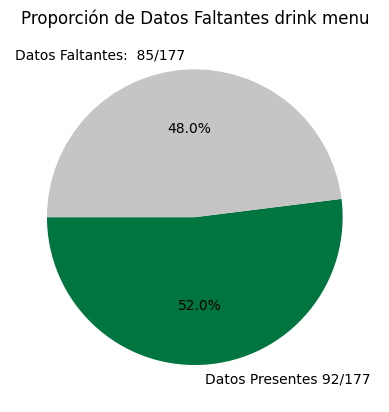

In [ ]:
plot_missing_data(len(df_drink_menu), 85, 'Proporción de Datos Faltantes drink menu')


**Drink menu expanded**

In [ ]:
# tipo de datos para el menu de bebidas
df_drink_Expanded_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [ ]:
df_drink_Expanded_menu.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [ ]:
count_values = []
for column in df_drink_Expanded_menu.columns:
    count = ((df_drink_Expanded_menu[column] == "varies") | (df_drink_Expanded_menu[column] == "Varies")).sum()
    count_values.append([column, count])

# Imprimir la tabla utilizando tabulate
print(tabulate(count_values, headers=["Column Name", "Count of 'varies / Varies'"], tablefmt='psql'))


+-------------------------+------------------------------+
| Column Name             |   Count of 'varies / Varies' |
|-------------------------+------------------------------|
| Beverage_category       |                            0 |
| Beverage                |                            0 |
| Beverage_prep           |                            0 |
| Calories                |                            0 |
| Total Fat (g)           |                            0 |
| Trans Fat (g)           |                            0 |
| Saturated Fat (g)       |                            0 |
| Sodium (mg)             |                            0 |
| Total Carbohydrates (g) |                            0 |
| Cholesterol (mg)        |                            0 |
| Dietary Fibre (g)       |                            0 |
| Sugars (g)              |                            0 |
| Protein (g)             |                            0 |
| Vitamin A (% DV)        |                            0

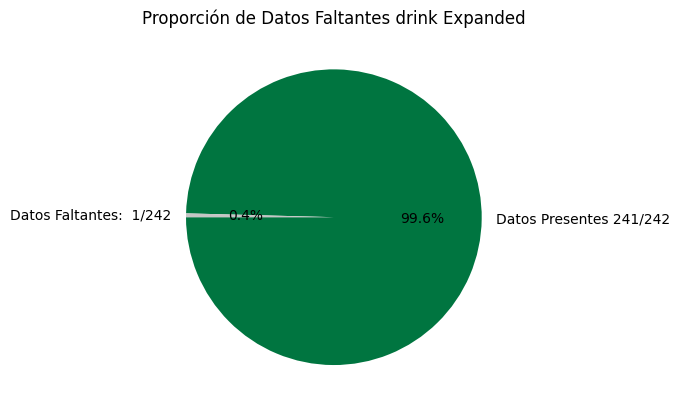

In [ ]:
plot_missing_data(len(df_drink_Expanded_menu), 1, 'Proporción de Datos Faltantes drink Expanded')


**Food menú**

In [ ]:
# tipo de datos para el menu de comidas
df_food_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    113 non-null    object 
 1    Calories     113 non-null    int64  
 2    Fat (g)      113 non-null    float64
 3    Carb. (g)    113 non-null    int64  
 4    Fiber (g)    113 non-null    int64  
 5    Protein (g)  113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB


In [ ]:
df_food_menu.isnull().sum()

Unnamed: 0      0
 Calories       0
 Fat (g)        0
 Carb. (g)      0
 Fiber (g)      0
 Protein (g)    0
dtype: int64

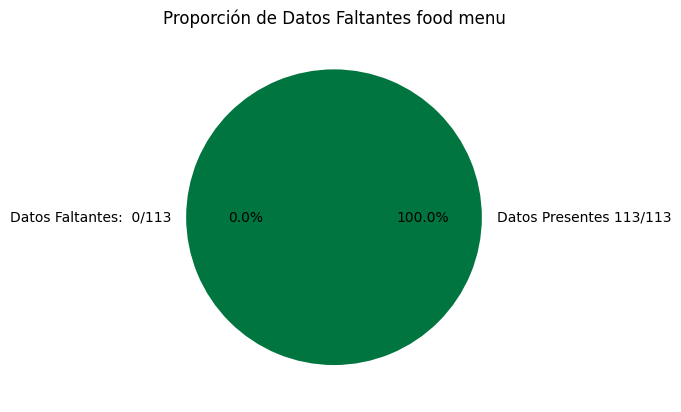

In [ ]:
plot_missing_data(len(df_food_menu), 0, 'Proporción de Datos Faltantes food menu')


In [ ]:
#import seaborn as sns
#plt.figure(figsize=(10,6))
#colors = ['#007540', '#C5C5C5']

#cmap = sns.color_palette(colors)
#sns.heatmap(df_drink_Expanded_menu.isnull(), cmap=cmap)
#plt.show()


Según el output anterior, no hay valores faltantes en el dataset del menu de bebidas (starbucks-menu-nutrition-drinks.csv). Esto se puede deber a que los valores faltantes no están representados como NaN o None. Luego en el preprocesamiento probaremos con otro metodo la forma de encontrar los valores faltantes reemplazando "-" por un "NaN".

El dataset del menu de bebidas expandidas muestra un solo valor faltante para la variable "caffeine".

Por otro lado, los tipos de datos que se pueden observar en los datasets lo podemos dividir entre categorico y numerico.

Dataset de bebidas

1. Categoricos:
  * Nominales: Unnamed: 0
2. Numericos:
  * Continuas: Fat (g).
  * Discretas: Calories, *Protein, *Sodium, *Carb. (g), *Fiber (g).

Dataset de comidas

1. Categoricos:
  * Nominales: Unnamed: 0
2. Numericos:
  * Continuas: Fat (g).
  * Discretas: Calories, *Protein, *Sodium, *Carb. (g), *Fiber (g).

Dataset de bebidas expandidas

1. Categoricos:
  * Nominales: Beverage_category, Beverage, Beverage_prep.
2. Numericos:
  * Continuas: Total Fat (g), Trans Fat (g), Saturated Fat (g),Protein (g).
  * Discretas: Calories, *Sodium (mg), *Total Carbohydrates (g), *Cholesterol(mg), *Dietary Fibre (g), *Sugars (g), *Vitamin A (% DV), *Vitamin C (% DV), *Calcium (% DV).
3. Compuestas: Caffeine (mg), Iron (% DV)

Nota: Las variables que contienen "*" son variables que en la realidad considerariamos continuas, pero dado que nuetro dataset se muestran como discretas las catalogamos de esta forma. Por otro lado, Calories es otra variable que podría ser continua en la realidad.

Variables no informativas:
1. Unnamed: 0. -> serian nombres propios tanto en el menu de las bebidas como en el menu de las comidas.



---



**Analicemos el dataset en funcion de las variables**


In [ ]:
df_food_menu.head(10)

Unnamed: 0   Calories   Fat (g)   Carb. (g)  \
0                            Chonga Bagel        300       5.0          50   
1                            8-Grain Roll        380       6.0          70   
2                        Almond Croissant        410      22.0          45   
3                           Apple Fritter        460      23.0          56   
4                        Banana Nut Bread        420      22.0          52   
5  Blueberry Muffin with Yogurt and Honey        380      16.0          53   
6                         Blueberry Scone        420      17.0          61   
7                        Butter Croissant        240      12.0          28   
8                        Butterfly Cookie        350      22.0          38   
9                           Cheese Danish        320      16.0          36   

    Fiber (g)   Protein (g)  
0           3            12  
1           7            10  
2           3            10  
3           2             7  
4           2             6  
5           1             6  
6           2             5  
7           1             5  
8           0             2  
9           1             8

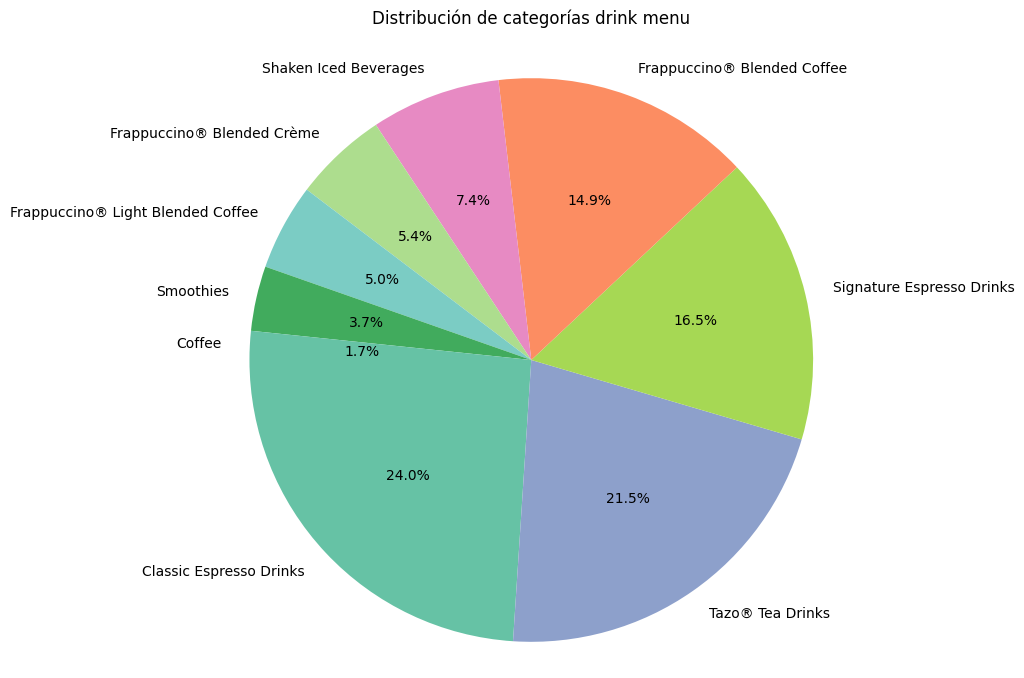

In [ ]:
# Dividir el dataframe por la columna berague_category
category_counts = df_drink_Expanded_menu['Beverage_category'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
colors = ['#66c2a5', '#8da0cb', '#a6d854', '#fc8d62', '#e78ac3', '#addd8e', '#7bccc4', '#41ab5d']

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=180,colors=colors)
plt.axis('equal')  # Asegurar que el gráfico sea circular
plt.title('Distribución de categorías drink menu',pad=20)
plt.show()

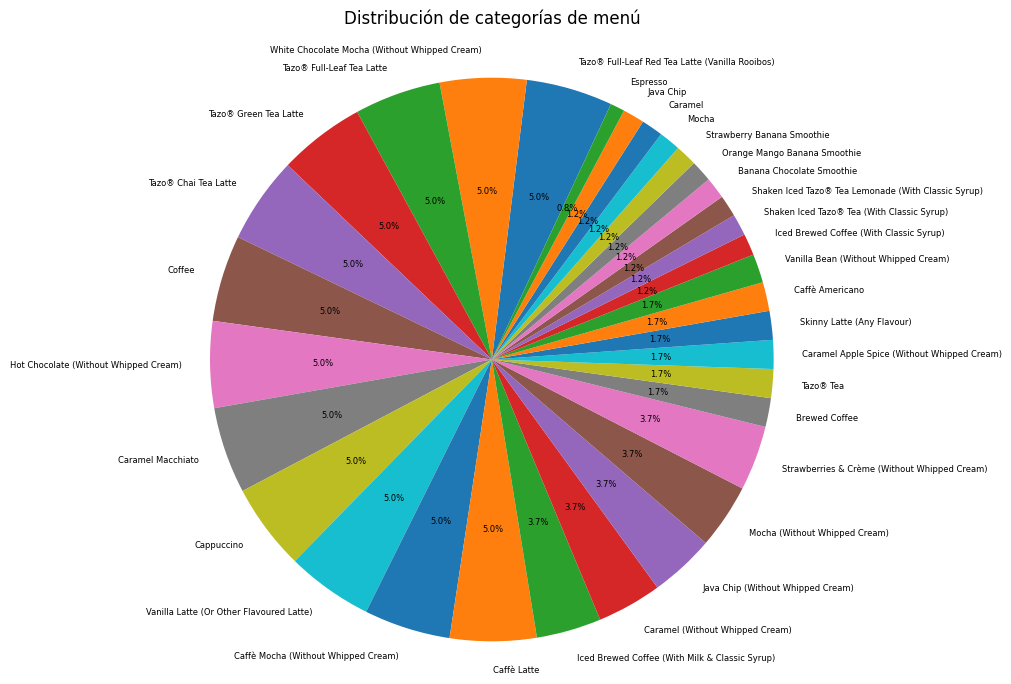

In [ ]:
# Dividir el dataframe por la columna berague_category
category_counts = df_drink_Expanded_menu['Beverage'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=65, textprops={'fontsize': 6})
plt.axis('equal')  # Asegurar que el gráfico sea circular
plt.title('Distribución de categorías de menú',pad=20)
plt.show()


In [ ]:
#pearson asume que la dist. es normal, para verificar realizamos los graficos de qq-plot

fiber se puede apreciar que no cumple con la linealidad, protein esta maso menos, probemos en aplicar spearma, informacion mutua (con respecto a la variable de salida calories)

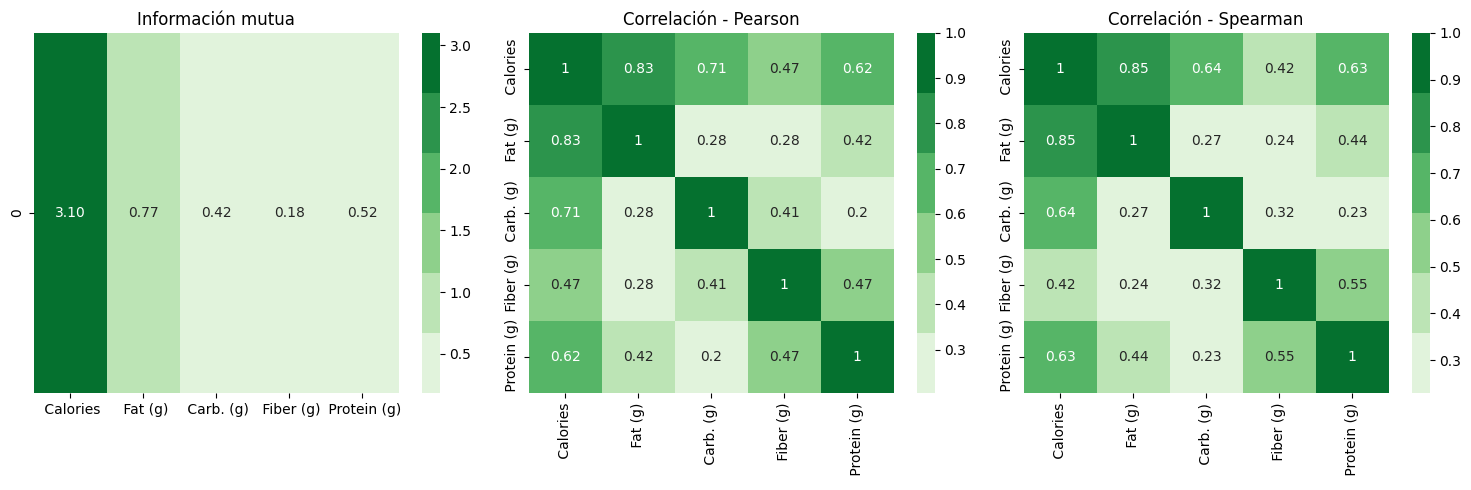

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
X = df_food_menu.drop(["Unnamed: 0"], axis=1)
y = df_food_menu[" Calories"]
MI = mutual_info_regression(X, y)

correlation_matrix_pearson = X.corr(method='pearson')
correlation_matrix_spearman = X.corr(method='spearman')

fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].set_title('Información mutua')
sns.heatmap([MI], ax=ax[0], cmap= sns.color_palette("Greens"), annot=True, fmt=".2f")
ax[0].set_xticklabels(X.columns.values)

ax[1].set_title('Correlación - Pearson')
sns.heatmap(correlation_matrix_pearson, ax=ax[1], annot=True, cmap= sns.color_palette("Greens"))
ax[1].set_xticklabels(X.columns.values)
ax[1].set_yticklabels(X.columns.values)

ax[2].set_title('Correlación - Spearman')
sns.heatmap(correlation_matrix_spearman, ax=ax[2], annot=True, cmap= sns.color_palette("Greens"))
ax[2].set_xticklabels(X.columns.values)
ax[2].set_yticklabels(X.columns.values)

plt.tight_layout()
plt.show()

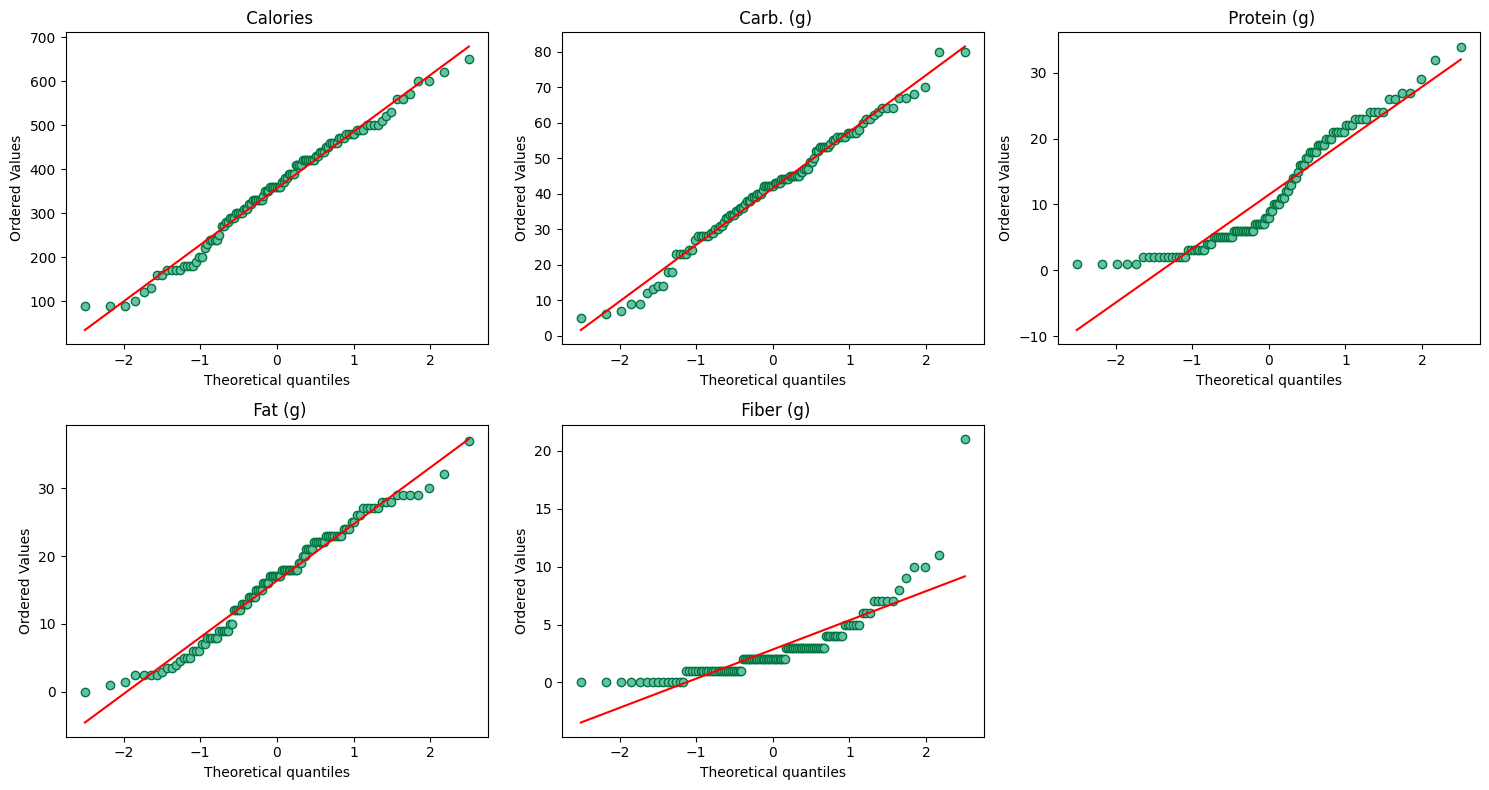

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 3, figsize=(15, 8))

for k, xi in enumerate(X.columns):
    stats.probplot(X[xi], dist="norm", plot=axis[k % 2, k // 2])
    axis[k % 2, k // 2].set_title(xi)
    axis[k % 2, k // 2].lines[0].set_color('#007540')
    axis[k % 2, k // 2].lines[0].set_markerfacecolor('#66c2a5')
plt.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()


- no se elimina ninguna

In [ ]:
zeros_count = (df_food_menu == 0).sum()
zeros_count

Unnamed: 0       0
 Calories        0
 Fat (g)         1
 Carb. (g)       0
 Fiber (g)      14
 Protein (g)     0
dtype: int64

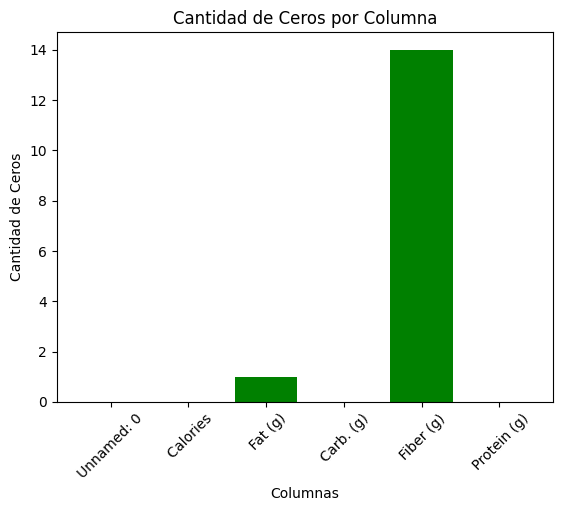

In [ ]:
zeros_count = (df_food_menu == 0).sum()
zeros_count
color = 'green'
bar_colors = [color if val > 0 else 'light' + color for val in zeros_count.values]

# Crear el gráfico de barras
plt.bar(zeros_count.index, zeros_count.values, color=bar_colors)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Ceros')
plt.title('Cantidad de Ceros por Columna')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

**Conclusión**

Analizando los coeficientes de correlacción:

**Pearson**

- Las caracteristicas Fat, Carb, Fiber, Protein tienen una correlacion positiva significativa con la variable calories.

**Spearman**
- Los resultados de Spearman son similares a los de Pearson, con correlacciones positivas  significativas entre las caracteristicas Fat, Carb, Fiber ,Protein con la variable Calories.

**Informacion mutua**

- Los resultados que proporciona la informacion mutua se puede apreciar que la caracteristica Fat tiene una dependencia fuerte con calories. Por otro lado, fiber presenta 0.18 (ver el grafico qq plot no presenta una dist. normal)

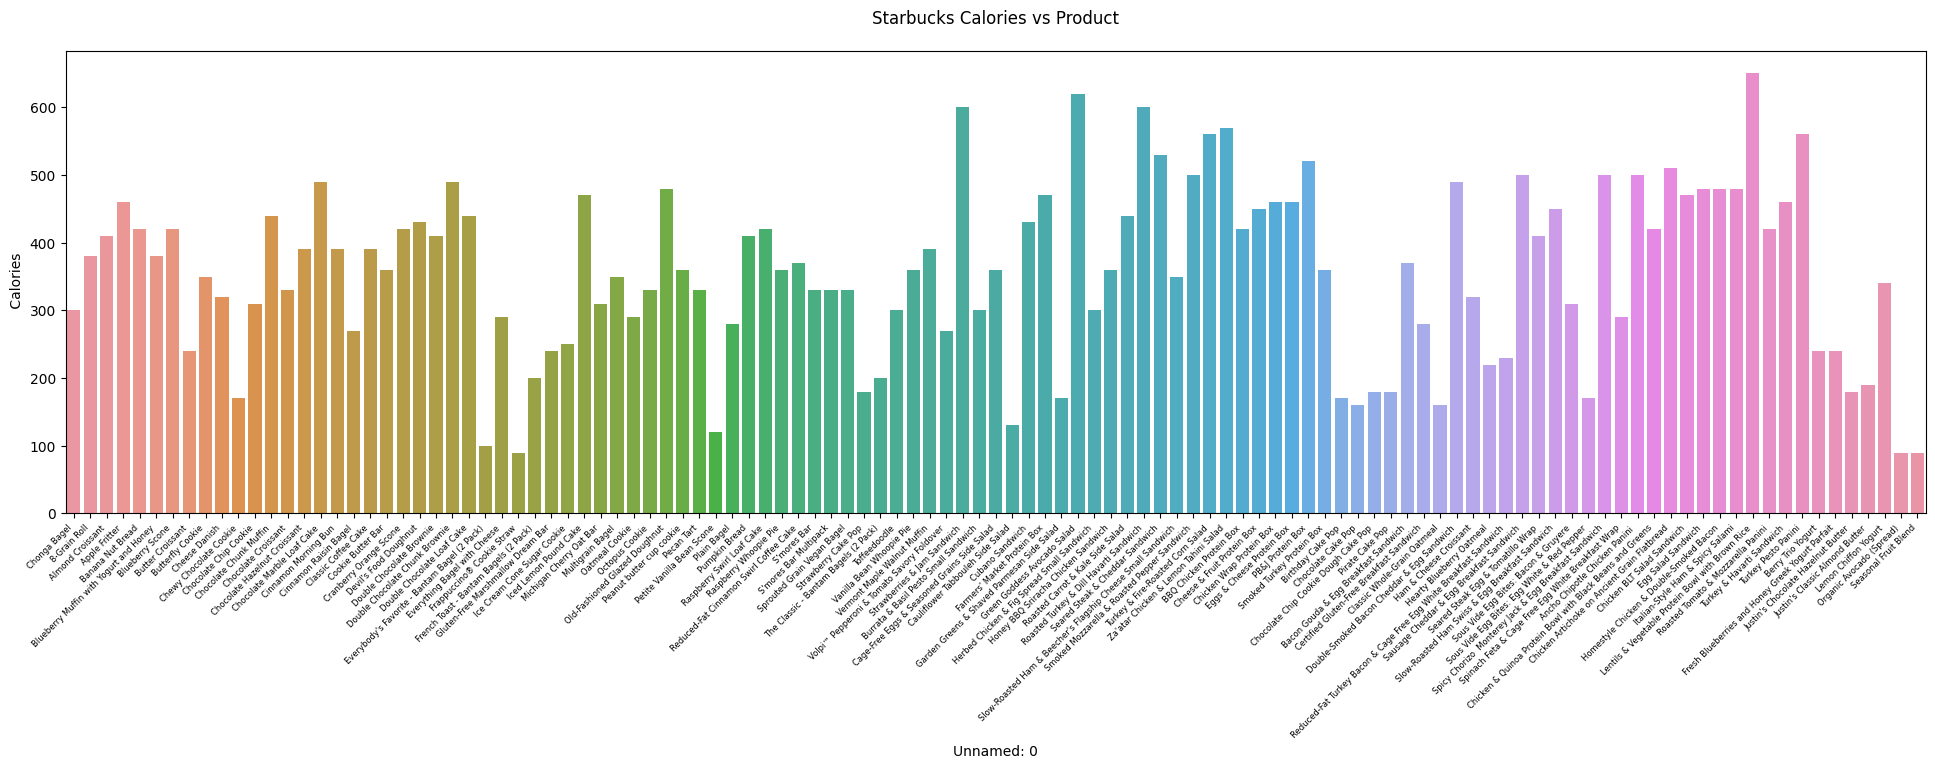

In [ ]:
plt.figure(figsize=(24, 6))
sns.barplot(x=df_food_menu['Unnamed: 0'], y=df_food_menu[' Calories'])
plt.xticks(rotation=45, ha='right',fontsize=6)
plt.title("Starbucks Calories vs Product", pad=20)
plt.show()

**Conclusión**



---



**Drink Expanded**

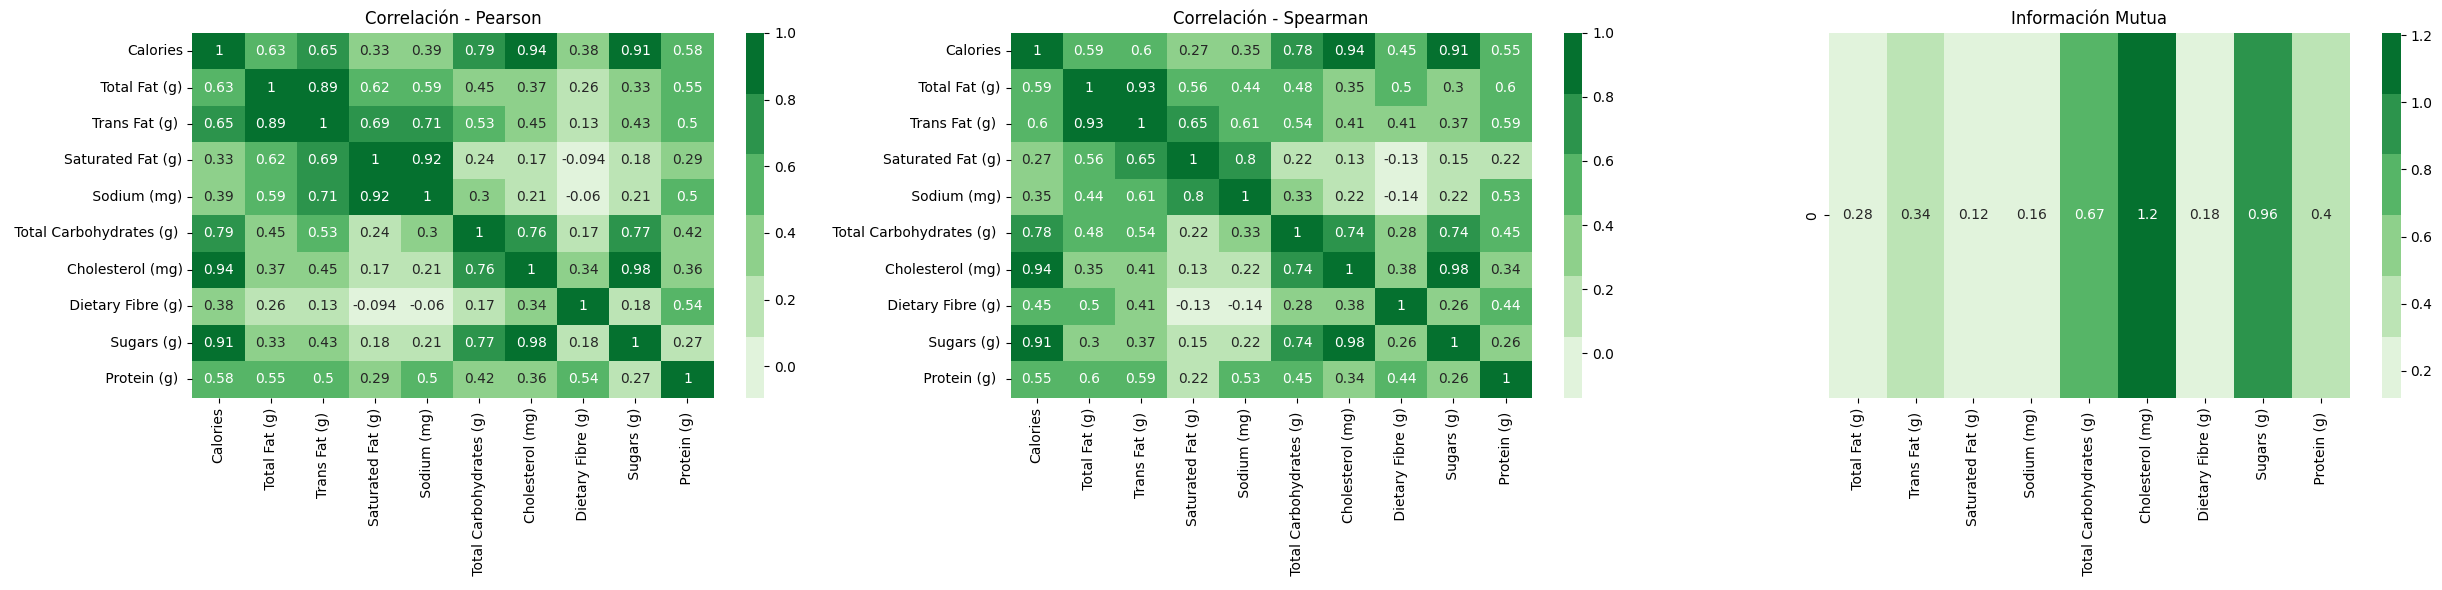

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Convertir las columnas relevantes a tipo numérico
numeric_columns = ['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ']
df_numeric = df_drink_Expanded_menu[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_numeric.dropna(inplace=True)

# Calcular la matriz de correlación de Pearson
correlation_matrix_pearson = df_numeric.corr(method='pearson')

# Calcular la matriz de correlación de Spearman
correlation_matrix_spearman = df_numeric.corr(method='spearman')


y = df_numeric[ 'Calories']
MI = mutual_info_regression(df_numeric.drop('Calories', axis=1), y)

fig, ax = plt.subplots(1, 3, figsize=(25, 6))

# Mapa de calor
sns.heatmap(correlation_matrix_pearson, annot=True,cmap=sns.color_palette("Greens"), ax=ax[0])
ax[0].set_title("Correlación - Pearson")

sns.heatmap(correlation_matrix_spearman, annot=True, cmap=sns.color_palette("Greens"), ax=ax[1])
ax[1].set_title("Correlación - Spearman")


feature_names = df_numeric.columns[1:]  # Excluir la columna 'Calories'
sns.heatmap([MI], annot=True, cmap=sns.color_palette("Greens"), ax=ax[2], xticklabels=feature_names)
ax[2].set_title("Información Mutua")

plt.tight_layout()
plt.show()


In [ ]:
zeros_count = (df_drink_Expanded_menu == 0).sum()
zeros_count

Beverage_category              0
Beverage                       0
Beverage_prep                  0
Calories                       4
 Total Fat (g)                 0
Trans Fat (g)                 33
Saturated Fat (g)            180
 Sodium (mg)                 112
 Total Carbohydrates (g)      11
Cholesterol (mg)               8
 Dietary Fibre (g)           141
 Sugars (g)                   14
 Protein (g)                  11
Vitamin A (% DV)               0
Vitamin C (% DV)               0
 Calcium (% DV)                0
Iron (% DV)                    0
Caffeine (mg)                  0
dtype: int64

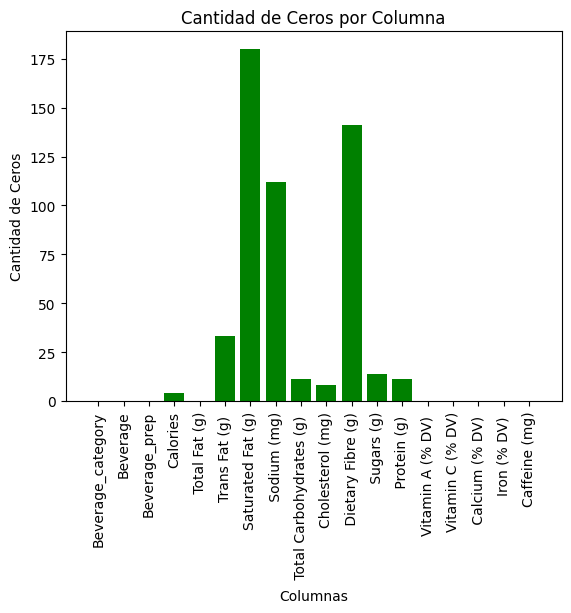

In [ ]:

color = 'green'
bar_colors = [color if val > 0 else 'light' + color for val in zeros_count.values]

# Crear el gráfico de barras
plt.bar(zeros_count.index, zeros_count.values, color=bar_colors)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Ceros')
plt.title('Cantidad de Ceros por Columna')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


- correlacionadas con la salida :
spearman(cholesterol, calories) = 0.94
spearman(total carbohydrates,calories)=0.78
spearman(sugars,calories)= 0.91

las correlaccionadas entre si,
(cholesterol, total carbohydrate)= 0.74 elegir- total carbohydrates mas ceros elimino
(cholesterol,sugar)=0.98  - elimno sugar tiene mas cantidad de cero
(sugar,total carbohydatre)= 0.74

conclusion cholesterol , sugar y total carbohydrates , se eliminan


- otras correlaciones:
(total fat, colories) = 0.59
(trans fat ,calories)= 0.6

(total fat, trans fat) = 0,93 estan muy correlacionadas- elijo total fat, trans fat tiene mas valores 0

- otras correlaciones:
(sodium, calories): 0.35
(saturated fat, calories): 0.27

(sodium, saturated): 0.8 estan correlaccionada - elimno satureted fat tiene mas valores nulos y elijo sodium

- **variables eliminadas sugar, total carbohydrates, saturated fat, trans fat**






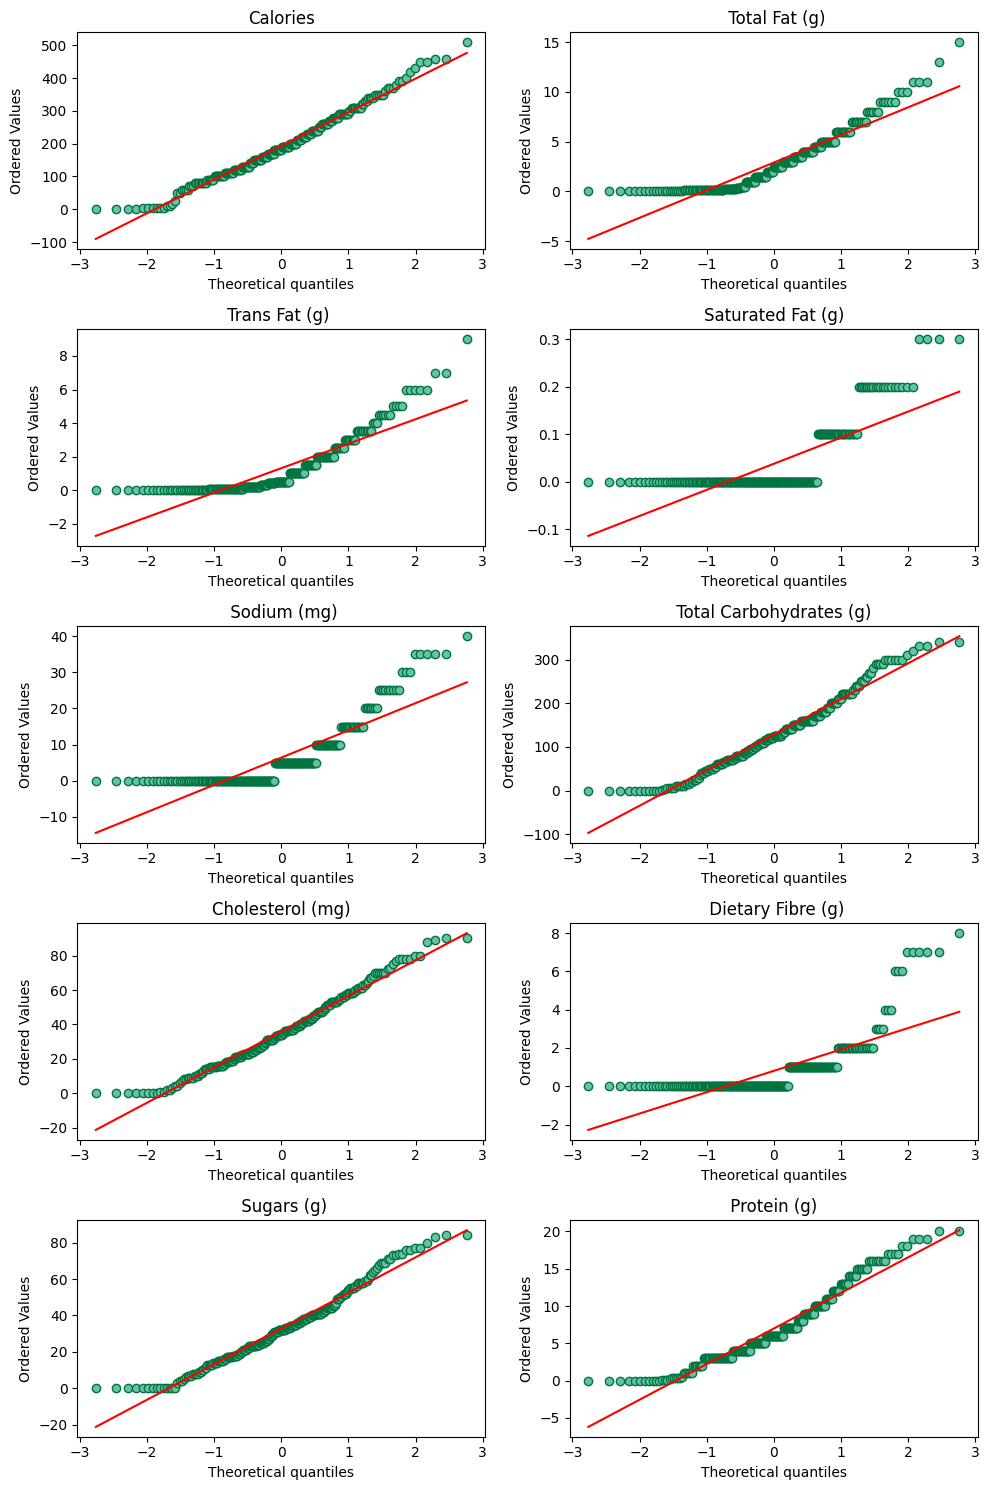

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

num_features = len(df_numeric.columns)
num_rows = (num_features + 1) // 2  # Número de filas para los subplots
num_cols = 2  # Número colum

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

for k, xi in enumerate(df_numeric.columns):
    row = k // num_cols
    col = k % num_cols
    stats.probplot(df_numeric[xi], dist="norm", plot=axes[row, col])
    axes[row, col].set_title(xi)
    axes[row, col].get_lines()[0].set_markerfacecolor('#66c2a5')
    axes[row, col].get_lines()[0].set_markeredgecolor('#007540')


if num_features % 2 != 0:
    axes[num_rows - 1, num_cols - 1].axis("off")

plt.tight_layout()
plt.show()

**Conclusión**

- Calorías: tiene una fuerte correlación positiva con "Trans Fat (g)", "Saturated Fat (g)", "Total Carbohydrates (g)", "Cholesterol (mg)", "Sugars (g)" y "Protein (g)".

- Saturated Fat: muestra una correlación positiva moderada con "Trans Fat (g)" y "Sodium (mg)".

- Cholesterol (mg):tiene una fuerte correlación positiva con "Calories" y "Sugars (g)".

- Dietary Fibre:muestra una correlación positiva moderada con "Protein (g)".


En el siguiente grafico de barras , podemos observar si existe una relacion entre las calorias y el tipo de preparación de las bebidas.

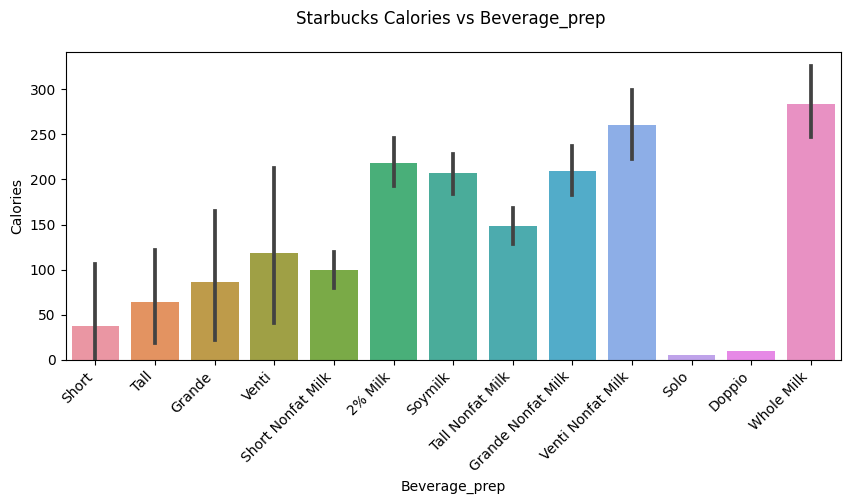

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df_drink_Expanded_menu['Beverage_prep'], y=df_drink_Expanded_menu['Calories'])
plt.xticks(rotation=45, ha='right')
plt.title("Starbucks Calories vs Beverage_prep ", pad=20)
plt.show()

Las bebidas que contienen leche tiene más cantidad de calorias, maximo- Whole Milk- Minimo: Short Nonfat Milk



---



Drink menu "-"

In [ ]:
df_drink_menu.head(5)

Unnamed: 0 Calories Fat (g)  \
0           Cool Lime Starbucks Refreshers™ Beverage       45       0   
1                                   Ombré Pink Drink        -       -   
2                                         Pink Drink        -       -   
3     Strawberry Acai Starbucks Refreshers™ Beverage       80       0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...       60       0   

  Carb. (g) Fiber (g) Protein Sodium  
0        11         0       0     10  
1         -         -       -      -  
2         -         -       -      -  
3        18         1       0     10  
4        14         1       0     10

In [ ]:
df_drink_menu = df_drink_menu[df_drink_menu != '-'].dropna()

# Mostrar las primeras 5 filas del DataFrame actualizado
df_drink_menu.head(5)

Unnamed: 0 Calories Fat (g)  \
0           Cool Lime Starbucks Refreshers™ Beverage       45       0   
3     Strawberry Acai Starbucks Refreshers™ Beverage       80       0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...       60       0   
8            Evolution Fresh™ Organic Ginger Limeade      110       0   
9                                        Iced Coffee        0       0   

  Carb. (g) Fiber (g) Protein Sodium  
0        11         0       0     10  
3        18         1       0     10  
4        14         1       0     10  
8        28         0       0      5  
9         0         0       0      0

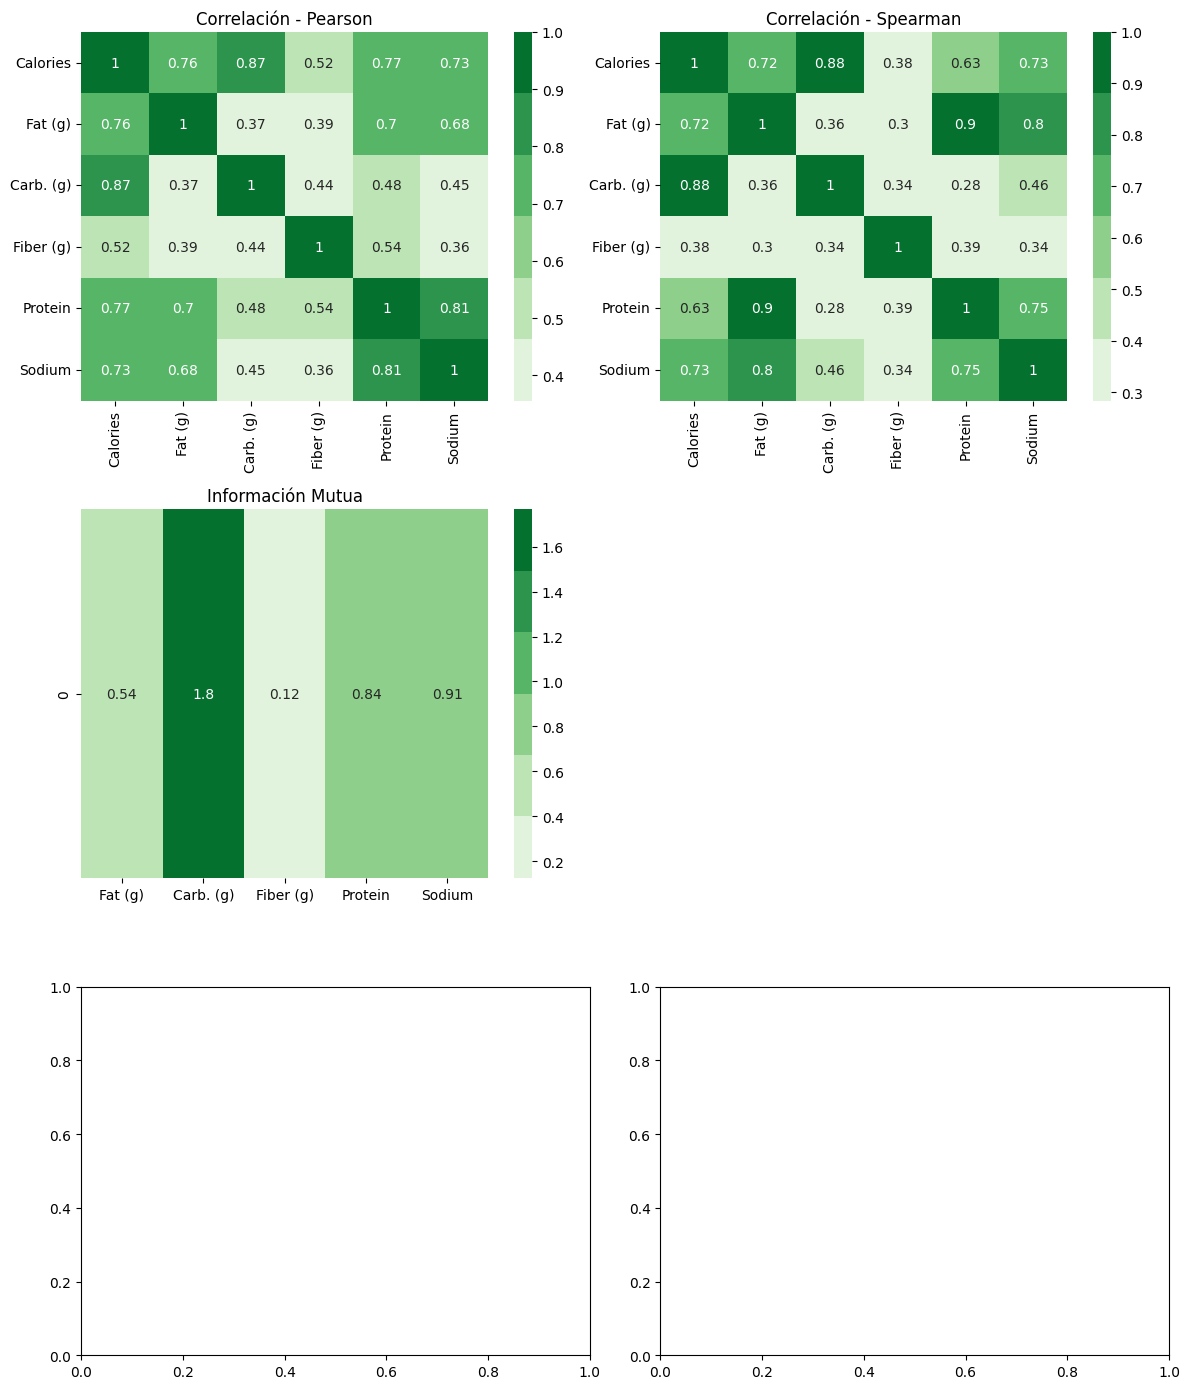

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Convertir las columnas relevantes a tipo numérico
numeric_columns = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium']
df_numeric = df_drink_menu[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_numeric.dropna(inplace=True)
# Calcula la matriz de correlación
correlation_matrix_pearson = df_numeric.corr(method='pearson')
correlation_matrix_spearman = df_numeric.corr(method='spearman')
#print("pearson",correlation_matrix_pearson);
#print("spearman",correlation_matrix_spearman);

# Calcula la información mutua
y = df_numeric['Calories']
MI = mutual_info_regression(df_numeric.drop('Calories', axis=1), y)
#print("mutua",MI)
# Obtener los nombres de los features
feature_names = df_numeric.drop('Calories', axis=1).columns.values

# Crea el mapa de calor
fig, ax = plt.subplots(3, 2, figsize=(12, 14))

# Mapa de calor de correlación Pearson
sns.heatmap(correlation_matrix_pearson, annot=True, cmap=sns.color_palette("Greens"), ax=ax[0, 0])
ax[0, 0].set_title("Correlación - Pearson")

# Mapa de calor de correlación Spearman
sns.heatmap(correlation_matrix_spearman, annot=True,cmap=sns.color_palette("Greens"), ax=ax[0, 1])
ax[0, 1].set_title("Correlación - Spearman")

# Mapa de calor de información mutua
sns.heatmap([MI], annot=True, cmap=sns.color_palette("Greens"), ax=ax[1, 0], xticklabels=feature_names)
ax[1, 0].set_title("Información Mutua")
fig.delaxes(ax[1, 1])

plt.tight_layout()
plt.show()



- correlacionadas con la salida:

(fat, calories) = 0.72
(sodium,calories)=0.73
(protein,calories)=0.63

entre ellas:

(fat,sodium)=0.8 elijo fat
(fat,protein)=0.9 elijo protein


**solo elimino sodium**



In [ ]:
zeros_count = (df_drink_menu == 0).sum()
zeros_count

Unnamed: 0    0
Calories      0
Fat (g)       0
Carb. (g)     0
Fiber (g)     0
Protein       0
Sodium        0
dtype: int64

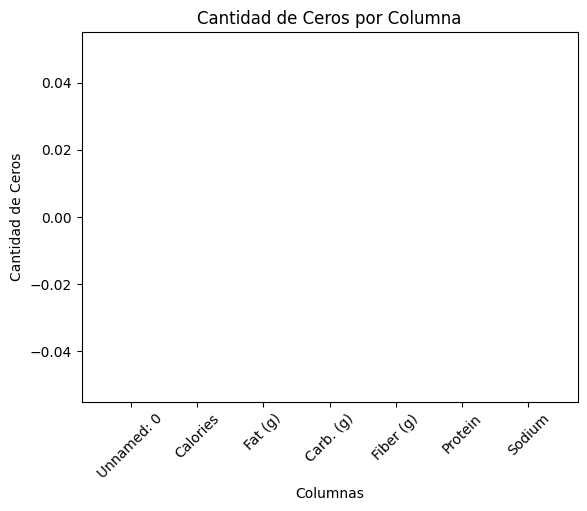

In [ ]:
color = 'green'
bar_colors = [color if val > 0 else 'light' + color for val in zeros_count.values]

# Crear el gráfico de barras
plt.bar(zeros_count.index, zeros_count.values, color=bar_colors)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Ceros')
plt.title('Cantidad de Ceros por Columna')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

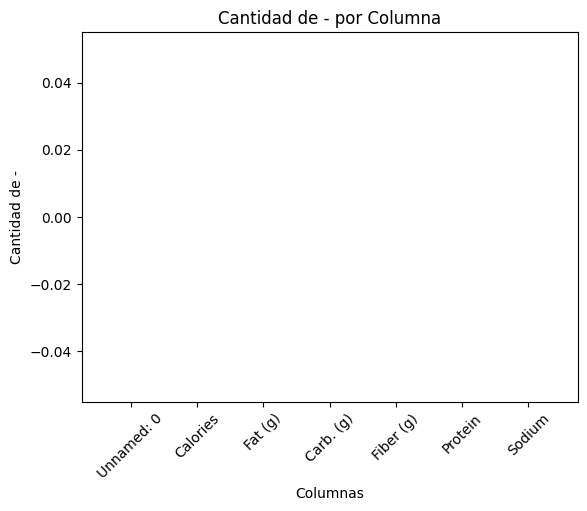

In [ ]:
zeros_count = (df_drink_menu == '-').sum()
zeros_count
color = 'green'
bar_colors = [color if val > 0 else 'light' + color for val in zeros_count.values]

# Crear el gráfico de barras
plt.bar(zeros_count.index, zeros_count.values, color=bar_colors)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de -')
plt.title('Cantidad de - por Columna')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

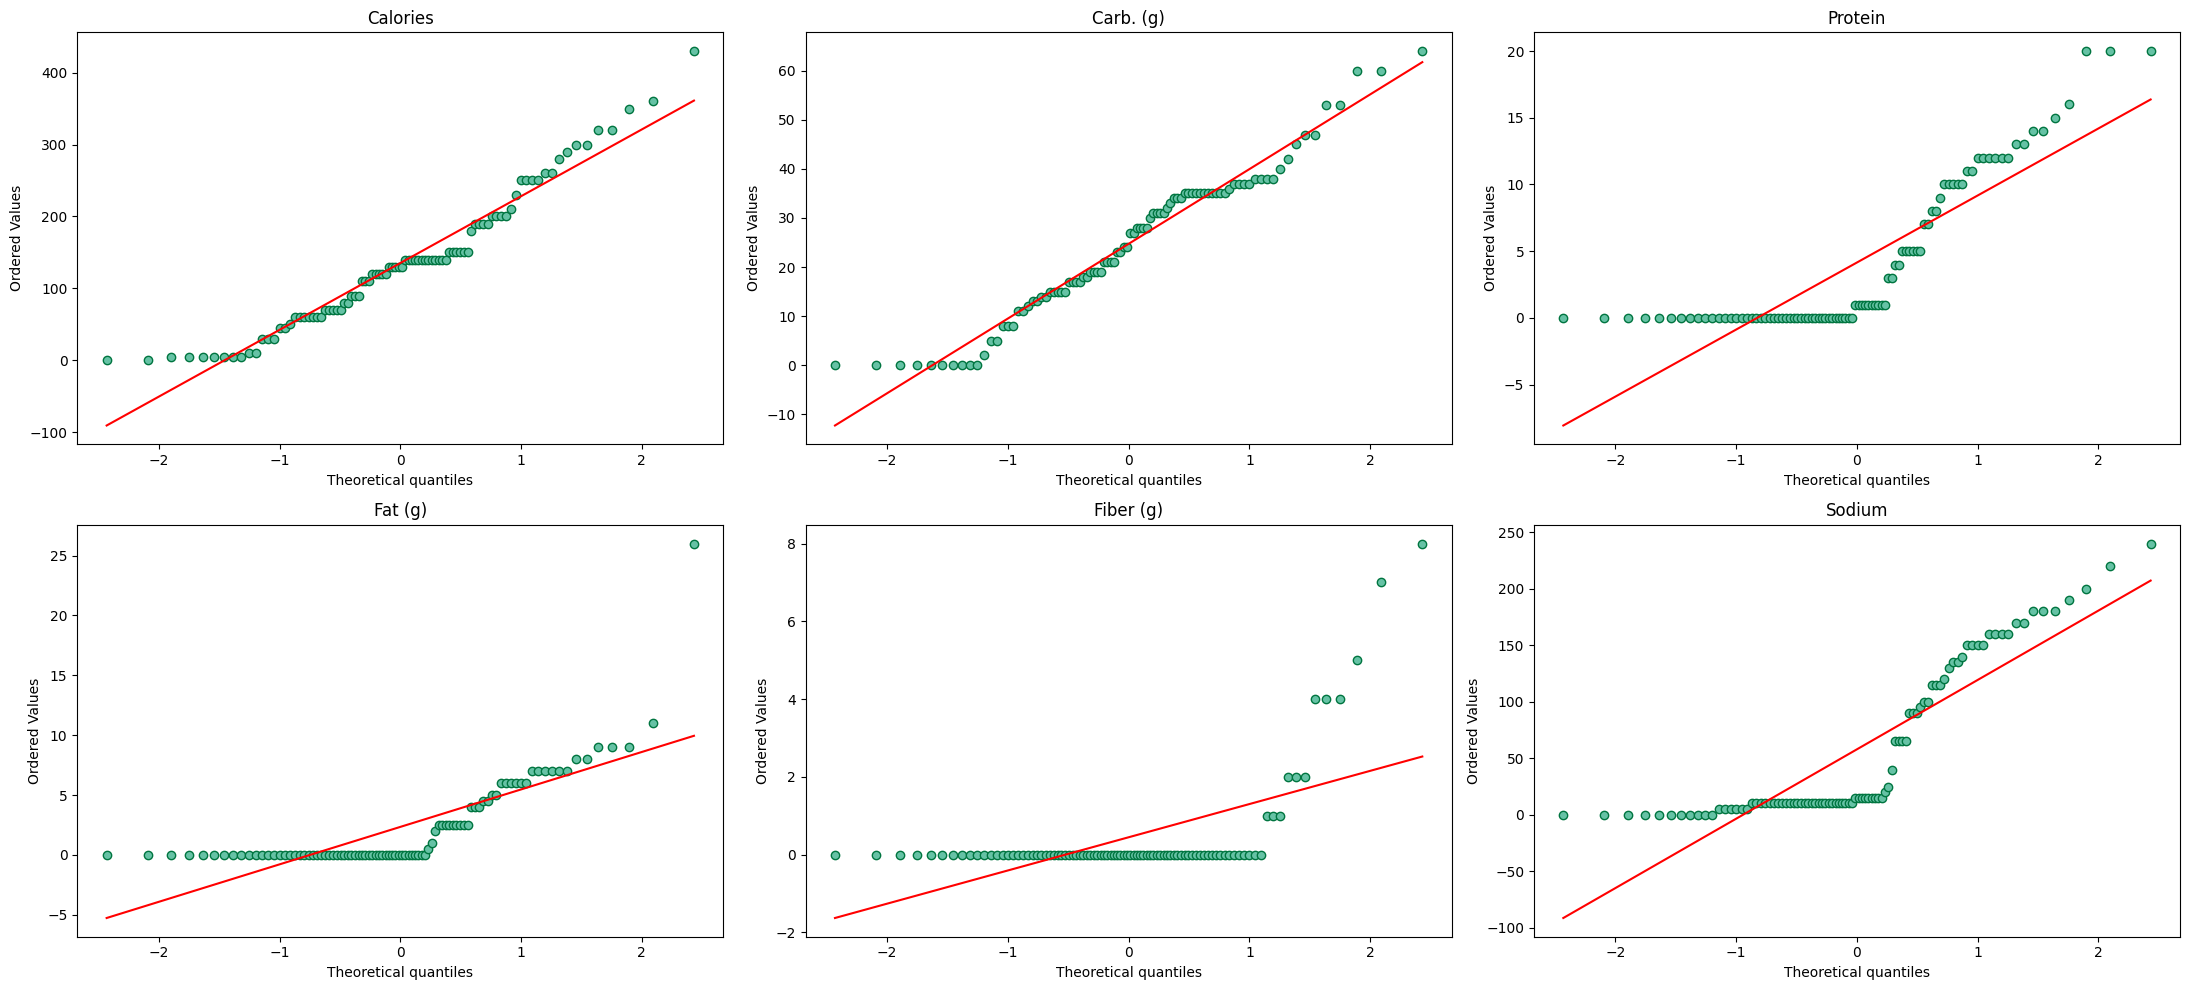

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 3, figsize=(22, 10))

for k, xi in enumerate(df_numeric.columns):
    stats.probplot(df_numeric[xi], dist="norm", plot=axis[k % 2, k // 2])
    axis[k % 2, k // 2].set_title(xi)
    axis[k % 2, k // 2].lines[0].set_color('#007540')
    axis[k % 2, k // 2].lines[0].set_markerfacecolor('#66c2a5')

plt.tight_layout()
plt.show()

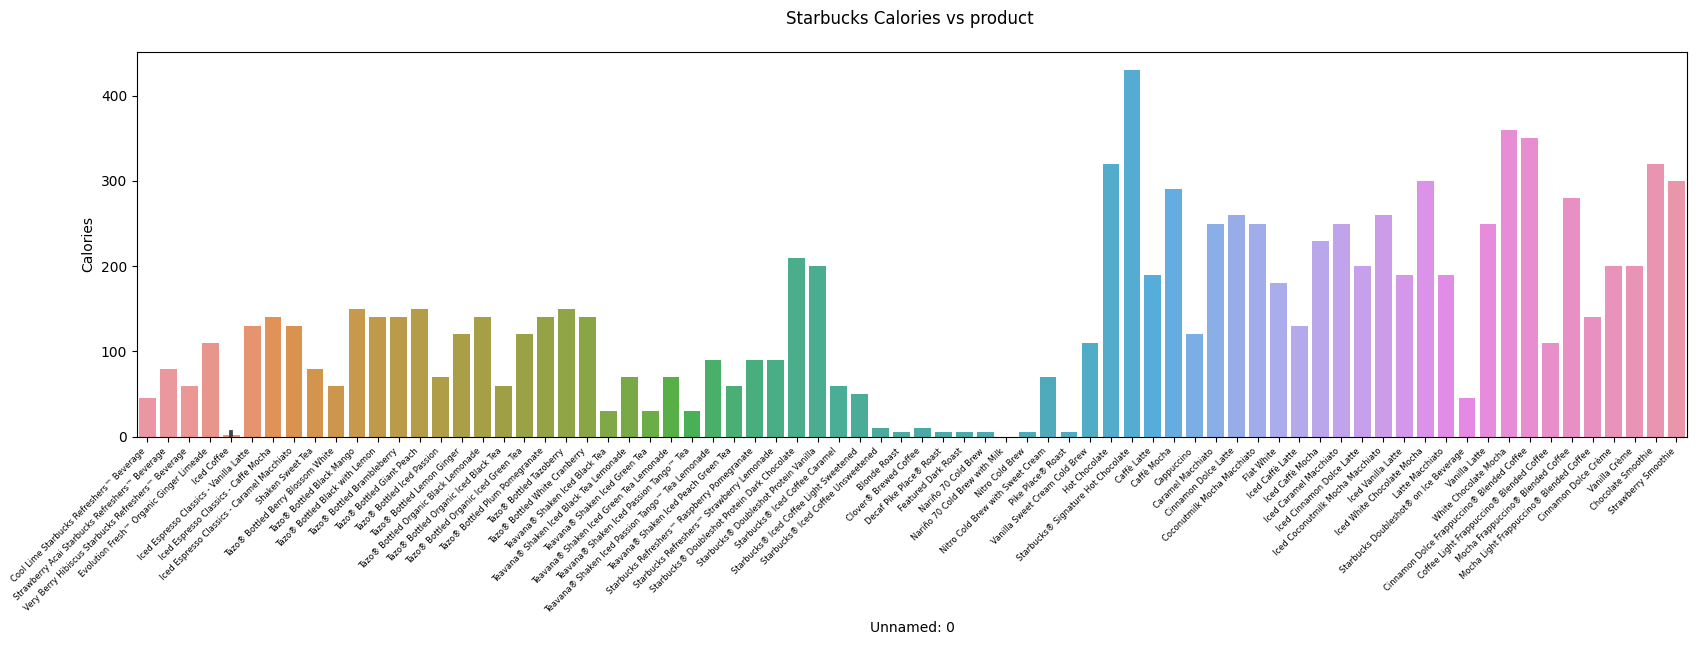

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x=df_drink_menu['Unnamed: 0'], y=df_numeric['Calories'])
plt.xticks(rotation=45, ha='right',fontsize=6)
plt.title("Starbucks Calories vs product ", pad=20)
plt.show()



---



Para responder la pregunta:

* ¿Se puede estimar las calorias de un item basado en sus propiedades?

Variables de entrada del sistema:

* Fat (g), Protein, Sodium, Carb. (g), Fiber (g), Beverage_prep, Beverage_category, Total Fat (g), Trans Fat (g), Saturated Fat (g),Protein (g), Sodium (mg), Total Carbohydrates (g), Cholesterol(mg), Dietary Fibre (g), Sugars (g), Vitamin A (% DV), Vitamin C (% DV), Calcium (% DV).

Variable de salida del sistema:
* Calories

Buscamos las distribuciones.

In [ ]:
# funcion para armar distribuciones
def distributions(data):
  data = data.select_dtypes(include='number')
  fig = plt.figure(figsize=(30,20))
  for i in range(len(data.columns)):
    fig.add_subplot(6, 3, i+1)
    sns.histplot(data=data, x=data.columns[i], color='green')
    fig.tight_layout(pad=1)
  plt.show()


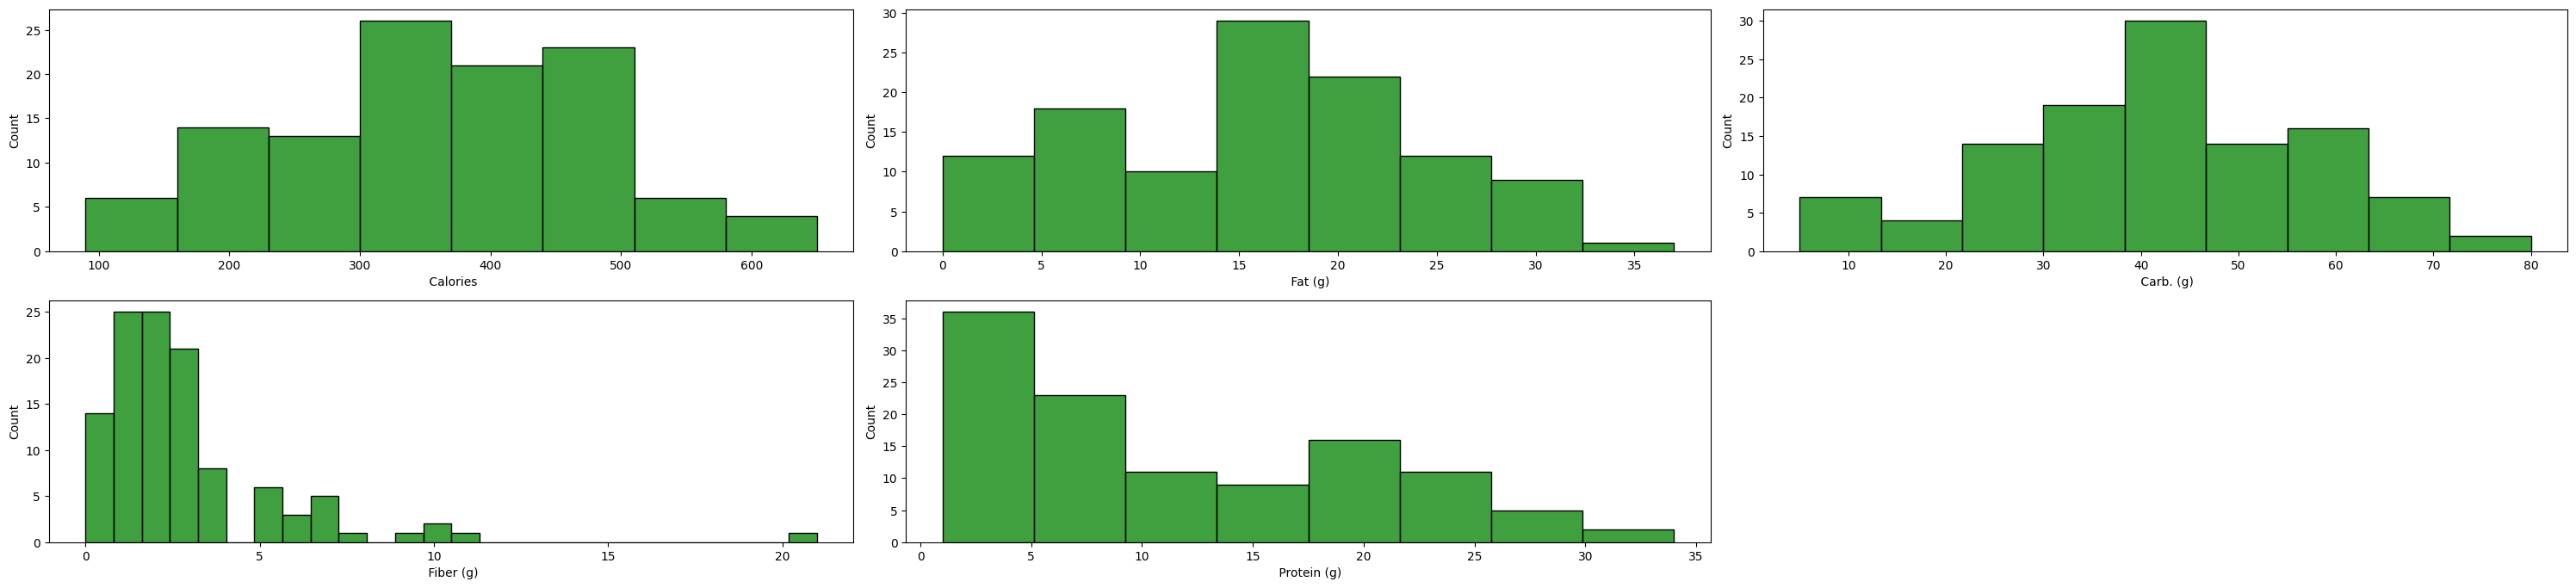

In [ ]:
distributions(df_food_menu)

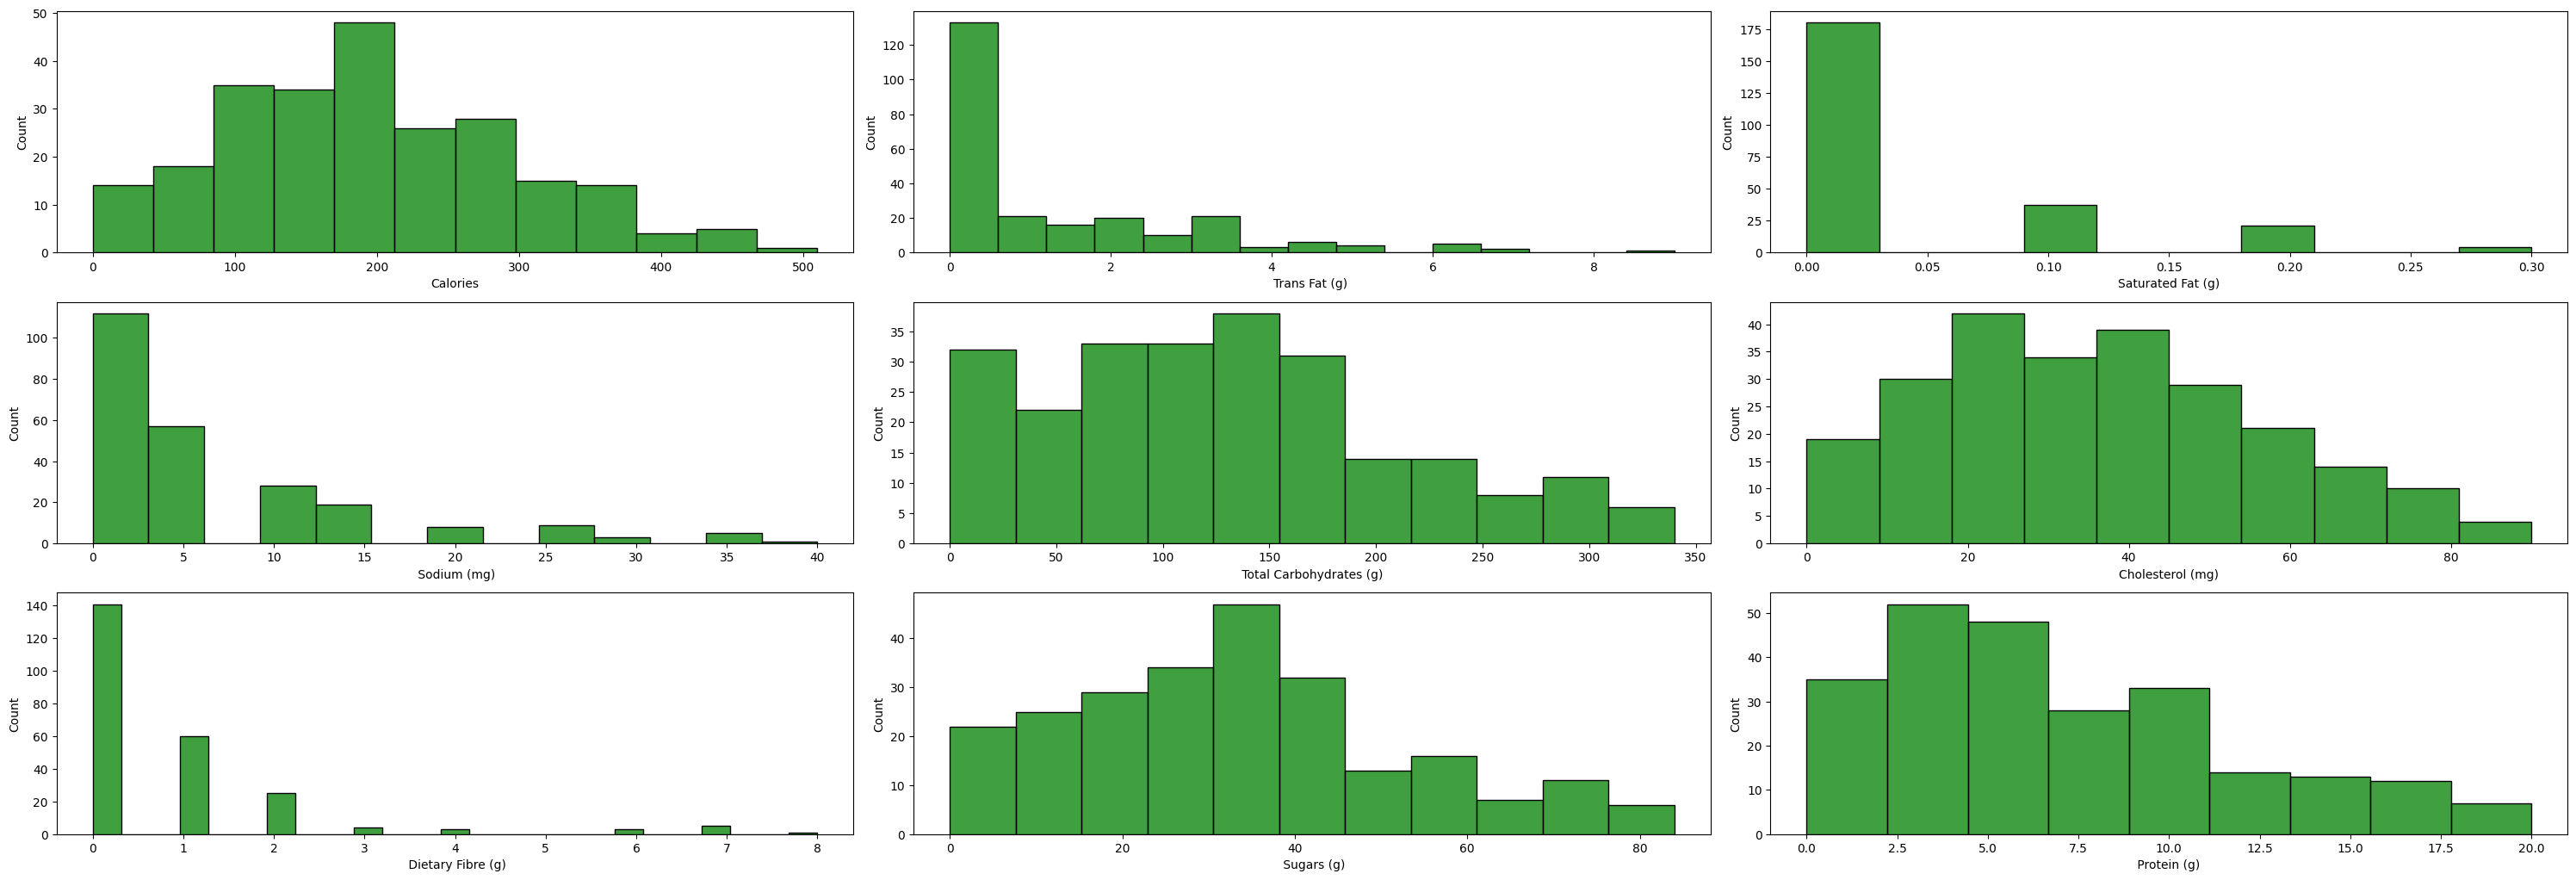

In [ ]:
distributions(df_drink_Expanded_menu)

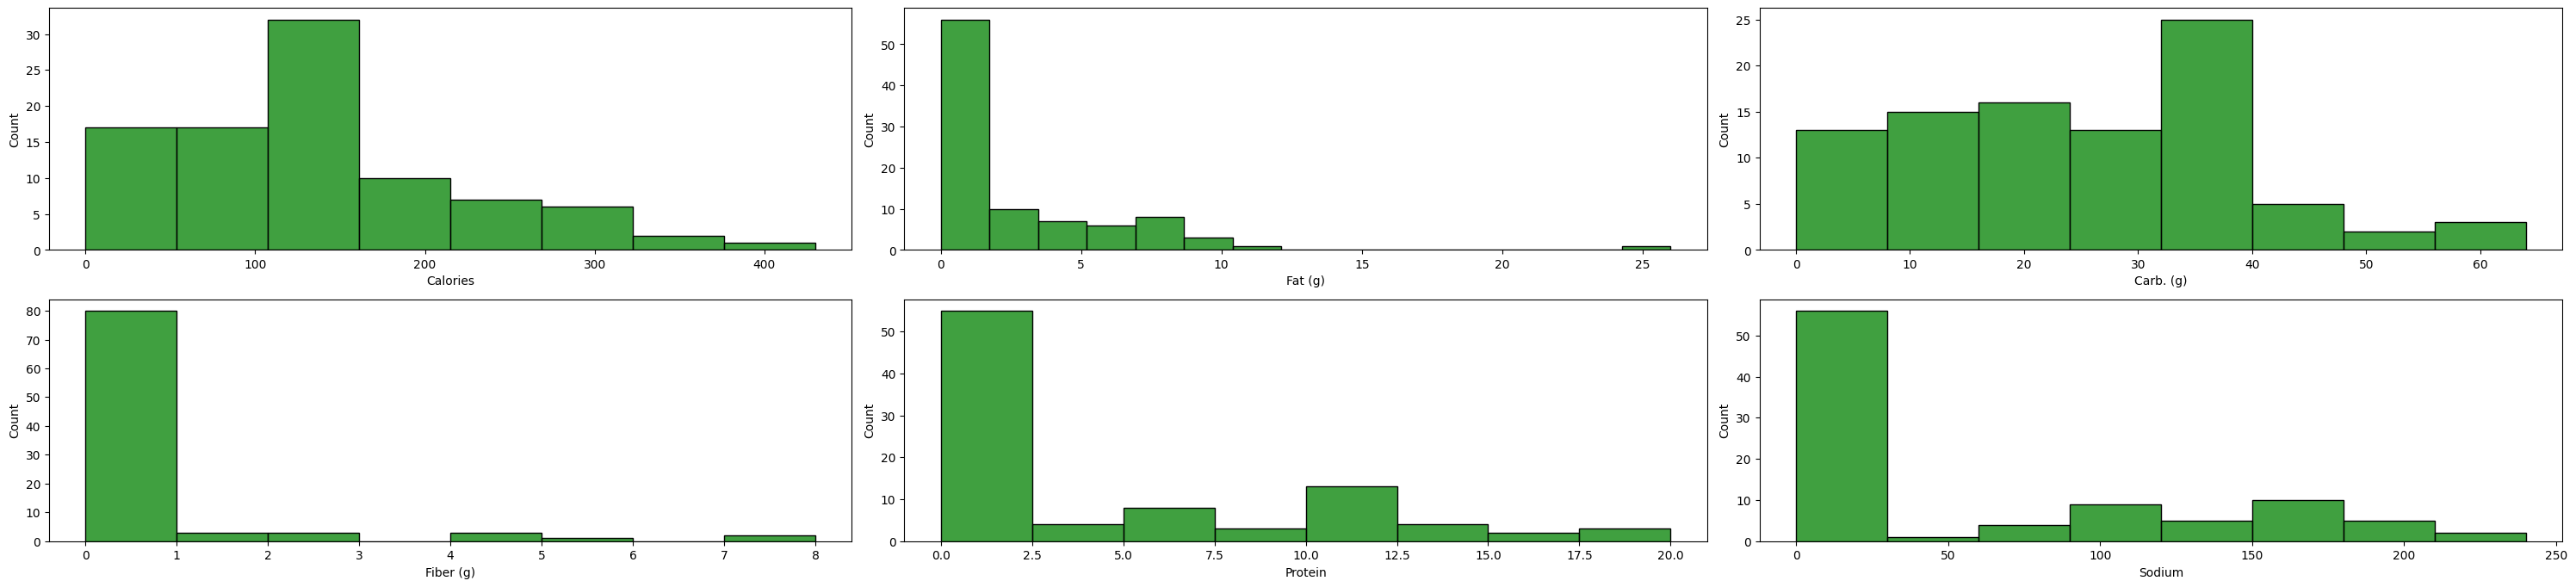

In [ ]:
dataset_to_view = df_drink_menu.drop(columns='Unnamed: 0')
for col in dataset_to_view.columns:
  dataset_to_view[col] = dataset_to_view[col].astype(float)
distributions(dataset_to_view)

Cardinalidad de las categoricas

In [ ]:
len(df_drink_menu['Unnamed: 0'].unique())

74

In [ ]:
len(df_food_menu['Unnamed: 0'].unique())

113

In [ ]:
len(df_drink_Expanded_menu['Beverage'].unique())

33

In [ ]:
len(df_drink_Expanded_menu['Beverage_category'].unique())

9

In [ ]:
len(df_drink_Expanded_menu['Beverage_prep'].unique())

13

'Unnamed: 0' para el menu de comida y bebidas es una variable categorica con alta cardinalidad al ser nombres de bebidas. Por otro lado, en el menu de bebidas expandidas tenemos 'Beverage' que tambien aparenta tener alta cardinalidad.

Buscamos las relaciones de nuestras variables independientes y dependientes.

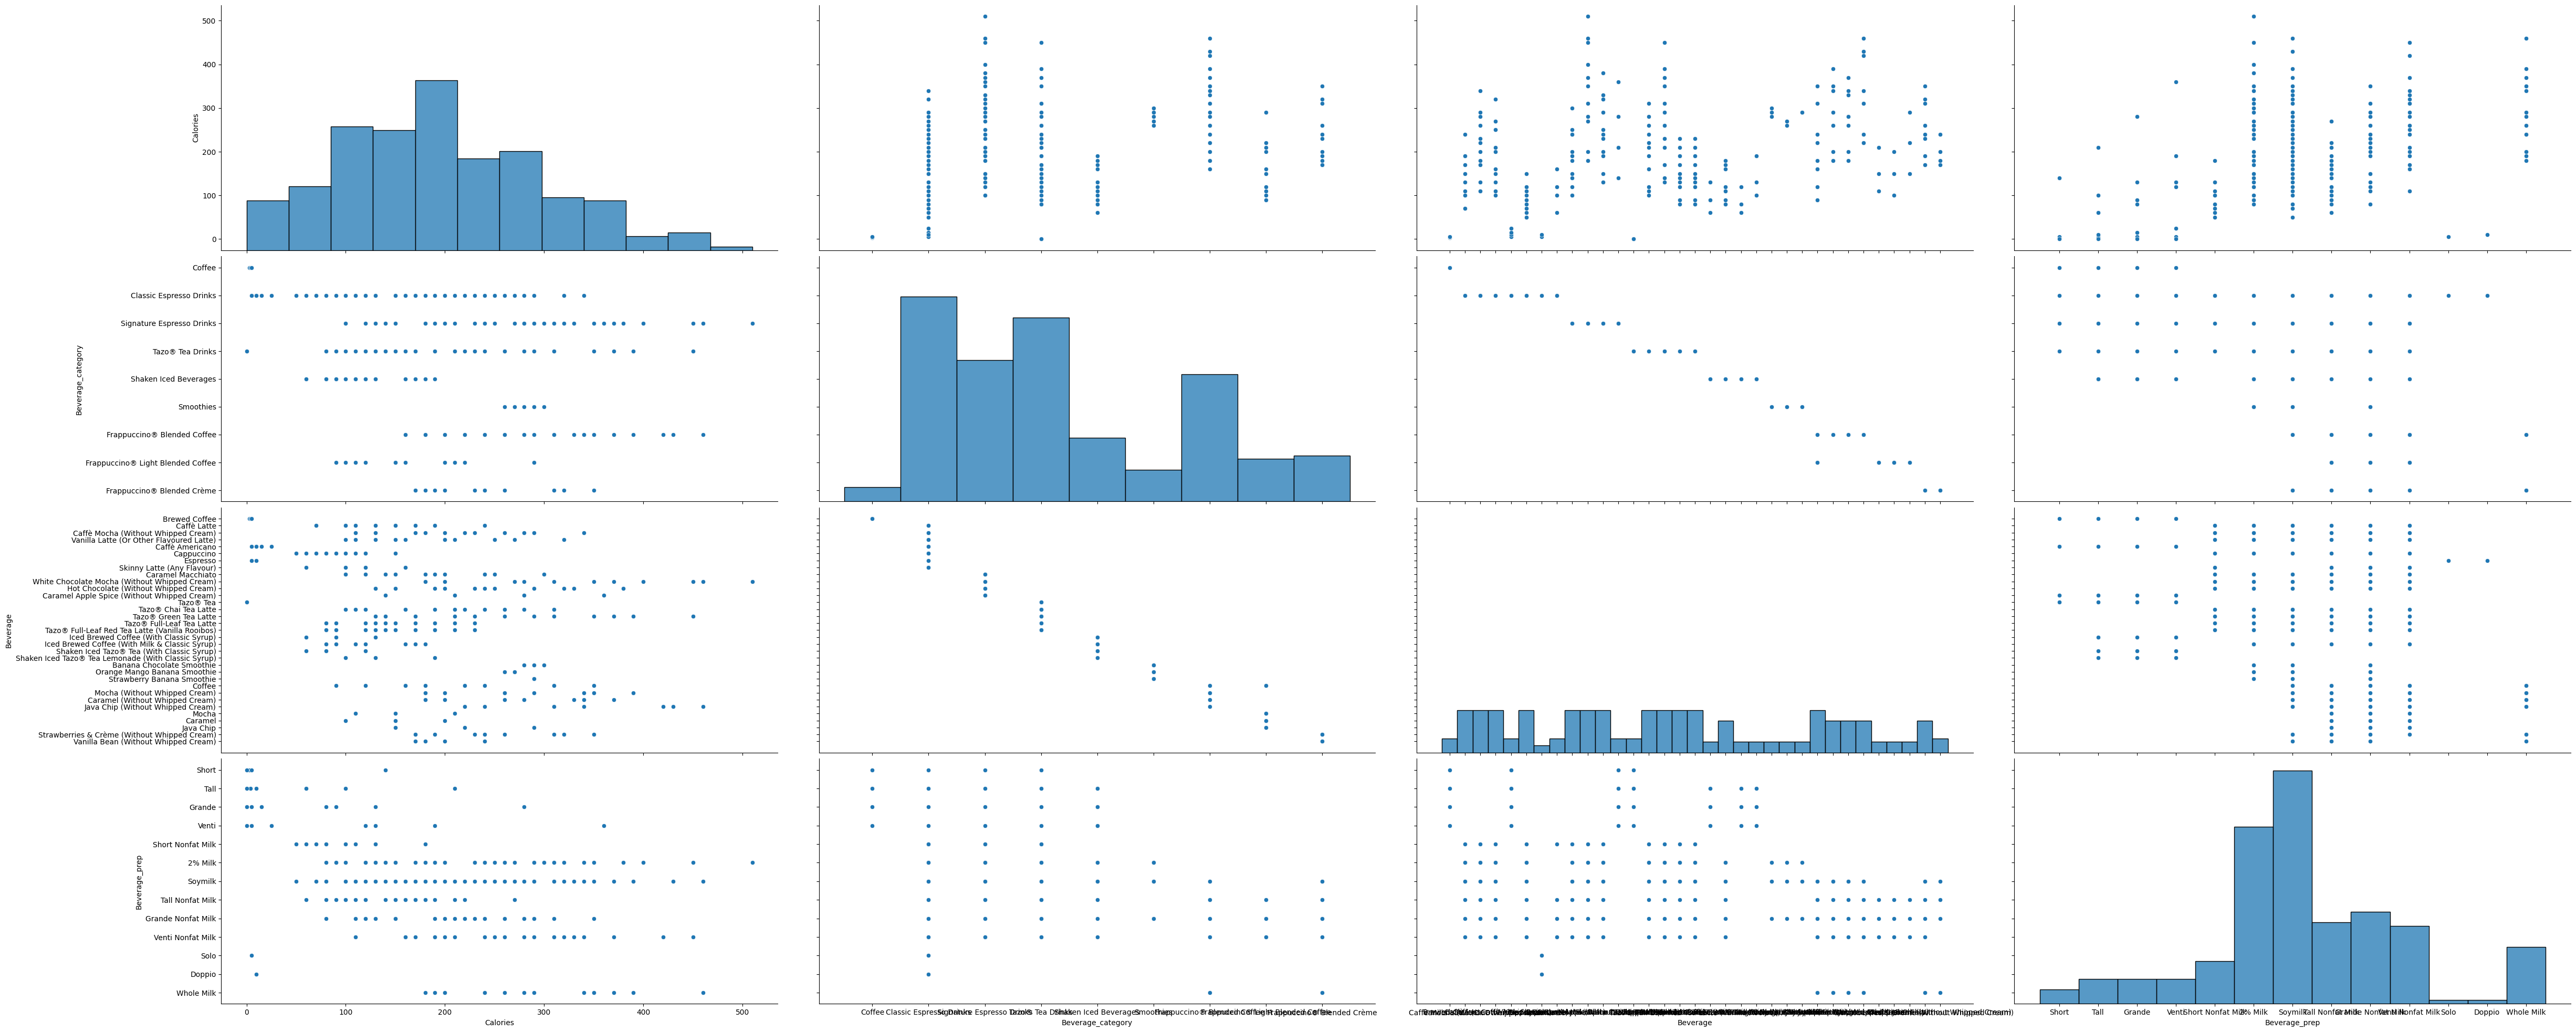

In [ ]:
# Observamos del menu de bebidas expandidas las variables categoricas con respecto a la calorias
sns.pairplot(df_drink_Expanded_menu, vars=['Calories', 'Beverage_category', 'Beverage', 'Beverage_prep'], height=5, aspect= 2.5)

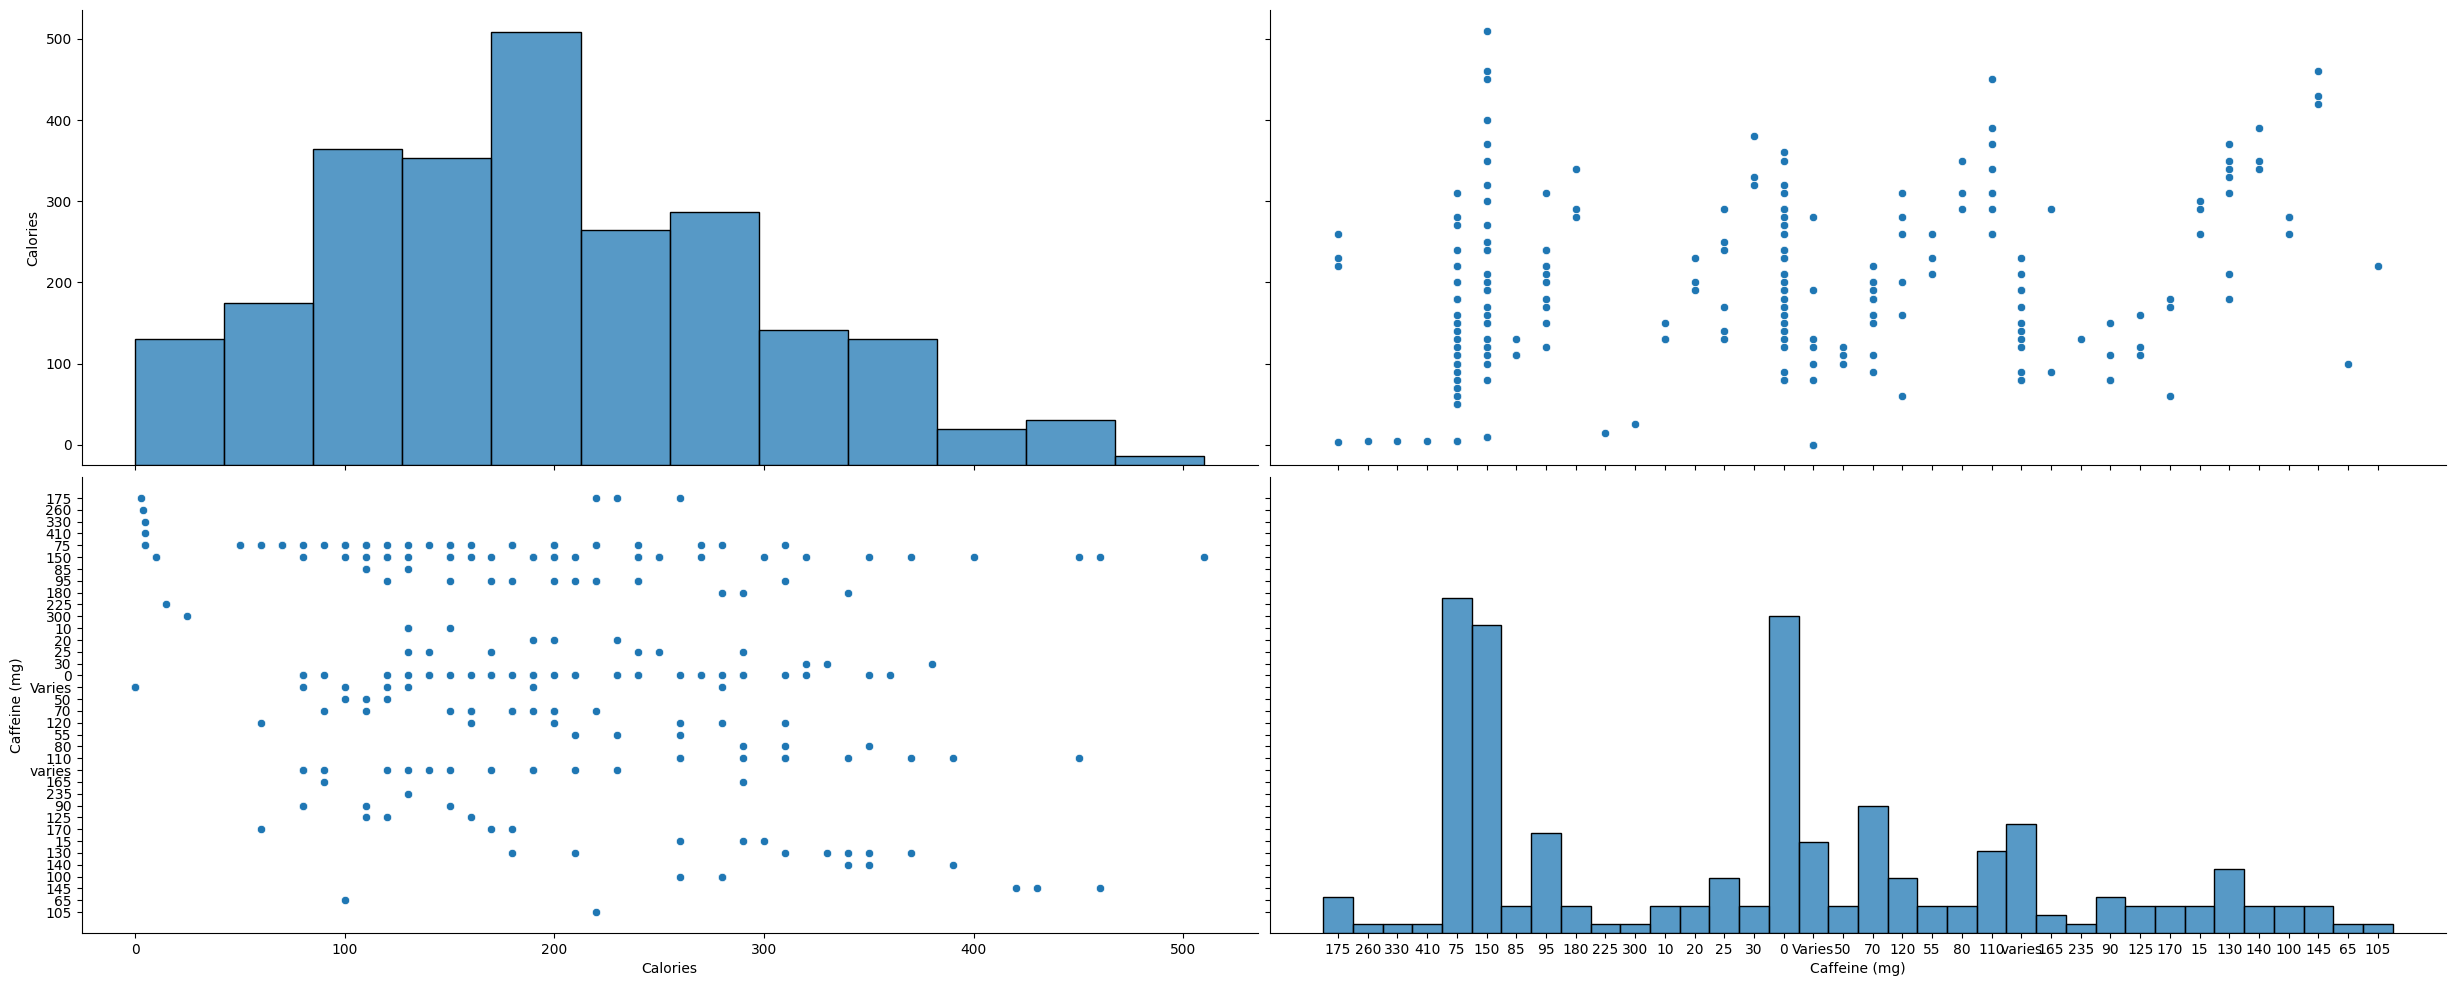

In [ ]:
# Observamos las variables compuestas con respecto a las calorias
sns.pairplot(df_drink_Expanded_menu, vars=['Calories', 'Caffeine (mg)'], height=5, aspect= 2.5)

Conclusion
* Según las relaciones establecidas anteriormente, las variables que aparentan tener una cierta linealidad con nuestra variables objectivo son 'Carb. (g)', 'Protein', 'Sodium', 'Fat (g)'.


**TRATAMIENTO DE DATOS FALTANTES**

Los datos faltantes de los datasets df_drink_menu y df_drink_Expanded_menu presentan ciertas particularidades. En el segundo dataset, los datos faltantes se presentan unicamente en la columna "Caffeine (mg)" y en las bebidas basadas  en Té de la marca TAZO. Si bien existe un sólo valor nulo en dicha columna, existen otros valores etiquetados como "Varies" que, a falta de mayor información, se los consideró también datos faltantes. En el caso del df_drink_menu la cantidad de datos faltantes es mucho mayor, cerca de un 50%, pero con la caracteristica de que son registros que, además de ser bebidas de la marca TAZO, no tienen cargado ningun predictor.
En ambos casos se concluye que los datos faltantes no son aleatorios y se los cataloga como MNAR (Missing Not At Random).

In [ ]:
# El dataset df_drink_menu tiene 48 filas con todas las features nulas. Dado que, para esas filas, solo tenemos el nombre de la bebida entendems que cualquier intento de imputación
# generará solo ruido en el dataset. Por lo anterior procedemos a eliminar dichos registros del dataset.

df_drink_menu.drop(df_drink_menu[
    (df_drink_menu['Calories'] == '-')
  & (df_drink_menu['Fat (g)'] == '-')
  & (df_drink_menu['Carb. (g)'] == '-')
  & (df_drink_menu['Fiber (g)'] == '-')
  & (df_drink_menu['Protein'] == '-')
  & (df_drink_menu['Sodium'] == '-')
  ].index, inplace = True)


In [ ]:
# A modo de prueba, rompemos el dataset df_drink_menu agregando valores nulos en forma aleatoria en las distintas columnas. Luego se probarán distintos métodos
# para imputar valores faltantes.


In [ ]:

df_drink_menu['Calories'] = df_drink_menu['Calories'].astype(float)
df_drink_menu['Fat (g)'] = df_drink_menu['Fat (g)'].astype(float)
df_drink_menu['Carb. (g)'] = df_drink_menu['Carb. (g)'].astype(float)
df_drink_menu['Fiber (g)'] = df_drink_menu['Fiber (g)'].astype(float)
df_drink_menu['Protein'] = df_drink_menu['Protein'].astype(float)
df_drink_menu['Sodium'] = df_drink_menu['Sodium'].astype(float)


In [ ]:
df_nulls = df_drink_menu.drop(labels='Unnamed: 0', axis=1).apply(lambda x: x.sample(frac=0.94))
df_nulls.insert(loc=0, column='Drink', value=df_drink_menu['Unnamed: 0'])
df_nulls.head()

Drink  Calories  Fat (g)  \
0           Cool Lime Starbucks Refreshers™ Beverage      45.0      0.0   
3     Strawberry Acai Starbucks Refreshers™ Beverage      80.0      0.0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...       NaN      0.0   
8            Evolution Fresh™ Organic Ginger Limeade     110.0      0.0   
9                                        Iced Coffee       NaN      0.0   

   Carb. (g)  Fiber (g)  Protein  Sodium  
0       11.0        0.0      0.0    10.0  
3       18.0        NaN      0.0    10.0  
4       14.0        1.0      NaN    10.0  
8       28.0        0.0      0.0     5.0  
9        0.0        0.0      0.0     0.0

In [ ]:
# Prueba de métodos para la imputación de datos faltantes

df_nulls = df_nulls.drop(labels='Drink', axis=1)
df_nulls.head(10)

Calories  Fat (g)  Carb. (g)  Fiber (g)  Protein  Sodium
0       45.0      0.0       11.0        0.0      0.0    10.0
3       80.0      0.0       18.0        NaN      0.0    10.0
4        NaN      0.0       14.0        1.0      NaN    10.0
8      110.0      0.0       28.0        0.0      0.0     5.0
9        NaN      0.0        0.0        0.0      0.0     0.0
11     130.0      2.5       21.0        NaN      5.0    65.0
12     140.0      2.5       23.0        0.0      5.0    90.0
13     130.0      2.5       21.0        0.0      5.0    65.0
18      80.0      0.0       19.0        0.0      NaN    10.0
19       NaN      0.0       15.0        0.0      0.0    10.0

In [ ]:
# Utilizando KNN

from sklearn.impute import KNNImputer
import numpy as np

param_grid = {
    "imputer__n_neighbors": [1,3,5,7,9,11 ]
}

for param in param_grid["imputer__n_neighbors"]:

  imputer = KNNImputer(missing_values = np.nan, n_neighbors=param)
  imputer.set_output(transform = "pandas")
  df_nulls_knn_imputer = imputer.fit_transform(df_nulls)
  df_nulls_knn_imputer_error = df_drink_menu.drop(labels='Unnamed: 0', axis=1) - df_nulls_knn_imputer
  print('Neighbors = ', param)
  print('Error % = ',100*(abs(df_nulls_knn_imputer_error.sum()/df_drink_menu.drop(labels='Unnamed: 0', axis=1).sum())).sum())
  print()


Neighbors =  1
Error % =  11.245507395870751

Neighbors =  3
Error % =  7.968882840911968

Neighbors =  5
Error % =  9.882255376190678

Neighbors =  7
Error % =  11.211146449444856

Neighbors =  9
Error % =  10.945656731254845

Neighbors =  11
Error % =  10.745545862948838



Con 1 vecino se obtuvo el mejor resultado general.

In [ ]:
# Utilizando MICE. Si bien MICE es un algoritmo que supone aleatoriedad en los datos faltantes, de todas formas, sabiendo que seguramente no obtengamos buenos resultados, decidimos probarlo y evaluar sus resultados.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

param_grid = {
    "imputer__n_nearest_features": [None,1,2,3]
}

for param in param_grid["imputer__n_nearest_features"]:
  print('Number of features to use to estimate the missing  = ', param)
  imputer = IterativeImputer(n_nearest_features=param, verbose = 2, random_state=46)
  imputer.set_output(transform = "pandas")
  df_nulls_mice_imputer = imputer.fit_transform(df_nulls)
  df_nulls_mice_imputer_error = df_drink_menu.drop(labels='Unnamed: 0', axis=1) - df_nulls_mice_imputer

  print('Error % = ',100*(abs(df_nulls_mice_imputer_error.sum()/df_drink_menu.drop(labels='Unnamed: 0', axis=1).sum())).sum())
  print()



Number of features to use to estimate the missing  =  None
[IterativeImputer] Completing matrix with shape (92, 6)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Change: 148.47867053870027, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.04
[IterativeImputer] Change: 9.487589121275239, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.05
[IterativeImputer] Change: 5.177000467086355, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.06
[IterativeImputer] Change: 3.184642773245237, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.07
[IterativeImputer] Change: 1.9540849573173196, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.08
[IterativeImputer] Change: 1.1979864673874703, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 7/10, elapsed tim

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Ending imputation round 5/10, elapsed time 0.05
[IterativeImputer] Change: 94.74525765549502, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.06
[IterativeImputer] Change: 24.296456175683517, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.07
[IterativeImputer] Change: 114.31530216192023, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.09
[IterativeImputer] Change: 94.1912694507296, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.10
[IterativeImputer] Change: 133.14616664759112, scaled tolerance: 0.43 
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.11
[IterativeImputer] Change: 146.3131454462768, scaled tolerance: 0.43 
Error % =  14.38612349459152



/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
# Imputación estadística

from sklearn.impute import SimpleImputer

# Promedio
imputer = SimpleImputer(strategy='mean',add_indicator=True)
imputer.set_output(transform = "pandas")
df_imputed_mean = imputer.fit_transform(df_nulls)
df_nulls_mean_imputer_error = df_drink_menu.drop(labels='Unnamed: 0', axis=1) - df_imputed_mean
print('(Promedio) Error % = ',100*(abs(df_nulls_mean_imputer_error.sum()/df_drink_menu.drop(labels='Unnamed: 0', axis=1).sum())).sum())
print()

# Moda
imputer = SimpleImputer(strategy='most_frequent',add_indicator=True)
imputer.set_output(transform = "pandas")
df_imputed_mode = imputer.fit_transform(df_nulls)
df_nulls_mode_imputer_error = df_drink_menu.drop(labels='Unnamed: 0', axis=1) - df_imputed_mode
print('(Moda) Error % = ',100*(abs(df_nulls_mode_imputer_error.sum()/df_drink_menu.drop(labels='Unnamed: 0', axis=1).sum())).sum())
print()

# Moda
imputer = SimpleImputer(strategy='median',add_indicator=True)
imputer.set_output(transform = "pandas")
df_imputed_median = imputer.fit_transform(df_nulls)
df_nulls_median_imputer_error = df_drink_menu.drop(labels='Unnamed: 0', axis=1) - df_imputed_median
print('(Mediana) Error % = ',100*(abs(df_nulls_median_imputer_error.sum()/df_drink_menu.drop(labels='Unnamed: 0', axis=1).sum())).sum())
print()


# Constante
imputer = SimpleImputer(strategy='constant',add_indicator=True, fill_value=0)
imputer.set_output(transform = "pandas")
df_imputed_constant = imputer.fit_transform(df_nulls)
df_nulls_constant_imputer_error = df_drink_menu.drop(labels='Unnamed: 0', axis=1) - df_imputed_constant
print('(Constant) Error % = ',100*(abs(df_nulls_constant_imputer_error.sum()/df_drink_menu.drop(labels='Unnamed: 0', axis=1).sum())).sum())
print()



(Promedio) Error % =  18.473887457542293

(Moda) Error % =  19.813952061480872

(Mediana) Error % =  22.245561807358484

(Constant) Error % =  25.51384563216599



In [ ]:
# Imputacion de dato nulo en df_drink_Expanded_menu utilizando KNN con n_neighbors = 7

df_drink_Expanded_menu.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [ ]:
df_drink_Expanded_menu.head(10)

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   
5  Classic Espresso Drinks    Caffè Latte            2% Milk       100   
6  Classic Espresso Drinks    Caffè Latte            Soymilk        70   
7  Classic Espresso Drinks    Caffè Latte   Tall Nonfat Milk       100   
8  Classic Espresso Drinks    Caffè Latte            2% Milk       150   
9  Classic Espresso Drinks    Caffè Latte            Soymilk       110   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   
5            3.5             2.0                0.1            15   
6            2.5             0.4                0.0             0   
7            0.2             0.2                0.0             5   
8              6             3.0                0.2            25   
9            4.5             0.5                0.0             0   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   
5                         85                10                   0   
6                         65                 6                   1   
7                        120                15                   0   
8                        135                15                   0   
9                        105                10                   1   

    Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0            0            0.3                0%               0%   
1            0            0.5                0%               0%   
2            0            1.0                0%               0%   
3            0            1.0                0%               0%   
4            9            6.0               10%               0%   
5            9            6.0               10%               0%   
6            4            5.0                6%               0%   
7           14           10.0               15%               0%   
8           14           10.0               15%               0%   
9            6            8.0               10%               0%   

   Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
0               0%           0%           175  
1               0%           0%           260  
2               0%           0%           330  
3               2%           0%           410  
4              20%           0%            75  
5              20%           0%            75  
6              20%           8%            75  
7              30%           0%            75  
8              30%           0%            75  
9              30%          15%            75

In [ ]:
df_drink_Expanded_menu[df_drink_Expanded_menu['Caffeine (mg)'].isna()]

Beverage_category                                        Beverage  \
158  Shaken Iced Beverages  Iced Brewed Coffee (With Milk & Classic Syrup)   

    Beverage_prep  Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
158       2% Milk        90              1             0.5                0.0   

      Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
158             5                         25                18   

      Dietary Fibre (g)   Sugars (g)   Protein (g)  Vitamin A (% DV)   \
158                   0           18            2.0                2%   

    Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
158               0%               6%        0.00%           NaN

In [ ]:
list(df_drink_Expanded_menu.columns.values)

['Beverage_category',
 'Beverage',
 'Beverage_prep',
 'Calories',
 ' Total Fat (g)',
 'Trans Fat (g) ',
 'Saturated Fat (g)',
 ' Sodium (mg)',
 ' Total Carbohydrates (g) ',
 'Cholesterol (mg)',
 ' Dietary Fibre (g)',
 ' Sugars (g)',
 ' Protein (g) ',
 'Vitamin A (% DV) ',
 'Vitamin C (% DV)',
 ' Calcium (% DV) ',
 'Iron (% DV) ',
 'Caffeine (mg)']

In [ ]:
df_drink_Expanded_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [ ]:
labels_to_remove = ['Beverage_category',
 'Beverage',
 'Beverage_prep',
 ' Total Fat (g)',
 'Vitamin A (% DV) ',
 'Vitamin C (% DV)',
 ' Calcium (% DV) ',
 'Iron (% DV) ']

df_drink_Expanded_menu.loc[df_drink_Expanded_menu["Caffeine (mg)"] == "Varies", "Caffeine (mg)"] = np.nan   # cuidado con esto! le va a imputar valores al Té **
df_drink_Expanded_menu.loc[df_drink_Expanded_menu["Caffeine (mg)"] == "varies", "Caffeine (mg)"] = np.nan   # cuidado con esto! le va a imputar valores al Té **

# ** quizas lo mas conveniente es omitir estos valores en la imputación o sacarlos directamente del dataset.

imputer = KNNImputer(missing_values = np.nan, n_neighbors=1)
imputer.set_output(transform = "pandas")
df_drink_knn_imputer = imputer.fit_transform(df_drink_Expanded_menu.drop(labels=labels_to_remove, axis=1))


df_drink_knn_imputer

Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0         3.0             0.0                0.0           0.0   
1         4.0             0.0                0.0           0.0   
2         5.0             0.0                0.0           0.0   
3         5.0             0.0                0.0           0.0   
4        70.0             0.1                0.0           5.0   
..        ...             ...                ...           ...   
237     320.0             0.4                0.0           0.0   
238     170.0             0.1                0.0           0.0   
239     200.0             2.0                0.1          10.0   
240     180.0             0.2                0.0           0.0   
241     240.0             0.1                0.0           5.0   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5.0               0.0                 0.0   
1                         10.0               0.0                 0.0   
2                         10.0               0.0                 0.0   
3                         10.0               0.0                 0.0   
4                         75.0              10.0                 0.0   
..                         ...               ...                 ...   
237                      250.0              67.0                 1.0   
238                      160.0              39.0                 0.0   
239                      160.0              39.0                 0.0   
240                      160.0              37.0                 1.0   
241                      230.0              56.0                 0.0   

      Sugars (g)   Protein (g)   Caffeine (mg)  
0            0.0            0.3          175.0  
1            0.0            0.5          260.0  
2            0.0            1.0          330.0  
3            0.0            1.0          410.0  
4            9.0            6.0           75.0  
..           ...            ...            ...  
237         64.0            5.0            0.0  
238         38.0            4.0            0.0  
239         38.0            3.0            0.0  
240         35.0            3.0            0.0  
241         55.0            5.0            0.0  

[242 rows x 10 columns]

In [ ]:
df_drink_knn_imputer.isnull().sum()

Calories                     0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Caffeine (mg)                0
dtype: int64

In [ ]:
# Funcion para eliminar % y convertir en numerica
def remove_percentaje(df: pd.DataFrame, labels: list):
  for label in labels:
    df[label] = df[label].replace('\%','', regex=True)
    df[label] = df[label].astype('float')
  return df


In [ ]:
# En caso que dejemos la imputacion de bebidas expandidas
# Armamos el dataset con la imputacion + los labels removidos
df_drink_Expanded_menu = pd.concat([df_drink_knn_imputer, df_drink_Expanded_menu[labels_to_remove]], axis=1)
df_drink_Expanded_menu.head()

Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0       3.0             0.0                0.0           0.0   
1       4.0             0.0                0.0           0.0   
2       5.0             0.0                0.0           0.0   
3       5.0             0.0                0.0           0.0   
4      70.0             0.1                0.0           5.0   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                        5.0               0.0                 0.0   
1                       10.0               0.0                 0.0   
2                       10.0               0.0                 0.0   
3                       10.0               0.0                 0.0   
4                       75.0              10.0                 0.0   

    Sugars (g)   Protein (g)   Caffeine (mg)        Beverage_category  \
0          0.0            0.3          175.0                   Coffee   
1          0.0            0.5          260.0                   Coffee   
2          0.0            1.0          330.0                   Coffee   
3          0.0            1.0          410.0                   Coffee   
4          9.0            6.0           75.0  Classic Espresso Drinks   

        Beverage      Beverage_prep  Total Fat (g) Vitamin A (% DV)   \
0  Brewed Coffee              Short            0.1                0%   
1  Brewed Coffee               Tall            0.1                0%   
2  Brewed Coffee             Grande            0.1                0%   
3  Brewed Coffee              Venti            0.1                0%   
4    Caffè Latte  Short Nonfat Milk            0.1               10%   

  Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)   
0               0%               0%           0%  
1               0%               0%           0%  
2               0%               0%           0%  
3               0%               2%           0%  
4               0%              20%           0%

In [ ]:
# Removemos valores con % y los pasamos a numericos
label_percentaje = [
  'Vitamin A (% DV) ',
  'Vitamin C (% DV)',
  ' Calcium (% DV) ',
  'Iron (% DV) ']
df_drink_Expanded_menu = remove_percentaje(df_drink_Expanded_menu, label_percentaje)
df_drink_Expanded_menu.head(10)

Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0       3.0             0.0                0.0           0.0   
1       4.0             0.0                0.0           0.0   
2       5.0             0.0                0.0           0.0   
3       5.0             0.0                0.0           0.0   
4      70.0             0.1                0.0           5.0   
5     100.0             2.0                0.1          15.0   
6      70.0             0.4                0.0           0.0   
7     100.0             0.2                0.0           5.0   
8     150.0             3.0                0.2          25.0   
9     110.0             0.5                0.0           0.0   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                        5.0               0.0                 0.0   
1                       10.0               0.0                 0.0   
2                       10.0               0.0                 0.0   
3                       10.0               0.0                 0.0   
4                       75.0              10.0                 0.0   
5                       85.0              10.0                 0.0   
6                       65.0               6.0                 1.0   
7                      120.0              15.0                 0.0   
8                      135.0              15.0                 0.0   
9                      105.0              10.0                 1.0   

    Sugars (g)   Protein (g)   Caffeine (mg)        Beverage_category  \
0          0.0            0.3          175.0                   Coffee   
1          0.0            0.5          260.0                   Coffee   
2          0.0            1.0          330.0                   Coffee   
3          0.0            1.0          410.0                   Coffee   
4          9.0            6.0           75.0  Classic Espresso Drinks   
5          9.0            6.0           75.0  Classic Espresso Drinks   
6          4.0            5.0           75.0  Classic Espresso Drinks   
7         14.0           10.0           75.0  Classic Espresso Drinks   
8         14.0           10.0           75.0  Classic Espresso Drinks   
9          6.0            8.0           75.0  Classic Espresso Drinks   

        Beverage      Beverage_prep  Total Fat (g)  Vitamin A (% DV)   \
0  Brewed Coffee              Short            0.1                0.0   
1  Brewed Coffee               Tall            0.1                0.0   
2  Brewed Coffee             Grande            0.1                0.0   
3  Brewed Coffee              Venti            0.1                0.0   
4    Caffè Latte  Short Nonfat Milk            0.1               10.0   
5    Caffè Latte            2% Milk            3.5               10.0   
6    Caffè Latte            Soymilk            2.5                6.0   
7    Caffè Latte   Tall Nonfat Milk            0.2               15.0   
8    Caffè Latte            2% Milk              6               15.0   
9    Caffè Latte            Soymilk            4.5               10.0   

   Vitamin C (% DV)   Calcium (% DV)   Iron (% DV)   
0               0.0               0.0           0.0  
1               0.0               0.0           0.0  
2               0.0               0.0           0.0  
3               0.0               2.0           0.0  
4               0.0              20.0           0.0  
5               0.0              20.0           0.0  
6               0.0              20.0           8.0  
7               0.0              30.0           0.0  
8               0.0              30.0           0.0  
9               0.0              30.0          15.0

In [ ]:
# Revisamos tipos de datos de vuelta
df_drink_Expanded_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Calories                   242 non-null    float64
 1   Trans Fat (g)              242 non-null    float64
 2   Saturated Fat (g)          242 non-null    float64
 3    Sodium (mg)               242 non-null    float64
 4    Total Carbohydrates (g)   242 non-null    float64
 5   Cholesterol (mg)           242 non-null    float64
 6    Dietary Fibre (g)         242 non-null    float64
 7    Sugars (g)                242 non-null    float64
 8    Protein (g)               242 non-null    float64
 9   Caffeine (mg)              242 non-null    float64
 10  Beverage_category          242 non-null    object 
 11  Beverage                   242 non-null    object 
 12  Beverage_prep              242 non-null    object 
 13   Total Fat (g)             242 non-null    object 

In [ ]:
# Pasamos Total Fat (g) a numerico
df_drink_Expanded_menu.loc[df_drink_Expanded_menu[' Total Fat (g)'] == '3 2', ' Total Fat (g)'] = '32'
df_drink_Expanded_menu[' Total Fat (g)'] = df_drink_Expanded_menu[' Total Fat (g)'].astype('float')
df_drink_Expanded_menu[' Total Fat (g)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 242 entries, 0 to 241
Series name:  Total Fat (g)
Non-Null Count  Dtype  
--------------  -----  
242 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [ ]:
# revisamos columnas modificadas
columns_to_check = [
  'Caffeine (mg)',
  ' Total Fat (g)',
  'Vitamin A (% DV) ',
  'Vitamin C (% DV)',
  ' Calcium (% DV) ',
  'Iron (% DV) ']

drink_Expanded_menu_tables = []
for column in columns_to_check:
    column_values = df_drink_Expanded_menu[column].unique()
    drink_Expanded_menu_tables.append([column, *column_values])

for table in drink_Expanded_menu_tables:
    print(tabulate([table], tablefmt='psql'))
    print("\n")

+---------------+-----+-----+-----+-----+----+-----+----+----+-----+-----+-----+----+----+----+----+---+----+----+-----+----+----+-----+-----+-----+----+-----+-----+----+-----+-----+-----+-----+----+-----+
| Caffeine (mg) | 175 | 260 | 330 | 410 | 75 | 150 | 85 | 95 | 180 | 225 | 300 | 10 | 20 | 25 | 30 | 0 | 50 | 70 | 120 | 55 | 80 | 110 | 165 | 235 | 90 | 125 | 170 | 15 | 130 | 140 | 100 | 145 | 65 | 105 |
+---------------+-----+-----+-----+-----+----+-----+----+----+-----+-----+-----+----+----+----+----+---+----+----+-----+----+----+-----+-----+-----+----+-----+-----+----+-----+-----+-----+-----+----+-----+


+---------------+-----+-----+-----+-----+---+-----+-----+---+---+-----+---+-----+---+---+---+---+----+---+---+----+----+----+-----+----+
| Total Fat (g) | 0.1 | 3.5 | 2.5 | 0.2 | 6 | 4.5 | 0.3 | 7 | 5 | 0.4 | 9 | 1.5 | 4 | 2 | 8 | 3 | 11 | 0 | 1 | 10 | 15 | 13 | 0.5 | 32 |
+---------------+-----+-----+-----+-----+---+-----+-----+---+---+-----+---+-----+---+---+---+---+----+---+

Sacamos variables que consideramos no informativas

In [ ]:
# Sacamos la variable no informativa 'Unnamed: 0'
# Que corresponde a nombres de bebidas y comidas de los siguientes datasets
df_drink_menu.drop(labels='Unnamed: 0', axis=1 ,inplace=True)

In [ ]:
df_drink_menu.columns

Index(['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium'], dtype='object')

In [ ]:
# Hacemos lo mismo para el menu de comidas
df_food_menu.drop(labels='Unnamed: 0', axis=1 ,inplace=True)

In [ ]:
df_food_menu.columns

Index([' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)', ' Protein (g)'], dtype='object')

Dividimos datasets de la siguiente forma:


*   menu1= df_drink_Expanded_menu
*   menu2= df_drink_menu
*   menu3= df_food_menu



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividimos los datos para menu1
train_ratio = 0.80
test_ratio = 0.20

X_menu1 = df_drink_Expanded_menu.drop(columns='Calories')
y_menu1 = df_drink_Expanded_menu['Calories']

X_train_menu1, X_test_menu1, y_train_menu1, y_test_menu1 = train_test_split(X_menu1, y_menu1, test_size=test_ratio)
print("Train: ", X_train_menu1.shape,y_train_menu1.shape)
print("Test:", X_test_menu1.shape,y_test_menu1.shape)

Train:  (193, 17) (193,)
Test: (49, 17) (49,)


In [ ]:
# Dividimos los datos para menu2
train_ratio = 0.80
test_ratio = 0.20

X_menu2 = df_drink_menu.drop(columns='Calories')
y_menu2 = df_drink_menu['Calories']

X_train_menu2, X_test_menu2, y_train_menu2, y_test_menu2 = train_test_split(X_menu2, y_menu2, test_size=test_ratio)
print("Train: ", X_train_menu2.shape,y_train_menu2.shape)
print("Test:", X_test_menu2.shape,y_test_menu2.shape)

Train:  (73, 5) (73,)
Test: (19, 5) (19,)


In [ ]:
# Dividimos los datos para menu3
train_ratio = 0.80
test_ratio = 0.20

X_menu3 = df_food_menu.drop(columns=' Calories')
y_menu3 = df_food_menu[' Calories']

X_train_menu3, X_test_menu3, y_train_menu3, y_test_menu3 = train_test_split(X_menu3, y_menu3, test_size=test_ratio)
print("Train: ", X_train_menu3.shape,y_train_menu3.shape)
print("Test:", X_test_menu3.shape,y_test_menu3.shape)

Train:  (90, 4) (90,)
Test: (23, 4) (23,)


## Tratamos Variables Categoricas

In [ ]:
!pip install feature_engine
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 9.7 MB/s eta 0:00:00


Dataset: Menu de Bebidas Expandidas

In [ ]:
# Empezamos con el menu de bebidas expandidas
X_train_menu1_cat = X_train_menu1.select_dtypes(include='O')
X_test_menu1_cat = X_test_menu1.select_dtypes(include='O')

X_train_menu1_cat.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep'], dtype='object')

In [ ]:
X_train_menu1_cat.head()

Beverage_category  \
116            Tazo® Tea Drinks   
24      Classic Espresso Drinks   
237  Frappuccino® Blended Crème   
100   Signature Espresso Drinks   
171       Shaken Iced Beverages   

                                              Beverage Beverage_prep  
116                               Tazo® Chai Tea Latte       2% Milk  
24                 Caffè Mocha (Without Whipped Cream)       Soymilk  
237       Strawberries & Crème (Without Whipped Cream)       Soymilk  
100        Caramel Apple Spice (Without Whipped Cream)        Grande  
171  Shaken Iced Tazo® Tea Lemonade (With Classic S...         Venti

In [ ]:
len(X_train_menu1['Beverage_category'].unique())

9

In [ ]:
len(X_train_menu1['Beverage_prep'].unique())

13

In [ ]:
len(X_train_menu1['Beverage'].unique())

33

'Beverage', es una variable categorica que tiene una cardinalidad alta, ya que, puede tomar muchos valores al ser nombre de bebidas.



In [ ]:
# Revisamos si tenemos la misma cantidad de etiquetas en el set de train y test para 'Beverage'
X_train_label_unique = [i for i in X_train_menu1_cat['Beverage'].unique() if i not in X_test_menu1_cat['Beverage'].unique()]
print("Etiquetas que no estan presentes en X_test, pero si en X_train: ",len(X_train_label_unique))

X_test_label_unique = [i for i in X_test_menu1_cat['Beverage'].unique() if i not in X_train_menu1_cat['Beverage'].unique()]
print("Etiquetas que no estan presentes en X_train, pero si en X_test: ",len(X_test_label_unique))

Etiquetas que no estan presentes en X_test, pero si en X_train:  8
Etiquetas que no estan presentes en X_train, pero si en X_test:  0


In [ ]:
# Revisamos si tenemos la misma cantidad de etiquetas en el set de train y test para 'Beverage_prep'
X_train_label_unique = [i for i in X_train_menu1_cat['Beverage_prep'].unique() if i not in X_test_menu1_cat['Beverage_prep'].unique()]
print("Etiquetas que no estan presentes en X_test, pero si en X_train: ",len(X_train_label_unique))

X_test_label_unique = [i for i in X_test_menu1_cat['Beverage_prep'].unique() if i not in X_train_menu1_cat['Beverage_prep'].unique()]
print("Etiquetas que no estan presentes en X_train, pero si en X_test: ",len(X_test_label_unique))

Etiquetas que no estan presentes en X_test, pero si en X_train:  3
Etiquetas que no estan presentes en X_train, pero si en X_test:  0


In [ ]:
# Revisamos si tenemos la misma cantidad de etiquetas en el set de train y test para 'Beverage_category'
X_train_label_unique = [i for i in X_train_menu1_cat['Beverage_category'].unique() if i not in X_test_menu1_cat['Beverage_category'].unique()]
print("Etiquetas que no estan presentes en X_test, pero si en X_train: ",len(X_train_label_unique))

X_test_label_unique = [i for i in X_test_menu1_cat['Beverage_category'].unique() if i not in X_train_menu1_cat['Beverage_category'].unique()]
print("Etiquetas que no estan presentes en X_train, pero si en X_test: ",len(X_test_label_unique))

Etiquetas que no estan presentes en X_test, pero si en X_train:  0
Etiquetas que no estan presentes en X_train, pero si en X_test:  0


Ahora probamos distintos metodos de "encoding" para nuestras variables categoricas.

### OneHotEncoder

Nota: Encoder mas usado

In [ ]:
# instanciamos el oneHotEncoder y lo usamos sobre variables cat
ohe = OneHotEncoder(categories='auto', drop=None, sparse_output=False, handle_unknown='ignore')
X_train_menu1_ohe_encod = ohe.fit_transform(X_train_menu1_cat) # Solo hacemos fit con el set de train
X_test_menu1_ohe_encod = ohe.transform(X_test_menu1_cat)

In [ ]:
ohe.categories_

[array(['Classic Espresso Drinks', 'Coffee', 'Frappuccino® Blended Coffee',
        'Frappuccino® Blended Crème', 'Frappuccino® Light Blended Coffee',
        'Shaken Iced Beverages', 'Signature Espresso Drinks', 'Smoothies',
        'Tazo® Tea Drinks'], dtype=object),
 array(['Banana Chocolate Smoothie', 'Brewed Coffee', 'Caffè Americano',
        'Caffè Latte', 'Caffè Mocha (Without Whipped Cream)', 'Cappuccino',
        'Caramel', 'Caramel (Without Whipped Cream)',
        'Caramel Apple Spice (Without Whipped Cream)', 'Caramel Macchiato',
        'Coffee', 'Espresso', 'Hot Chocolate (Without Whipped Cream)',
        'Iced Brewed Coffee (With Classic Syrup)',
        'Iced Brewed Coffee (With Milk & Classic Syrup)', 'Java Chip',
        'Java Chip (Without Whipped Cream)', 'Mocha',
        'Mocha (Without Whipped Cream)', 'Orange Mango Banana Smoothie',
        'Shaken Iced Tazo® Tea (With Classic Syrup)',
        'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
        'Skinn

In [ ]:
# unimos todo en un mismo array
cat_merge = np.concatenate(ohe.categories_).ravel()
cat_merge

array(['Classic Espresso Drinks', 'Coffee', 'Frappuccino® Blended Coffee',
       'Frappuccino® Blended Crème', 'Frappuccino® Light Blended Coffee',
       'Shaken Iced Beverages', 'Signature Espresso Drinks', 'Smoothies',
       'Tazo® Tea Drinks', 'Banana Chocolate Smoothie', 'Brewed Coffee',
       'Caffè Americano', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)', 'Cappuccino', 'Caramel',
       'Caramel (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Caramel Macchiato',
       'Coffee', 'Espresso', 'Hot Chocolate (Without Whipped Cream)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)', 'Java Chip',
       'Java Chip (Without Whipped Cream)', 'Mocha',
       'Mocha (Without Whipped Cream)', 'Orange Mango Banana Smoothie',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Skinny Latte (Any Flavour)',
       '

In [ ]:
# Armamos de vuelta el dataset y agregamos nombres de columnas
X_train_menu1_ohe_encoded = pd.DataFrame(X_train_menu1_ohe_encod, columns=cat_merge)
X_test_menu1_ohe_encoded = pd.DataFrame(X_test_menu1_ohe_encod, columns=cat_merge)

In [ ]:
X_train_menu1_ohe_encoded.head()

Classic Espresso Drinks  Coffee  Frappuccino® Blended Coffee  \
0                      0.0     0.0                          0.0   
1                      1.0     0.0                          0.0   
2                      0.0     0.0                          0.0   
3                      0.0     0.0                          0.0   
4                      0.0     0.0                          0.0   

   Frappuccino® Blended Crème  Frappuccino® Light Blended Coffee  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         1.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   

   Shaken Iced Beverages  Signature Espresso Drinks  Smoothies  \
0                    0.0                        0.0        0.0   
1                    0.0                        0.0        0.0   
2                    0.0                        0.0        0.0   
3                    0.0                        1.0        0.0   
4                    1.0                        0.0        0.0   

   Tazo® Tea Drinks  Banana Chocolate Smoothie  ...  Grande Nonfat Milk  \
0               1.0                        0.0  ...                 0.0   
1               0.0                        0.0  ...                 0.0   
2               0.0                        0.0  ...                 0.0   
3               0.0                        0.0  ...                 0.0   
4               0.0                        0.0  ...                 0.0   

   Short  Short Nonfat Milk  Solo  Soymilk  Tall  Tall Nonfat Milk  Venti  \
0    0.0                0.0   0.0      0.0   0.0               0.0    0.0   
1    0.0                0.0   0.0      1.0   0.0               0.0    0.0   
2    0.0                0.0   0.0      1.0   0.0               0.0    0.0   
3    0.0                0.0   0.0      0.0   0.0               0.0    0.0   
4    0.0                0.0   0.0      0.0   0.0               0.0    1.0   

   Venti Nonfat Milk  Whole Milk  
0                0.0         0.0  
1                0.0         0.0  
2                0.0         0.0  
3                0.0         0.0  
4                0.0         0.0  

[5 rows x 55 columns]

In [ ]:
X_test_menu1_ohe_encoded.head()

Classic Espresso Drinks  Coffee  Frappuccino® Blended Coffee  \
0                      0.0     0.0                          0.0   
1                      0.0     0.0                          0.0   
2                      0.0     0.0                          0.0   
3                      1.0     0.0                          0.0   
4                      0.0     0.0                          0.0   

   Frappuccino® Blended Crème  Frappuccino® Light Blended Coffee  \
0                         1.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   

   Shaken Iced Beverages  Signature Espresso Drinks  Smoothies  \
0                    0.0                        0.0        0.0   
1                    0.0                        1.0        0.0   
2                    0.0                        1.0        0.0   
3                    0.0                        0.0        0.0   
4                    0.0                        0.0        0.0   

   Tazo® Tea Drinks  Banana Chocolate Smoothie  ...  Grande Nonfat Milk  \
0               0.0                        0.0  ...                 0.0   
1               0.0                        0.0  ...                 0.0   
2               0.0                        0.0  ...                 0.0   
3               0.0                        0.0  ...                 0.0   
4               1.0                        0.0  ...                 0.0   

   Short  Short Nonfat Milk  Solo  Soymilk  Tall  Tall Nonfat Milk  Venti  \
0    0.0                0.0   0.0      1.0   0.0               0.0    0.0   
1    0.0                1.0   0.0      0.0   0.0               0.0    0.0   
2    0.0                0.0   0.0      0.0   0.0               0.0    0.0   
3    0.0                0.0   0.0      0.0   0.0               0.0    0.0   
4    0.0                0.0   0.0      1.0   0.0               0.0    0.0   

   Venti Nonfat Milk  Whole Milk  
0                0.0         0.0  
1                0.0         0.0  
2                0.0         0.0  
3                0.0         0.0  
4                0.0         0.0  

[5 rows x 55 columns]

### Solo MeanEncoder

Nota: Establece una relacion monotonica.

In [ ]:
from feature_engine.encoding import MeanEncoder

In [ ]:
# Instanciamos el MeanEncoder
me = MeanEncoder(unseen='encode')
X_train_menu1_me_encod = me.fit_transform(X_train_menu1_cat, y_train_menu1)
X_test_menu1_me_encod = me.transform(X_test_menu1_cat)

In [ ]:
X_train_menu1_me_encod.head()

Beverage_category    Beverage  Beverage_prep
116         181.333333  204.000000     212.500000
24          148.068182  219.090909     203.269231
237         227.000000  245.714286     203.269231
100         241.379310  247.500000      78.333333
171         113.125000  145.000000     118.571429

In [ ]:
y_train_menu1.head()

116    310.0
24     230.0
237    320.0
100    280.0
171    190.0
Name: Calories, dtype: float64

In [ ]:
X_test_menu1_me_encod.head()

Beverage_category    Beverage  Beverage_prep
231         227.000000  245.714286     203.269231
86          241.379310  233.000000      98.571429
96          241.379310  233.000000     212.500000
54          148.068182   86.666667     212.500000
144         181.333333  160.000000     203.269231

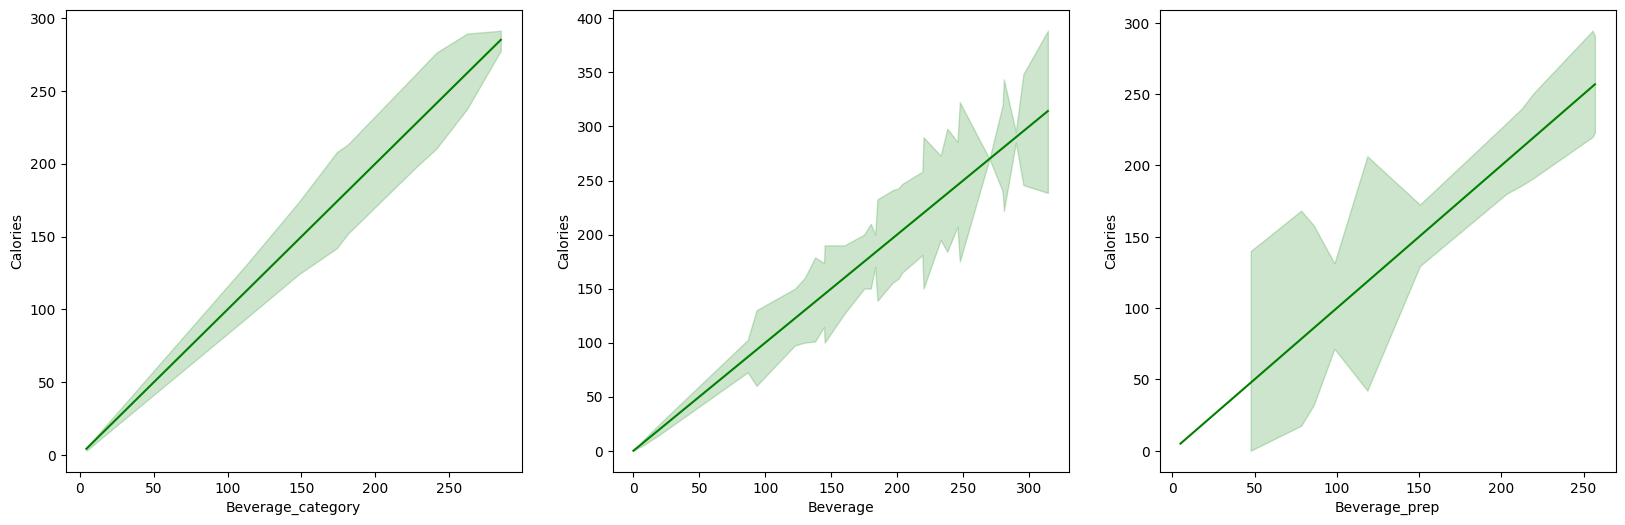

In [ ]:
fig = plt.figure(figsize=(20,6))
for i,cols in enumerate(X_train_menu1_me_encod):
    fig.add_subplot(1, 3, i+1)
    sns.lineplot(x=X_train_menu1_me_encod[cols], y=y_train_menu1, color='green')

### FrequencyEncoder
Nota: No es bueno para modelos lineales, pero tampoco tan malo

In [ ]:
from feature_engine.encoding import CountFrequencyEncoder

In [ ]:
# Instanciamos el FrequencyEncoder
cf = CountFrequencyEncoder(encoding_method='frequency', unseen='encode')
X_train_menu1_cf_encod = cf.fit_transform(X_train_menu1_cat)
X_test_menu1_cf_encod = cf.transform(X_test_menu1_cat)

In [ ]:
X_train_menu1_cf_encod.head()

Beverage_category  Beverage  Beverage_prep
116           0.233161  0.051813       0.207254
24            0.227979  0.056995       0.269430
237           0.051813  0.036269       0.269430
100           0.150259  0.020725       0.031088
171           0.082902  0.010363       0.036269

In [ ]:
X_test_menu1_cf_encod.head()

Beverage_category  Beverage  Beverage_prep
231           0.051813  0.036269       0.269430
86            0.150259  0.051813       0.036269
96            0.150259  0.051813       0.207254
54            0.227979  0.046632       0.207254
144           0.233161  0.046632       0.269430

Para los otros datasets no se necesito encodear, ya que, la unica variable categorica que poseían ambos datasets se eliminó al no ser informativa.

## Escalamos los Datos

In [ ]:
from sklearn.preprocessing import StandardScaler

Dataset: Menu de Bebidas Expandidas

In [ ]:
# Tomamos las variables numericas
X_train_menu1_num = X_train_menu1.select_dtypes(include='number')
X_test_menu1_num = X_test_menu1.select_dtypes(include='number')

In [ ]:
X_train_menu1_num.columns

Index(['Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Caffeine (mg)', ' Total Fat (g)',
       'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ',
       'Iron (% DV) '],
      dtype='object')

In [ ]:
# revisamos la varianza de nuestros datos
X_train_menu1_num.var(ddof=0)

Trans Fat (g)                   2.172507
Saturated Fat (g)               0.004695
 Sodium (mg)                   70.791162
 Total Carbohydrates (g)     6287.053505
Cholesterol (mg)              395.387742
 Dietary Fibre (g)              2.338533
 Sugars (g)                   354.808344
 Protein (g)                   24.766840
Caffeine (mg)                4582.517651
 Total Fat (g)                 11.758520
Vitamin A (% DV)               64.337512
Vitamin C (% DV)              225.818733
 Calcium (% DV)               211.532336
Iron (% DV)                   113.521061
dtype: float64

In [ ]:
X_test_menu1_num.var(ddof=0)

Trans Fat (g)                   4.582441
Saturated Fat (g)               0.006531
 Sodium (mg)                   86.734694
 Total Carbohydrates (g)     8300.832986
Cholesterol (mg)              569.460225
 Dietary Fibre (g)              1.042899
 Sugars (g)                   516.739692
 Protein (g)                   19.101033
Caffeine (mg)                3788.608913
 Total Fat (g)                 13.372353
Vitamin A (% DV)               68.314036
Vitamin C (% DV)              132.511454
 Calcium (% DV)               203.701791
Iron (% DV)                    93.469388
dtype: float64

In [ ]:
# Escalamos datos numericos
scale_menu1 = StandardScaler()
X_train_menu1_scale = scale_menu1.fit_transform(X_train_menu1_num)
X_test_menu1_scale = scale_menu1.transform(X_test_menu1_num)

In [ ]:
# Armamos de vuelta dataset con datos numericos
X_train_menu1_scaled = pd.DataFrame(X_train_menu1_scale, columns=X_train_menu1_num.columns)
X_test_menu1_scaled = pd.DataFrame(X_test_menu1_scale, columns=X_test_menu1_num.columns)

In [ ]:
# revisamos datos escalados
X_train_menu1_scaled.var(ddof=0)

Trans Fat (g)                1.0
Saturated Fat (g)            1.0
 Sodium (mg)                 1.0
 Total Carbohydrates (g)     1.0
Cholesterol (mg)             1.0
 Dietary Fibre (g)           1.0
 Sugars (g)                  1.0
 Protein (g)                 1.0
Caffeine (mg)                1.0
 Total Fat (g)               1.0
Vitamin A (% DV)             1.0
Vitamin C (% DV)             1.0
 Calcium (% DV)              1.0
Iron (% DV)                  1.0
dtype: float64

In [ ]:
X_test_menu1_scaled.var(ddof=0)

Trans Fat (g)                2.109287
Saturated Fat (g)            1.391004
 Sodium (mg)                 1.225219
 Total Carbohydrates (g)     1.320306
Cholesterol (mg)             1.440258
 Dietary Fibre (g)           0.445963
 Sugars (g)                  1.456391
 Protein (g)                 0.771234
Caffeine (mg)                0.826753
 Total Fat (g)               1.137248
Vitamin A (% DV)             1.061807
Vitamin C (% DV)             0.586805
 Calcium (% DV)              0.962982
Iron (% DV)                  0.823366
dtype: float64

Dataset: Menu de Bebidas

In [ ]:
# Tomamos las variables numericas
X_train_menu2_num = X_train_menu2.select_dtypes(include='number')
X_test_menu2_num = X_test_menu2.select_dtypes(include='number')

In [ ]:
# revisamos la varianza de nuestros datos
X_train_menu2_num.var(ddof=0)

Fat (g)        16.424564
Carb. (g)     226.977669
Fiber (g)       1.430662
Protein        28.130981
Sodium       4293.723025
dtype: float64

In [ ]:
X_test_menu2_num.var(ddof=0)

Fat (g)         9.234072
Carb. (g)     233.085873
Fiber (g)       3.922438
Protein        44.110803
Sodium       5437.673130
dtype: float64

In [ ]:
# Escalamos datos numericos
scale_menu2 = StandardScaler()
X_train_menu2_scale = scale_menu2.fit_transform(X_train_menu2_num)
X_test_menu2_scale = scale_menu2.transform(X_test_menu2_num)

In [ ]:
# Armamos de vuelta dataset con datos numericos
X_train_menu2_scaled = pd.DataFrame(X_train_menu2_scale, columns=X_train_menu2_num.columns)
X_test_menu2_scaled = pd.DataFrame(X_test_menu2_scale, columns=X_test_menu2_num.columns)

In [ ]:
# revisamos datos escalados
X_train_menu2_scaled.var(ddof=0)

Fat (g)      1.0
Carb. (g)    1.0
Fiber (g)    1.0
Protein      1.0
Sodium       1.0
dtype: float64

In [ ]:
# revisamos datos escalados
X_test_menu2_scaled.var(ddof=0)

Fat (g)      0.562211
Carb. (g)    1.026911
Fiber (g)    2.741693
Protein      1.568051
Sodium       1.266424
dtype: float64

Dataset: Menu de Comidas

In [ ]:
# Tomamos las variables numericas
X_train_menu3_num = X_train_menu3.select_dtypes(include='number')
X_test_menu3_num = X_test_menu3.select_dtypes(include='number')

In [ ]:
# revisamos la varianza de nuestros datos
X_train_menu3_num.var(ddof=0)

 Fat (g)         69.895062
 Carb. (g)      233.248025
 Fiber (g)        7.819877
 Protein (g)     70.685062
dtype: float64

In [ ]:
X_test_menu3_num.var(ddof=0)

 Fat (g)         54.078450
 Carb. (g)      277.345936
 Fiber (g)       10.000000
 Protein (g)     69.882798
dtype: float64

In [ ]:
# Escalamos datos numericos
scale_menu3 = StandardScaler()
X_train_menu3_scale = scale_menu3.fit_transform(X_train_menu3_num)
X_test_menu3_scale = scale_menu3.transform(X_test_menu3_num)

In [ ]:
# Armamos de vuelta dataset con datos numericos
X_train_menu3_scaled = pd.DataFrame(X_train_menu3_scale, columns=X_train_menu3_num.columns)
X_test_menu3_scaled = pd.DataFrame(X_test_menu3_scale, columns=X_test_menu3_num.columns)

In [ ]:
# revisamos datos escalados
X_train_menu3_scaled.var(ddof=0)

 Fat (g)        1.0
 Carb. (g)      1.0
 Fiber (g)      1.0
 Protein (g)    1.0
dtype: float64

In [ ]:
X_test_menu3_scaled.var(ddof=0)

 Fat (g)        0.773709
 Carb. (g)      1.189060
 Fiber (g)      1.278793
 Protein (g)    0.988650
dtype: float64

### Armamos de vuelta todos los datasets con los datos escalados y encodeados.

Dataset: Menu de Bebidas Expandidas

Nota: para este caso obtendremos 3 dataset que van a corresponder a distintos tipos de codificacion de las variables categoricas, con el unico fin de testear posteriormente con el modelo y comparar con cual codificacion nos fue mejor.

In [ ]:
# reseteamos los indices para evitar indices duplicados (Esto es un fix al error de indices duplicados)
# no cambiar
X_train_menu1_scaled.reset_index(drop=True, inplace=True)
X_train_menu1_ohe_encoded.reset_index(drop=True, inplace=True)
X_train_menu1_me_encod.reset_index(drop=True, inplace=True)
X_train_menu1_cf_encod.reset_index(drop=True, inplace=True)

X_test_menu1_scaled.reset_index(drop=True, inplace=True)
X_test_menu1_ohe_encoded.reset_index(drop=True, inplace=True)
X_test_menu1_me_encod.reset_index(drop=True, inplace=True)
X_test_menu1_cf_encod.reset_index(drop=True, inplace=True)

In [ ]:
# Armamos dataset de Menu de Bebidas Expandidas con codificacion ohe
X_train_menu1_ohe = pd.concat([X_train_menu1_scaled, X_train_menu1_ohe_encoded], axis=1)
X_test_menu1_ohe = pd.concat([X_test_menu1_scaled, X_test_menu1_ohe_encoded], axis=1)

# Pasamos nombres de las columnas a str para evitar problemas con los modelos
X_train_menu1_ohe.columns = X_train_menu1_ohe.columns.astype(str)
X_test_menu1_ohe.columns = X_test_menu1_ohe.columns.astype(str)

# Armamos dataset de Menu de Bebidas Expandidas con codificacion me
X_train_menu1_me = pd.concat([X_train_menu1_scaled, X_train_menu1_me_encod], axis=1)
X_test_menu1_me = pd.concat([X_test_menu1_scaled, X_test_menu1_me_encod], axis=1)

# Pasamos nombres de las columnas a str para evitar problemas con los modelos
X_train_menu1_me.columns = X_train_menu1_me.columns.astype(str)
X_test_menu1_me.columns = X_test_menu1_me.columns.astype(str)

# Armamos dataset de Menu de Bebidas Expandidas con codificacion cf
X_train_menu1_cf = pd.concat([X_train_menu1_scaled, X_train_menu1_cf_encod], axis=1)
X_test_menu1_cf = pd.concat([X_test_menu1_scaled, X_test_menu1_cf_encod], axis=1)

# Pasamos nombres de las columnas a str para evitar problemas con los modelos
X_train_menu1_cf.columns = X_train_menu1_cf.columns.astype(str)
X_test_menu1_cf.columns = X_test_menu1_cf.columns.astype(str)

In [ ]:
X_train_menu1_ohe.head()

Trans Fat (g)   Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0        1.195553           2.389555      2.238503                   0.311700   
1        0.517100          -0.529332     -0.732825                  -0.255830   
2       -0.568424          -0.529332     -0.732825                   1.572879   
3       -0.839805          -0.529332     -0.732825                  -1.327831   
4       -0.839805          -0.529332     -0.732825                  -1.580067   

   Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0          1.009724           -0.552279     1.071129       0.619684   
1          0.054199            1.409497    -0.362269       0.820623   
2          1.562923            0.101646     1.655106      -0.385012   
3          1.713795           -0.552279     1.708195      -1.389708   
4          0.657689           -0.552279     0.858774      -1.369614   

   Caffeine (mg)   Total Fat (g)  ...  Grande Nonfat Milk  Short  \
0       0.534635        0.894063  ...                 0.0    0.0   
1       1.347111        1.185687  ...                 0.0    0.0   
2      -1.238041        8.476294  ...                 0.0    0.0   
3      -1.238041       -0.855683  ...                 0.0    0.0   
4      -1.238041       -0.855683  ...                 0.0    0.0   

   Short Nonfat Milk  Solo  Soymilk  Tall  Tall Nonfat Milk  Venti  \
0                0.0   0.0      0.0   0.0               0.0    0.0   
1                0.0   0.0      1.0   0.0               0.0    0.0   
2                0.0   0.0      1.0   0.0               0.0    0.0   
3                0.0   0.0      0.0   0.0               0.0    0.0   
4                0.0   0.0      0.0   0.0               0.0    1.0   

   Venti Nonfat Milk  Whole Milk  
0                0.0         0.0  
1                0.0         0.0  
2                0.0         0.0  
3                0.0         0.0  
4                0.0         0.0  

[5 rows x 69 columns]

In [ ]:
X_train_menu1_me.head()

Trans Fat (g)   Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0        1.195553           2.389555      2.238503                   0.311700   
1        0.517100          -0.529332     -0.732825                  -0.255830   
2       -0.568424          -0.529332     -0.732825                   1.572879   
3       -0.839805          -0.529332     -0.732825                  -1.327831   
4       -0.839805          -0.529332     -0.732825                  -1.580067   

   Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0          1.009724           -0.552279     1.071129       0.619684   
1          0.054199            1.409497    -0.362269       0.820623   
2          1.562923            0.101646     1.655106      -0.385012   
3          1.713795           -0.552279     1.708195      -1.389708   
4          0.657689           -0.552279     0.858774      -1.369614   

   Caffeine (mg)   Total Fat (g)  Vitamin A (% DV)   Vitamin C (% DV)  \
0       0.534635        0.894063           0.669868         -0.124816   
1       1.347111        1.185687           0.046510         -0.257908   
2      -1.238041        8.476294          -0.452177          0.274458   
3      -1.238041       -0.855683          -1.200207         -0.257908   
4      -1.238041       -0.855683          -1.200207          1.073006   

    Calcium (% DV)   Iron (% DV)   Beverage_category    Beverage  \
0          0.663693     -0.521800         181.333333  204.000000   
1          1.007474      3.044726         148.068182  219.090909   
2         -0.023869      0.229047         227.000000  245.714286   
3         -1.398992     -0.709512         241.379310  247.500000   
4         -1.398992     -0.709512         113.125000  145.000000   

   Beverage_prep  
0     212.500000  
1     203.269231  
2     203.269231  
3      78.333333  
4     118.571429

In [ ]:
X_train_menu1_cf.head()

Trans Fat (g)   Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0        1.195553           2.389555      2.238503                   0.311700   
1        0.517100          -0.529332     -0.732825                  -0.255830   
2       -0.568424          -0.529332     -0.732825                   1.572879   
3       -0.839805          -0.529332     -0.732825                  -1.327831   
4       -0.839805          -0.529332     -0.732825                  -1.580067   

   Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0          1.009724           -0.552279     1.071129       0.619684   
1          0.054199            1.409497    -0.362269       0.820623   
2          1.562923            0.101646     1.655106      -0.385012   
3          1.713795           -0.552279     1.708195      -1.389708   
4          0.657689           -0.552279     0.858774      -1.369614   

   Caffeine (mg)   Total Fat (g)  Vitamin A (% DV)   Vitamin C (% DV)  \
0       0.534635        0.894063           0.669868         -0.124816   
1       1.347111        1.185687           0.046510         -0.257908   
2      -1.238041        8.476294          -0.452177          0.274458   
3      -1.238041       -0.855683          -1.200207         -0.257908   
4      -1.238041       -0.855683          -1.200207          1.073006   

    Calcium (% DV)   Iron (% DV)   Beverage_category  Beverage  Beverage_prep  
0          0.663693     -0.521800           0.233161  0.051813       0.207254  
1          1.007474      3.044726           0.227979  0.056995       0.269430  
2         -0.023869      0.229047           0.051813  0.036269       0.269430  
3         -1.398992     -0.709512           0.150259  0.020725       0.031088  
4         -1.398992     -0.709512           0.082902  0.010363       0.036269

Dataset: Menu de Bebidas

In [ ]:
# Armamos dataset de Menu de Bebidas
X_train_menu2 = X_train_menu2_scaled
X_test_menu2 = X_test_menu2_scaled

# Pasamos nombres de las columnas a str para evitar problemas con los modelos
X_train_menu2.columns = X_train_menu2.columns.astype(str)
X_test_menu2.columns = X_test_menu2.columns.astype(str)

In [ ]:
X_train_menu2.head()

Fat (g)  Carb. (g)  Fiber (g)   Protein    Sodium
0 -0.439414   0.245499   0.549730  0.046490  1.938983
1 -0.562788  -0.484633  -0.286318 -0.707677 -0.655387
2 -0.562788  -1.613018  -0.286318 -0.519136 -0.655387
3 -0.562788   0.444626  -0.286318 -0.707677 -0.655387
4 -0.562788   0.710128  -0.286318 -0.707677 -0.655387

Dataset: Menu de Comidas

In [ ]:
# Armamos dataset de Menu de Bebidas
X_train_menu3 = X_train_menu3_scaled
X_test_menu3 = X_test_menu3_scaled

# Pasamos nombres de las columnas a str para evitar problemas con los modelos
X_train_menu3.columns = X_train_menu3.columns.astype(str)
X_test_menu3.columns = X_test_menu3.columns.astype(str)

In [ ]:
X_train_menu3.head()

Fat (g)   Carb. (g)   Fiber (g)   Protein (g)
0  1.229351    0.239356    1.497955     -0.133480
1  0.750901   -0.153508   -1.005259     -1.085018
2  1.229351    0.828652    0.782751      1.055943
3 -0.923675    0.173879   -0.290055      0.937001
4 -1.521737   -1.724964   -1.005259     -1.203960

Conclusion datasets a usar para los modelos:

Para menu de bebidas expandidas
1. Datos de entrenamiento:
* X_train_menu1_ohe (Codificacion con OneHotEncoder),  y_train_menu1
* X_train_menu1_me (Codificacion con MeanEncoder), y_train_menu1
* X_train_menu1_cf (Codificacion con FrequencyEncoder), y_train_menu1
2. Datos de Test
* X_test_menu1_ohe (Codificacion con OneHotEncoder), y_test_menu1
* X_test_menu1_me (Codificacion con MeanEncoder), y_test_menu1
* X_test_menu1_cf (Codificacion con FrequencyEncoder), y_test_menu1

Para menu de bebidas
1. Datos de entrenamiento:
* X_train_menu2, y_train_menu2
2. Datos de Test
* X_test_menu2, y_test_menu2

Para menu de comidas
1. Datos de entrenamiento:
* X_train_menu3, y_train_menu3
2. Datos de Test
* X_test_menu3, y_test_menu3



In [ ]:
# NO CORRER A MENOS QUE SE PIENSE MIGRAR A OTRO COLAB
# SI SIGUE LA PARTE DE MODELOS CON ANALISIS DE DATOS OMITIR ESTO
# Exportamos datasets train
X_train_menu1_ohe.to_csv('X_train_menu1_ohe.csv', index=False)
y_train_menu1.to_csv('y_train_menu1.csv', index=False)

X_train_menu2.to_csv('X_train_menu2.csv', index=False)
y_train_menu2.to_csv('y_train_menu2.csv', index=False)

X_train_menu3.to_csv('X_train_menu3.csv', index=False)
y_train_menu3.to_csv('y_train_menu3.csv', index=False)

# Exportamos datasets test
X_test_menu1_ohe.to_csv('X_test_menu1_ohe.csv', index=False)
y_test_menu1.to_csv('y_test_menu1.csv', index=False)

X_test_menu2.to_csv('X_test_menu2.csv', index=False)
y_test_menu2.to_csv('y_test_menu2.csv', index=False)

X_test_menu3.to_csv('X_test_menu3.csv', index=False)
y_test_menu3.to_csv('y_test_menu3.csv', index=False)

In [ ]:
# NO CORRER A MENOS QUE SE PIENSE MIGRAR A OTRO COLAB
# SI SIGUE LA PARTE DE MODELOS CON ANALISIS DE DATOS OMITIR ESTO
from google.colab import files
# train set export
files.download('X_train_menu1_ohe.csv')
files.download('y_train_menu1.csv')

files.download('X_train_menu2.csv')
files.download('y_train_menu2.csv')

files.download('X_train_menu3.csv')
files.download('y_train_menu3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# test set export
files.download('X_test_menu1_ohe.csv')
files.download('y_test_menu1.csv')

files.download('X_test_menu2.csv')
files.download('y_test_menu2.csv')

files.download('X_test_menu3.csv')
files.download('y_test_menu3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modelos

En esta seccion vamos a estar entrenando los modelos de 3 formas distintas.
1. Como si fuera una regresión lineal.
2. Con AutoML
3. Como si fuera un problema de clasificación

### Regresión lineal

In [ ]:
# Importamos librerias
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.base import clone

#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Instanceamos modelos a usar
models = [
    ("RandomForest",RandomForestRegressor(n_estimators=100, random_state=0)), #usando 100 arboles
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=0)),
    ("LinearRegression", LinearRegression()),
    ("K-NN", KNeighborsRegressor()),
    ("SVM Lineal", SVR(kernel="linear", gamma='auto'))
]

In [ ]:
# Iteramos sobre los modelos y guardamos los resultados
def models_train(models, X_train, y_train, X_test, y_test):
    models_table = []
    for mod in models:
        # Entrenamos modelos
        model = clone(mod[1])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # metricas
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)
        models_table.append({
            "model":mod[0],
            "mse":mse,
            "mae":mae,
            "r2":r2,
            "Train":score_train,
            "Test":score_test
                            })
    return models_table

In [ ]:
# Entrenamiento para modelo con ohe
models_table_ohe = models_train(models, X_train_menu1_ohe, y_train_menu1, X_test_menu1_ohe, y_test_menu1)

In [ ]:
new_df_ohe = pd.DataFrame(models_table_ohe)
new_df_ohe.head()

model          mse        mae        r2     Train      Test
0           RandomForest   466.677614  15.401837  0.954962  0.994963  0.954962
1  DecisionTreeRegressor   542.857143  16.734694  0.947610  1.000000  0.947610
2       LinearRegression    70.057499   6.215083  0.993239  0.997689  0.993239
3                   K-NN  1201.224490  26.000000  0.884073  0.916788  0.884073
4             SVM Lineal    49.280353   5.552229  0.995244  0.991032  0.995244

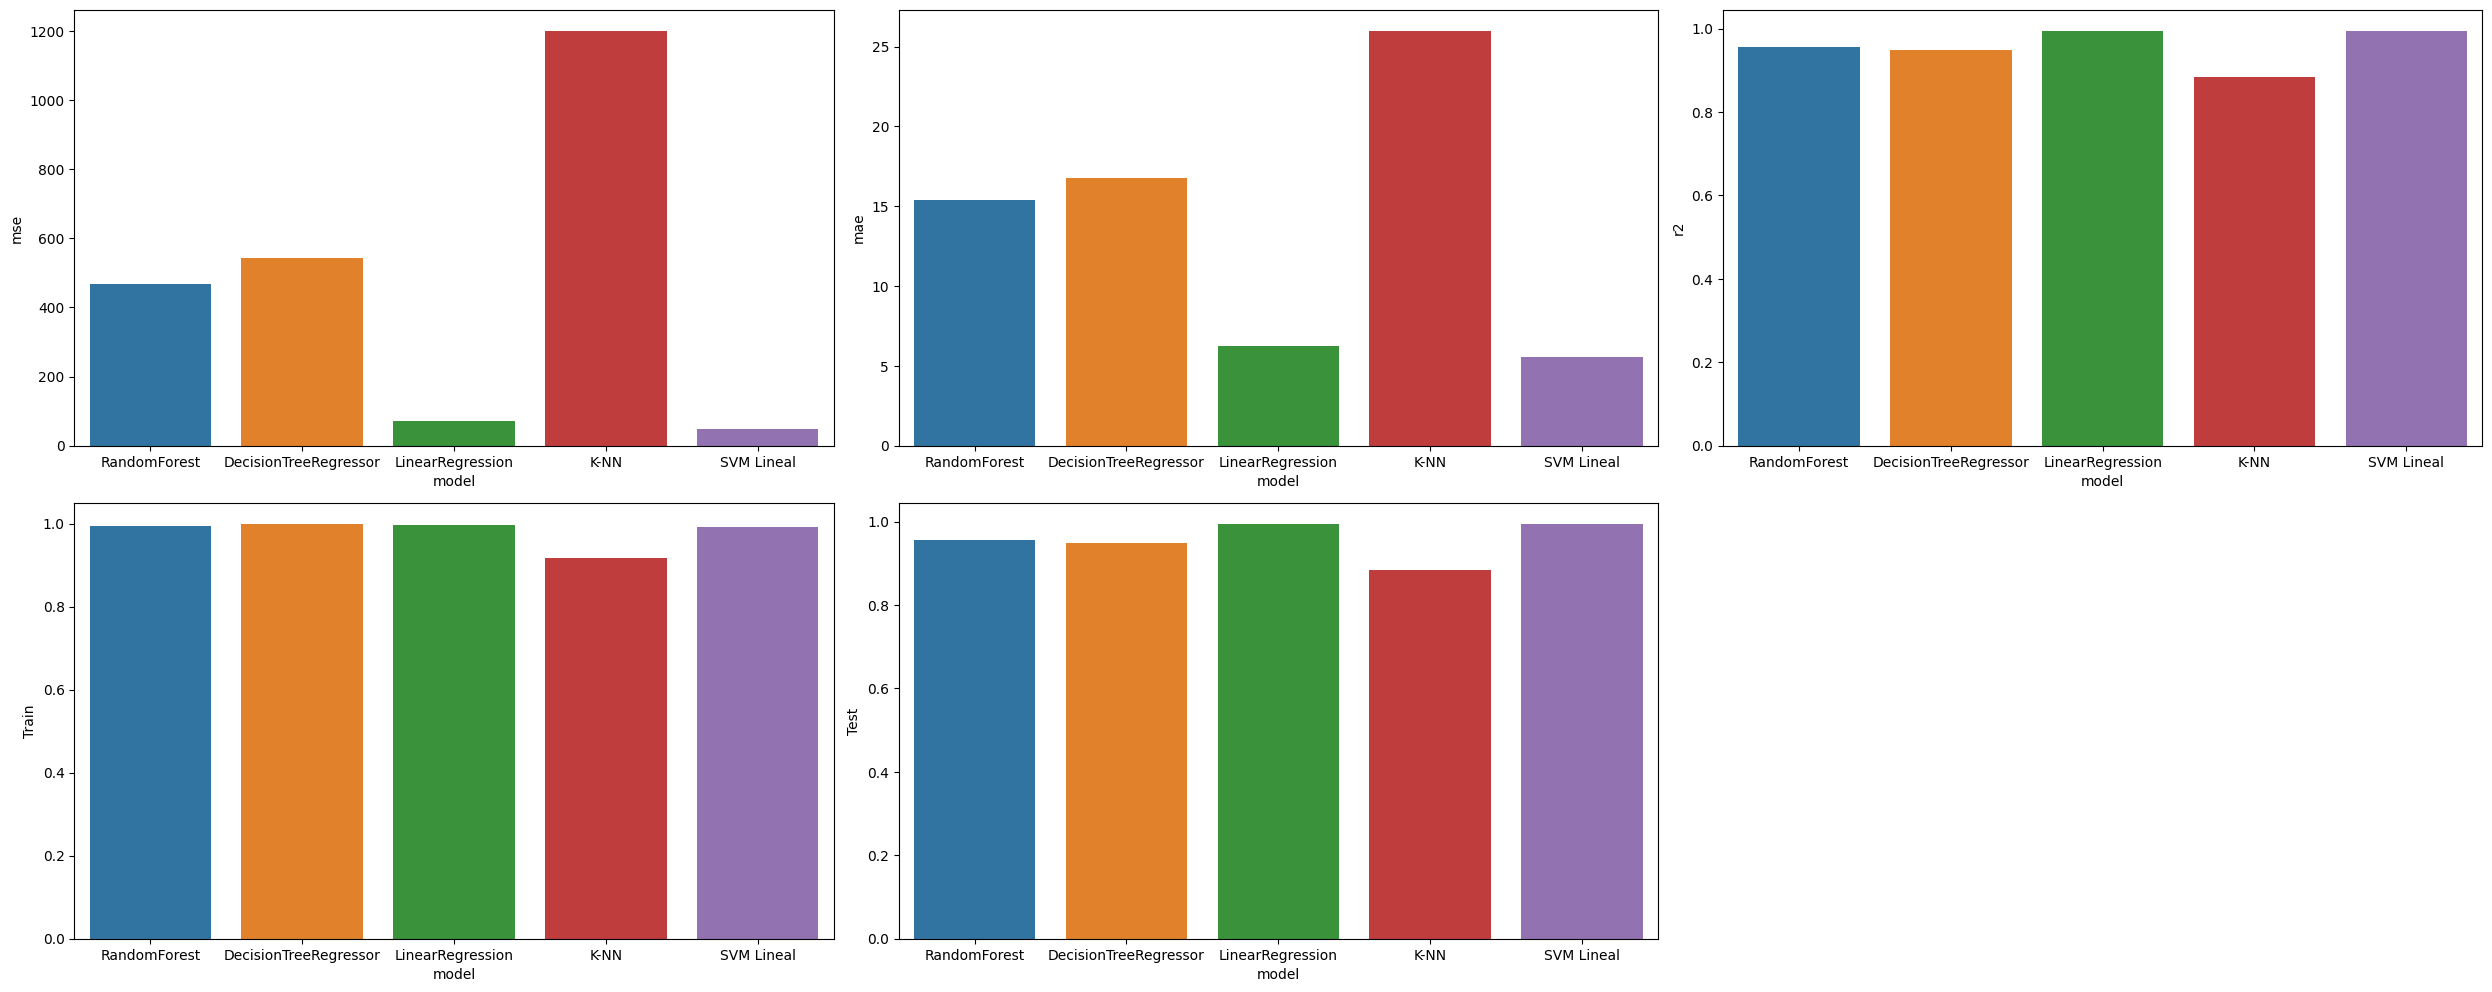

In [ ]:
# plot de precision por modelo
y_columns = new_df_ohe.drop(columns='model')

fig = plt.figure(figsize=(25,10))
for i in range(len(y_columns.columns)):
    fig.add_subplot(2,3,i+1)
    sns.barplot(data=new_df_ohe, x='model', y=y_columns.columns[i])
    fig.tight_layout(pad=1)

In [ ]:
# Entrenamiento para modelo con me
models_table_me = models_train(models, X_train_menu1_me, y_train_menu1, X_test_menu1_me, y_test_menu1)

In [ ]:
new_df_me = pd.DataFrame(models_table_me)
new_df_me.head()

model          mse        mae        r2     Train      Test
0           RandomForest   455.274247  15.210408  0.956063  0.995388  0.956063
1  DecisionTreeRegressor   618.367347  15.714286  0.940323  1.000000  0.940323
2       LinearRegression   115.108151   8.410600  0.988891  0.994712  0.988891
3                   K-NN  4258.204082  48.938776  0.589053  0.757790  0.589053
4             SVM Lineal    81.991155   7.431036  0.992087  0.986180  0.992087

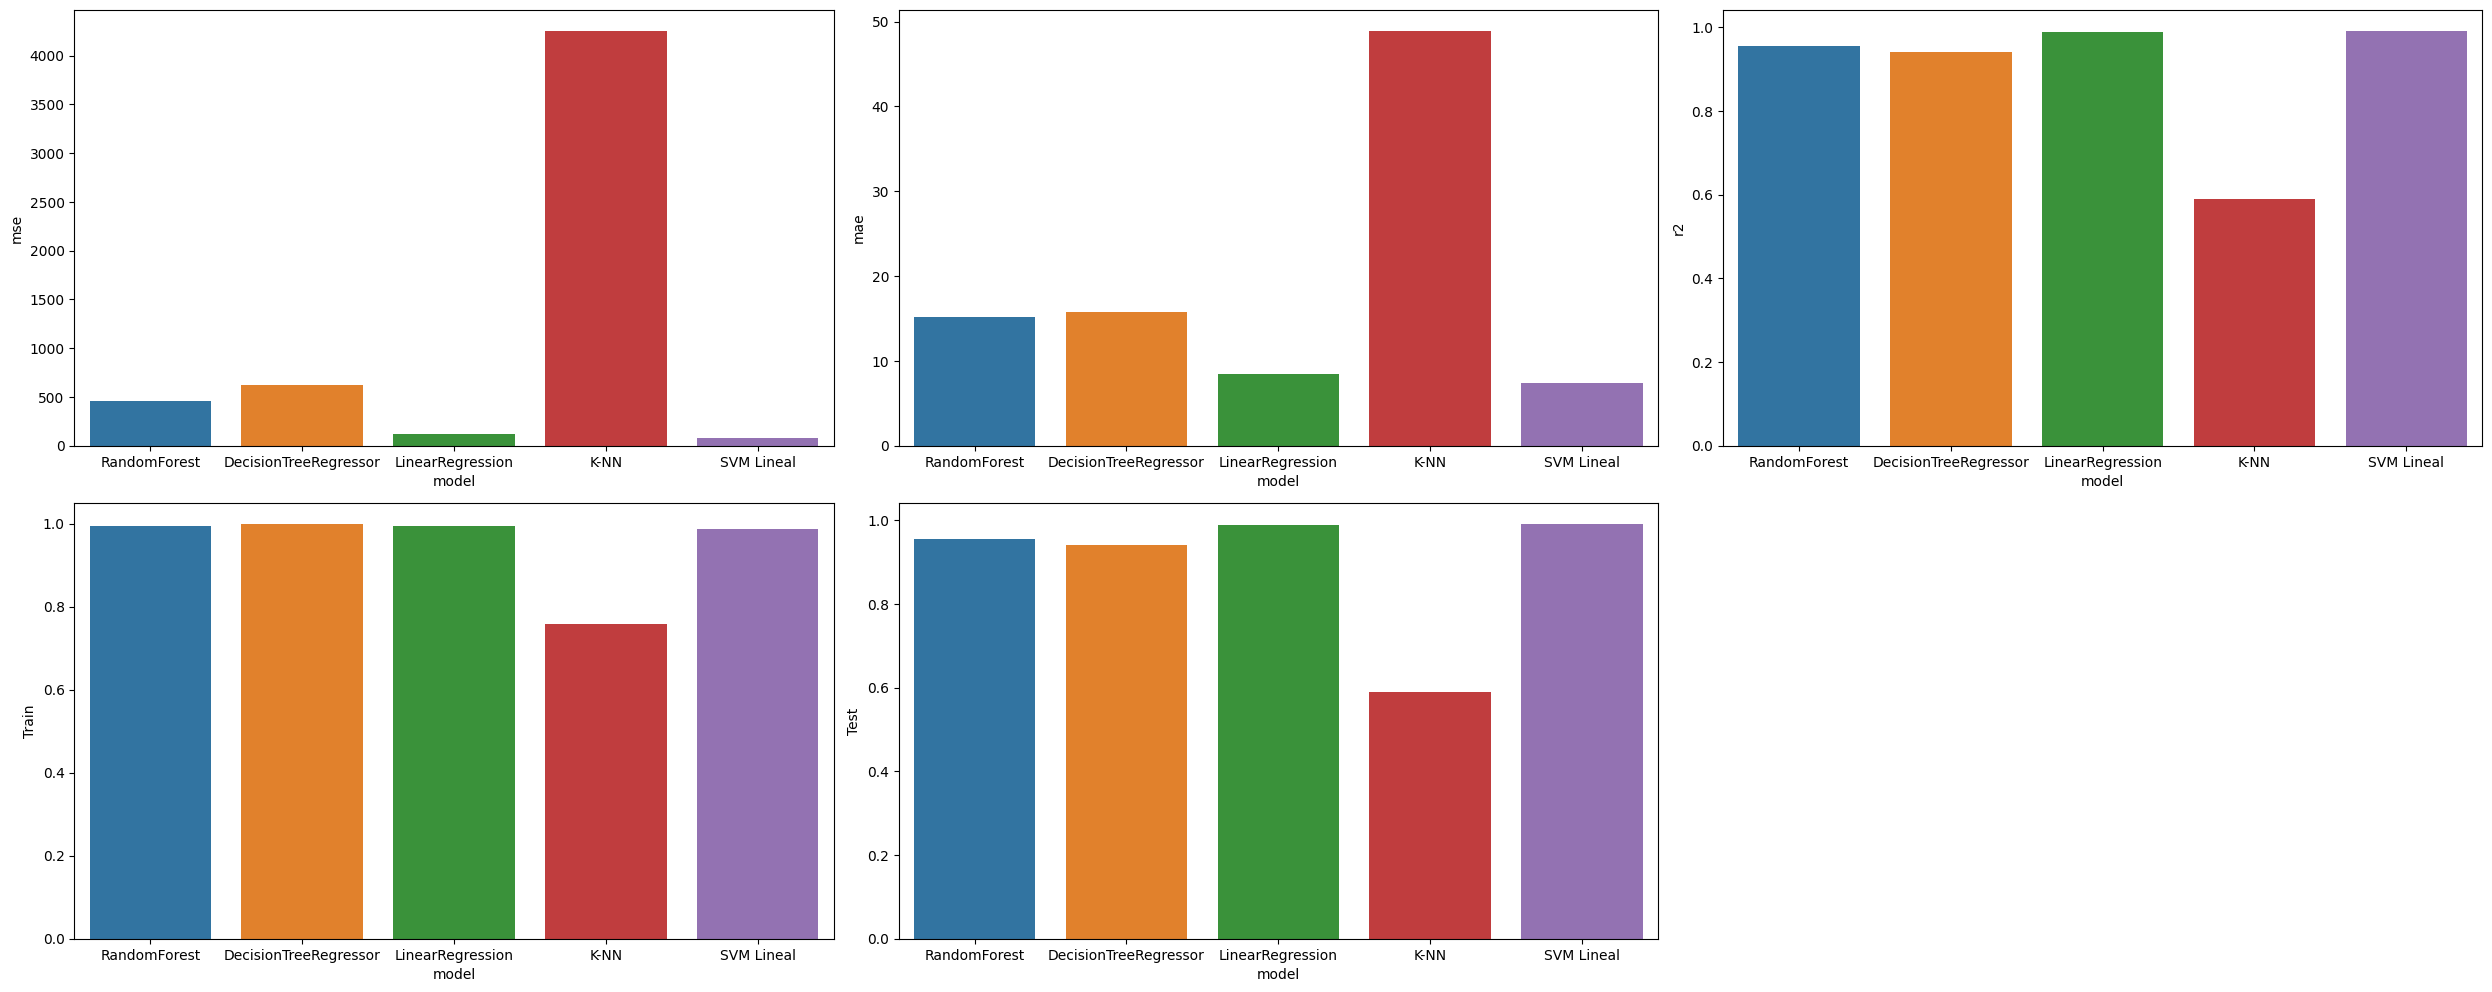

In [ ]:
# plot de precision por modelo
y_columns = new_df_me.drop(columns='model')

fig = plt.figure(figsize=(25,10))
for i in range(len(y_columns.columns)):
    fig.add_subplot(2,3,i+1)
    sns.barplot(data=new_df_me, x='model', y=y_columns.columns[i])
    fig.tight_layout(pad=1)

In [ ]:
# Entrenamiento para modelo con cf
models_table_cf = models_train(models, X_train_menu1_cf, y_train_menu1, X_test_menu1_cf, y_test_menu1)

In [ ]:
new_df_cf = pd.DataFrame(models_table_cf)
new_df_cf.head()

model         mse        mae        r2     Train      Test
0           RandomForest  417.831851  14.752041  0.959676  0.995112  0.959676
1  DecisionTreeRegressor  608.163265  15.918367  0.941308  1.000000  0.941308
2       LinearRegression   90.621575   7.754459  0.991254  0.995574  0.991254
3                   K-NN  934.612245  21.020408  0.909803  0.932780  0.909803
4             SVM Lineal   53.222977   5.611920  0.994864  0.984230  0.994864

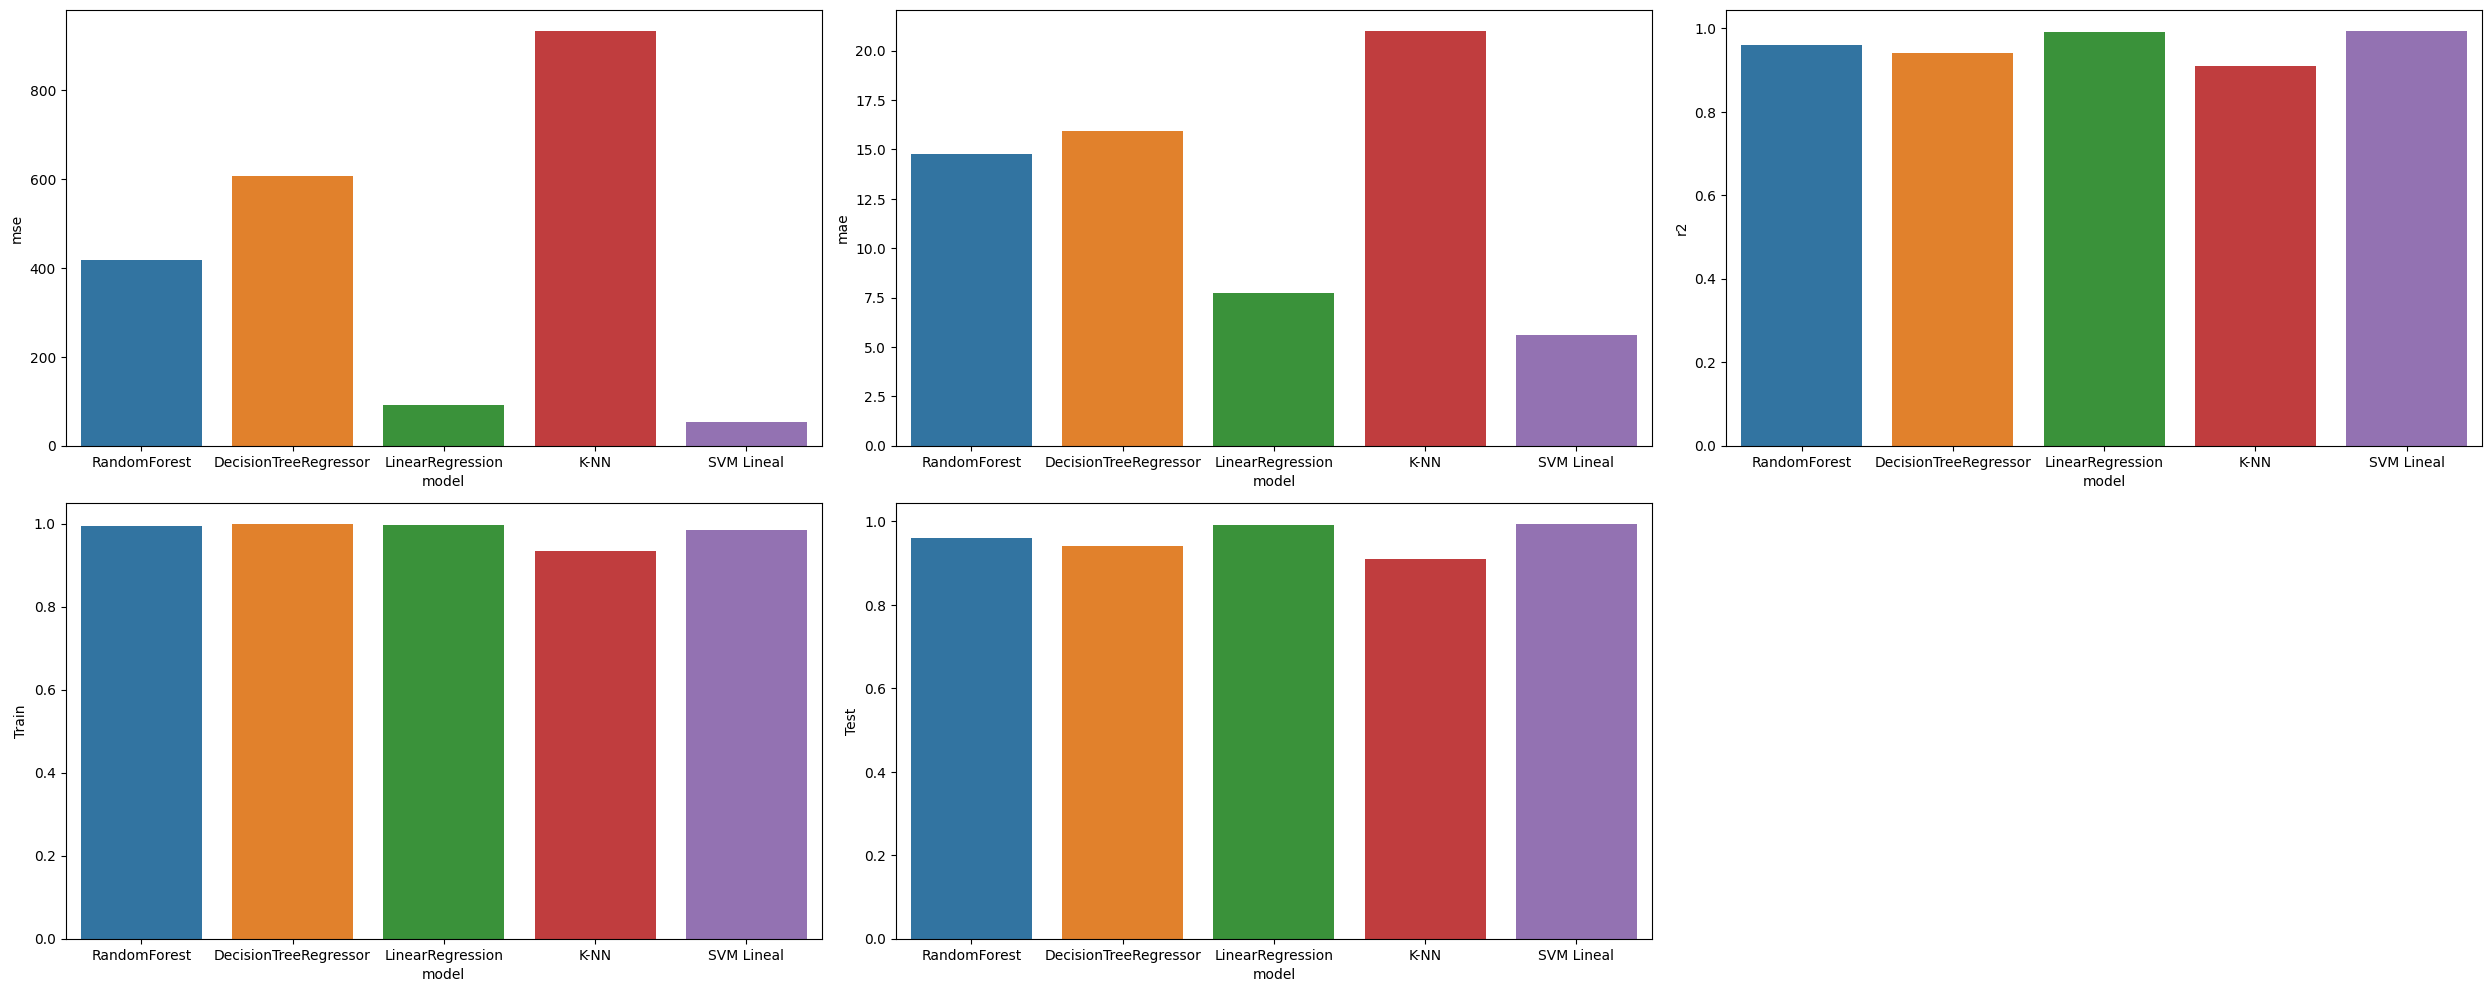

In [ ]:
# plot de precision por modelo
y_columns = new_df_cf.drop(columns='model')

fig = plt.figure(figsize=(25,10))
for i in range(len(y_columns.columns)):
    fig.add_subplot(2,3,i+1)
    sns.barplot(data=new_df_cf, x='model', y=y_columns.columns[i])
    fig.tight_layout(pad=1)

In [ ]:
# Entrenamiento para modelo con menu2
models_table_menu2 = models_train(models, X_train_menu2, y_train_menu2, X_test_menu2, y_test_menu2)

In [ ]:
new_df_menu2 = pd.DataFrame(models_table_menu2)
new_df_menu2.head()

model          mse        mae        r2     Train      Test
0           RandomForest   734.642237  14.592105  0.919748  0.989880  0.919748
1  DecisionTreeRegressor  1256.578947  19.210526  0.862731  1.000000  0.862731
2       LinearRegression    76.910678   5.660515  0.991598  0.996928  0.991598
3                   K-NN  1429.157895  21.789474  0.843879  0.938782  0.843879
4             SVM Lineal   559.718465  16.013872  0.938856  0.975421  0.938856

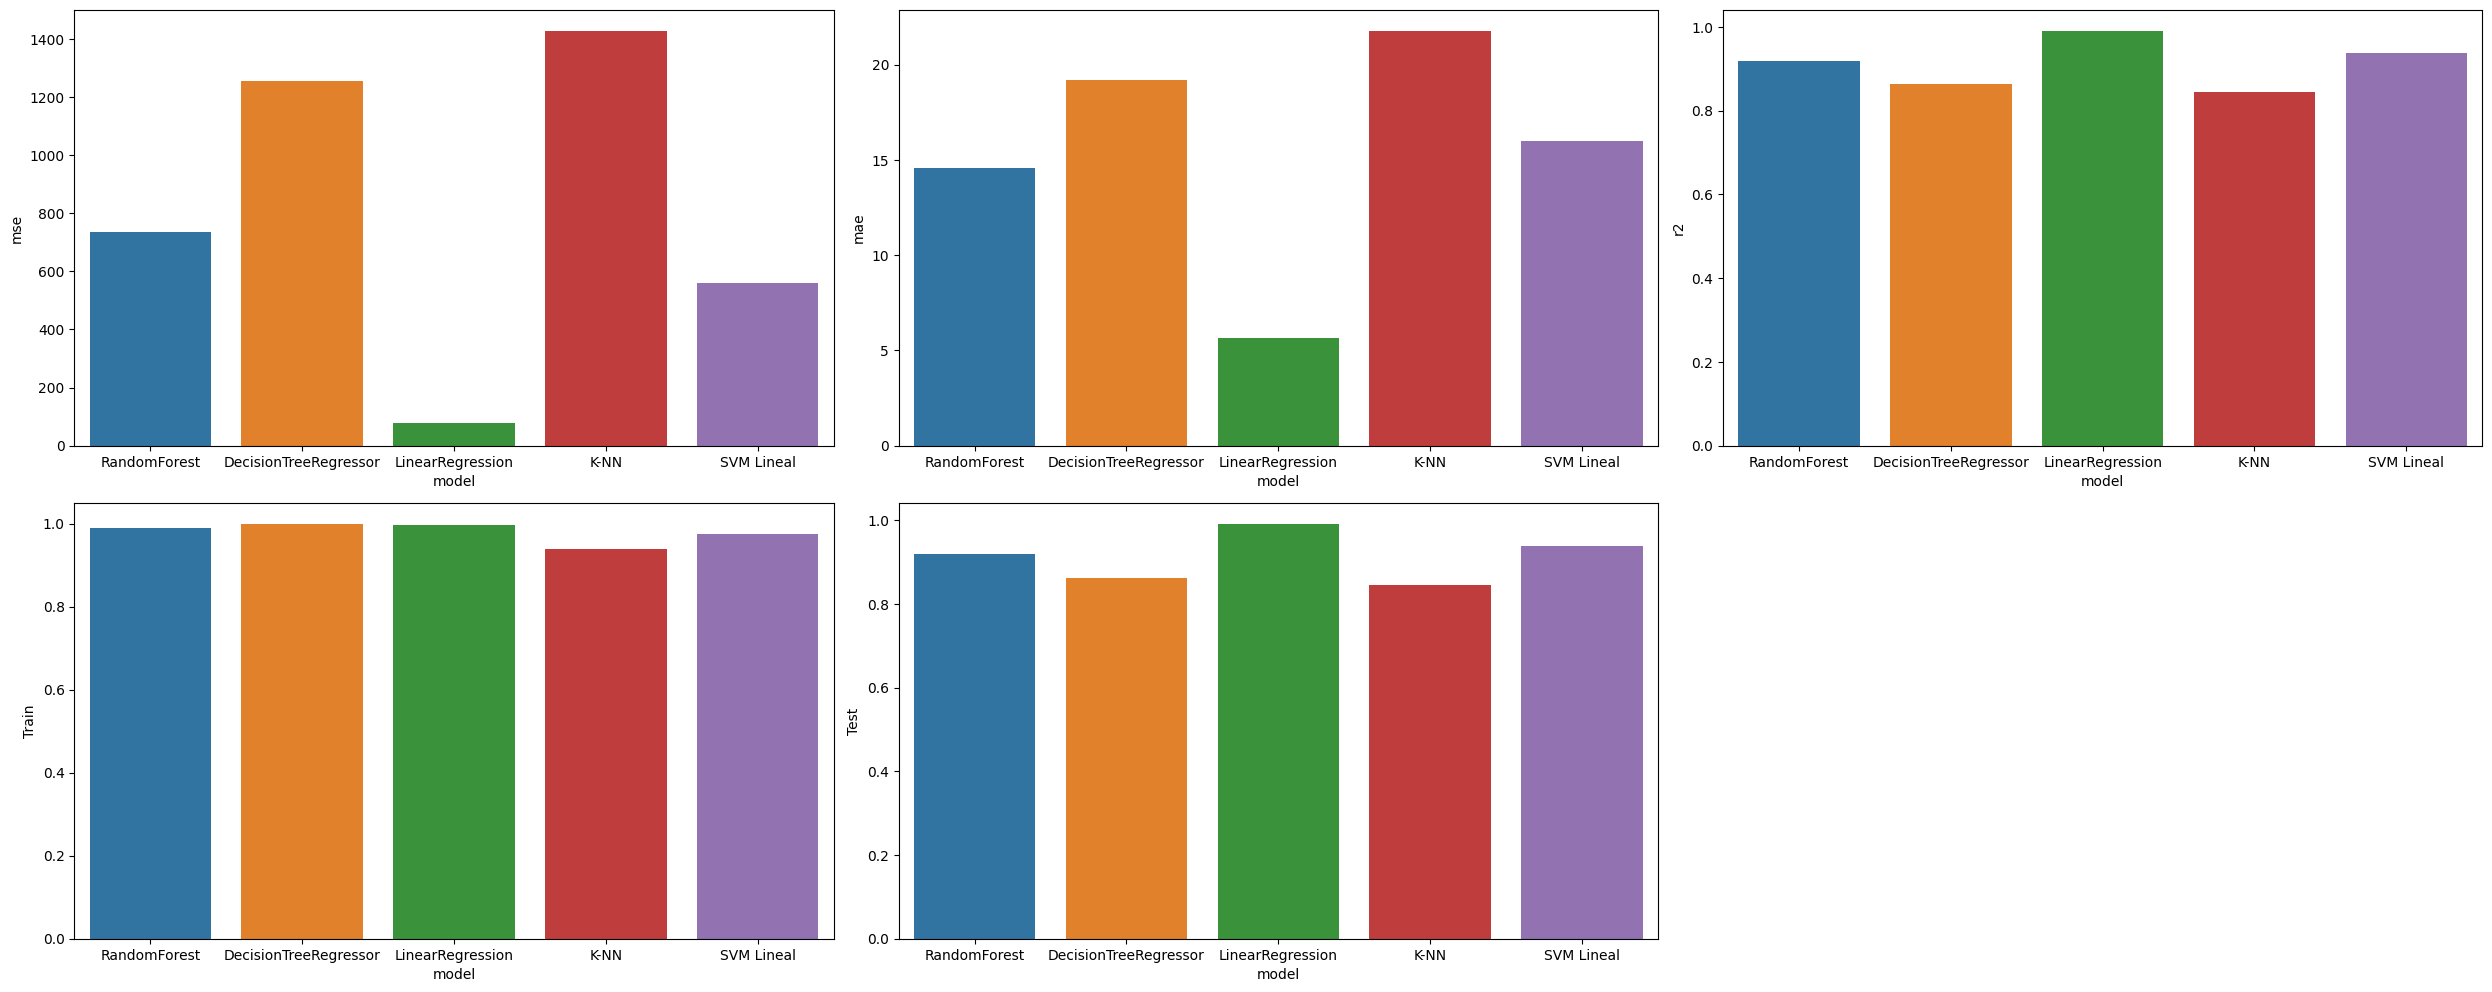

In [ ]:
# plot de precision por modelo
y_columns = new_df_menu2.drop(columns='model')

fig = plt.figure(figsize=(25,10))
for i in range(len(y_columns.columns)):
    fig.add_subplot(2,3,i+1)
    sns.barplot(data=new_df_menu2, x='model', y=y_columns.columns[i])
    fig.tight_layout(pad=1)

In [ ]:
# Entrenamiento para modelo con menu3
models_table_menu3 = models_train(models, X_train_menu3, y_train_menu3, X_test_menu3, y_test_menu3)

In [ ]:
new_df_menu3 = pd.DataFrame(models_table_menu3)
new_df_menu3.head()

model          mse        mae        r2     Train      Test
0           RandomForest   747.685217  22.521739  0.942367  0.986589  0.942367
1  DecisionTreeRegressor  2113.043478  33.913043  0.837122  1.000000  0.837122
2       LinearRegression    90.400891   6.227961  0.993032  0.994954  0.993032
3                   K-NN   576.347826  18.260870  0.955574  0.962090  0.955574
4             SVM Lineal   774.830727  22.365397  0.940274  0.959385  0.940274

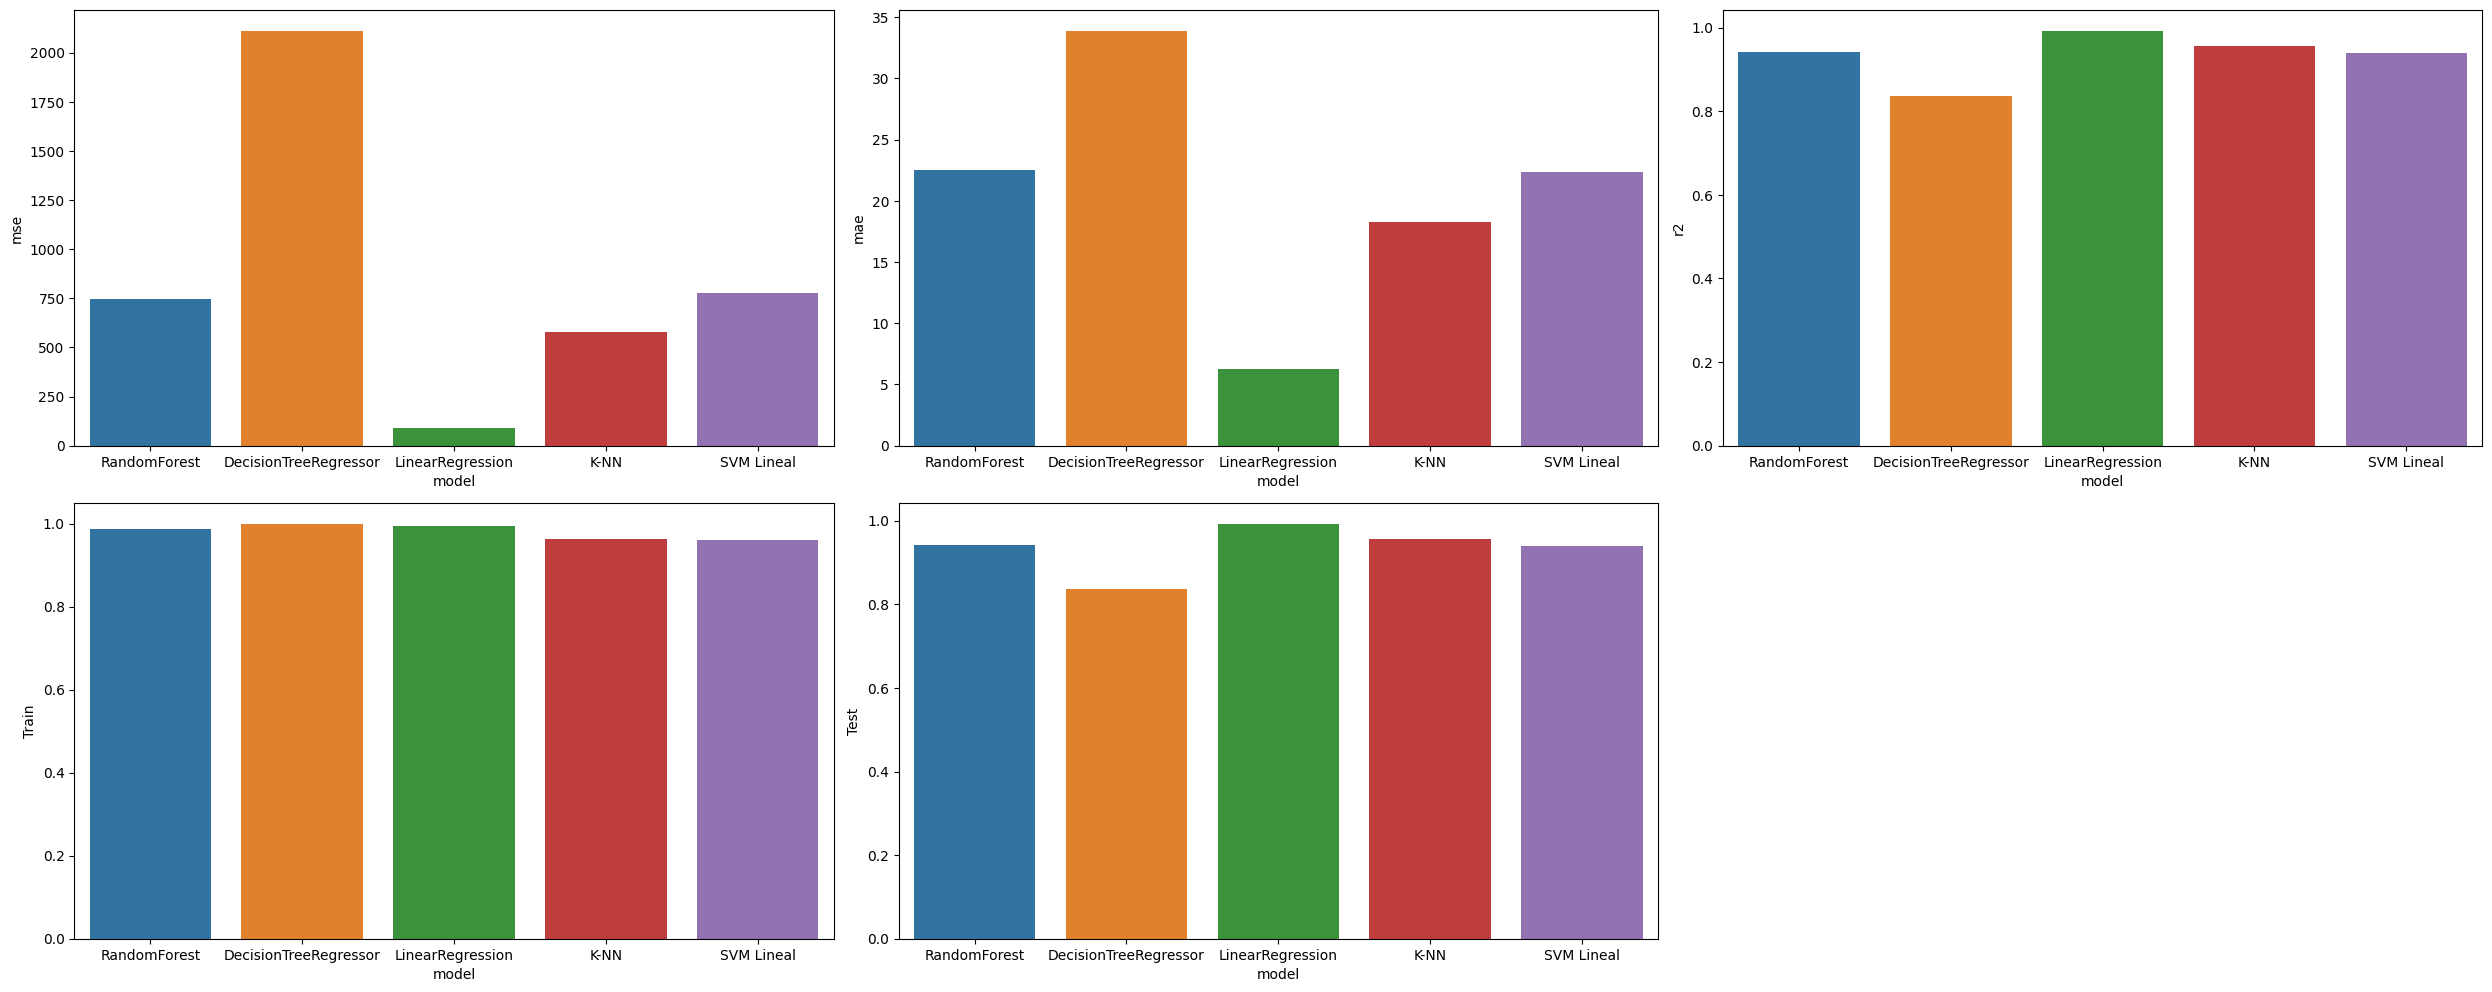

In [ ]:
# plot de precision por modelo
y_columns = new_df_menu3.drop(columns='model')

fig = plt.figure(figsize=(25,10))
for i in range(len(y_columns.columns)):
    fig.add_subplot(2,3,i+1)
    sns.barplot(data=new_df_menu3, x='model', y=y_columns.columns[i])
    fig.tight_layout(pad=1)

## Analisis de los modelos lineales

En general para los 3 tipos de codificaciones que se usaron para el menu de bebidas expandidas, se obtuvieron buenos resultados.

La metrica R2 nos indica que los modelos con los que se hizo la regresion pudieron ajustarse bastante bien a los datos. Sin embargo, este valor tuvo pequeñas diferencias entre modelos.

Como era de esperarse DecisionTree tuvo Overfitting en la mayoría de los casos y en general el mejor modelo fue Linear Regression para el menu de bebidas y comidas. Por otro lado, para el menu expandido el mejor modelo fue SVM, ya que, tuvo mejores resultados en las distintas metricas.

### Clasificación

In [ ]:
# Cargar los archivos CSV en DataFrames
df_drink_menu = pd.read_csv(os.path.join(extracted_directory, extracted_files[0]))
df_food_menu = pd.read_csv(os.path.join(extracted_directory, extracted_files[1]), encoding='utf-16')
df_drink_Expanded_menu = pd.read_csv(os.path.join(extracted_directory, extracted_files[2]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-097af4b83987>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=calories,edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))


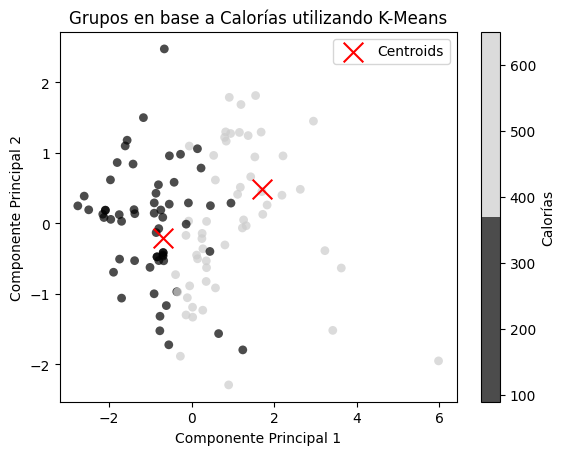

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar One-Hot Encoding a los nombres de las comidas
encoder = OneHotEncoder(sparse=False)
food_names_encoded = encoder.fit_transform(df_food_menu[['Unnamed: 0']])

# Estandarizar los datos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_food_menu[[' Fat (g)', ' Carb. (g)', ' Fiber (g)', ' Protein (g)']])

# Combinar los datos codificados y estandarizados
X = pd.concat([pd.DataFrame(food_names_encoded), pd.DataFrame(X_scaled)], axis=1)

# Realizar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar algoritmo de clustering (K-Means)
kmeans = KMeans(n_clusters=2,  random_state=37)
kmeans.fit(X_pca)

# Obtener las etiquetas de los clusters
cluster_labels = kmeans.labels_

# Obtener las calorías
calories = df_food_menu[' Calories']
food_names = df_food_menu['Unnamed: 0']
df_clusters = pd.DataFrame({'Food': food_names, 'Cluster Label': cluster_labels})
df_food_menu['Cluster Labels'] = cluster_labels

# Graficar los puntos con colores basados en las calorías y los clusters de K-Means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=calories,edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar(label='Calorías')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=200, label='Centroids')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Grupos en base a Calorías utilizando K-Means')
plt.legend()
plt.show()




In [ ]:
# Crear una tabla para el Cluster 0
df_cluster_0 = df_clusters[df_clusters['Cluster Label'] == 0]

# Crear una tabla para el Cluster 1
df_cluster_1 = df_clusters[df_clusters['Cluster Label'] == 1]

In [ ]:
df_cluster_0.head(10)

Food  Cluster Label
0                            Chonga Bagel              0
1                            8-Grain Roll              0
2                        Almond Croissant              0
3                           Apple Fritter              0
4                        Banana Nut Bread              0
5  Blueberry Muffin with Yogurt and Honey              0
6                         Blueberry Scone              0
7                        Butter Croissant              0
8                        Butterfly Cookie              0
9                           Cheese Danish              0

In [ ]:
df_cluster_1.head(10)

Food  Cluster Label
23               Double Chocolate Chunk Brownie              1
33                             Multigrain Bagel              1
54                  Strawberries & Jam Sandwich              1
58                              Cubano Sandwich              1
59                  Farmers' Market Protein Box              1
61                  Green Goddess Avocado Salad              1
64             Roasted Carrot & Kale Side Salad              1
65       Roasted Turkey & Dill Havarti Sandwich              1
66              Seared Steak & Cheddar Sandwich              1
68  Smoked Mozzarella & Roasted Pepper Sandwich              1

En esta clasificacion sucede algo interesante, se distinguen '0' son más alimentos de panaderia que contienen azucar mientras que las '1' son mas alimentos de sandwich y salados

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = df_food_menu.drop(['Unnamed: 0', ' Calories', 'Cluster Labels'], axis=1)
y = df_food_menu[' Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("MAE: ", mae)
print("R^2: ", r2)


MSE:  567.3560869565217
MAE:  18.36086956521739
R^2:  0.9655852115583076


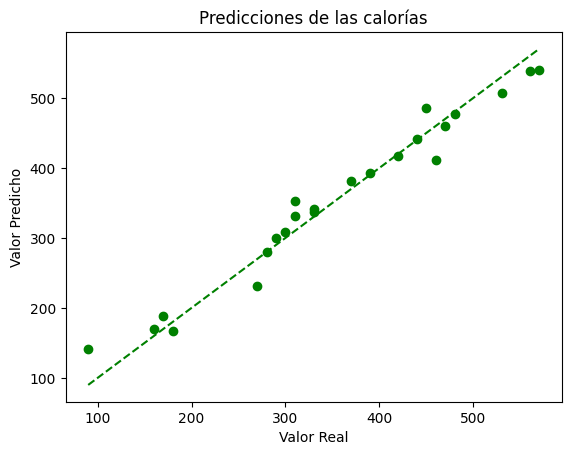

In [ ]:

# Graficar las predicciones de las calorías
plt.scatter(y_test, y_pred,c="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--')
plt.title('Predicciones de las calorías')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.show()